# Earthquake Damage Prediction

## Business Case
- To create a predictive model to predict the level of damage grade affected by the earthquake.


## Domain Analysis
* Features
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.
    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.
* Description
    - geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    - age (type: int): age of the building in years.
    - area_percentage (type: int): normalized area of the building footprint.
    - height_percentage (type: int): normalized height of the building footprint.
    - land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
        - n: Indicates "normal" surface condition.
        - o: Indicates "other" surface condition.
        - t: Indicates "technical" surface condition.
    - foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
        - h: Indicates the use of "hard foundation."
        - i: Indicates the use of "other foundation."
        - r: Indicates the use of "reinforced foundation."
        - u: Indicates the use of "bamboo foundation."
        - w: Indicates the use of "wooden foundation."

    - roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
        - n: Indicates the use of a "normal" roof type.
        - q: Indicates the use of a "hip" roof type.
        - x: Indicates the use of an "unknown" roof type.
    - ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
        - f: Indicates a ground floor made of "fine aggregate concrete."
        - m: Indicates a ground floor made of "mud."
        - v: Indicates a ground floor made of "not applicable" material.
        - x: Indicates a ground floor made of "timber."
        - z: Indicates a ground floor made of "zinc."
    - other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - position (type: categorical): position of the building. Possible values: j, o, s, t.
        - j: Indicates the building is in a "j" (juvenile) position.
        - o: Indicates the building is in an "o" (other) position.
        - s: Indicates the building is in an "s" (secondary) position.
        - t: Indicates the building is in a "t" (tertiary) position.
    - plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    - has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    - has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    - has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    - has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
    - legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
        - a: Indicates "other" legal ownership status.
        - r: Indicates "rented" legal ownership status.
        - v: Indicates "private" legal ownership status.
        - w: Indicates "public" legal ownership status. 
        
    - count_families (type: int): number of families that live in the building.
    - has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    - has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    - has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    - has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    - has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    - has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    - has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    - has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    - has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    - has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    - has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from category_encoders import CountEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,TimeSeriesSplit
from sklearn.utils import class_weight


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from kerastuner.tuners import RandomSearch


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)



## Basic Checks

In [2]:
data1=pd.read_csv("train_labels.csv")
data1

building_id  damage_grade
0         802906           3     
1          28830           2     
2          94947           3     
3         590882           2     
4         201944           3     
...             ...           ...
260596    688636           2     
260597    669485           3     
260598    602512           3     
260599    151409           2     
260600    747594           3     

[260601 rows x 2 columns]

In [3]:
data2=pd.read_csv("train_values.csv")
data2

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0         802906            6              487            12198       
1          28830            8              900             2812       
2          94947           21              363             8973       
3         590882           22              418            10694       
4         201944           11              131             1488       
...             ...             ...             ...             ...   
260596    688636           25             1335             1621       
260597    669485           17              715             2060       
260598    602512           17               51             8163       
260599    151409           26               39             1851       
260600    747594           21                9             9101       

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                2           30          6                 5           
1                2           10          8                 7           
2                2           10          5                 5           
3                2           10          6                 5           
4                3           30          8                 9           
...                     ...  ...              ...                ...   
260596           1           55          6                 3           
260597           2            0          6                 5           
260598           3           55          6                 7           
260599           2           10         14                 6           
260600           3           10          7                 6           

       land_surface_condition foundation_type roof_type ground_floor_type  \
0                 t                   r            n             f          
1                 o                   r            n             x          
2                 t                   r            n             f          
3                 t                   r            n             f          
4                 t                   r            n             f          
...                       ...             ...       ...               ...   
260596            n                   r            n             f          
260597            t                   r            n             f          
260598            t                   r            q             f          
260599            t                   r            x             v          
260600            n                   r            n             f          

       other_floor_type position plan_configuration  \
0              q            t             d           
1              q            s             d           
2              x            t             d           
3              x            s             d           
4              x            s             d           
...                 ...      ...                ...   
260596         j            s             q           
260597         q            s             d           
260598         q            s             d           
260599         s            j             d           
260600         q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ...   
260596                0                                1                    
260597                0                                1                    
260598     

In [4]:
data = pd.merge(data1,data2,on='building_id',how='inner')
data

building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0         802906           3              6              487        
1          28830           2              8              900        
2          94947           3             21              363        
3         590882           2             22              418        
4         201944           3             11              131        
...             ...           ...             ...             ...   
260596    688636           2             25             1335        
260597    669485           3             17              715        
260598    602512           3             17               51        
260599    151409           2             26               39        
260600    747594           3             21                9        

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0            12198               2           30          6          
1             2812               2           10          8          
2             8973               2           10          5          
3            10694               2           10          6          
4             1488               3           30          8          
...                ...                  ...  ...              ...   
260596        1621               1           55          6          
260597        2060               2            0          6          
260598        8163               3           55          6          
260599        1851               2           10         14          
260600        9101               3           10          7          

        height_percentage land_surface_condition foundation_type roof_type  \
0               5                    t                   r            n      
1               7                    o                   r            n      
2               5                    t                   r            n      
3               5                    t                   r            n      
4               9                    t                   r            n      
...                   ...                    ...             ...       ...   
260596          3                    n                   r            n      
260597          5                    t                   r            n      
260598          7                    t                   r            q      
260599          6                    t                   r            x      
260600          6                    n                   r            n      

       ground_floor_type other_floor_type position plan_configuration  \
0               f                q            t             d           
1               x                q            s             d           
2               f                x            t             d           
3               f                x            s             d           
4               f                x            s             d           
...                  ...              ...      ...                ...   
260596          f                j            s             q           
260597          f                q            s             d           
260598          f                q            s             d           
260599          v                s            j             d           
260600          f                q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ... 

In [5]:
data.head(10)

building_id  damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0    802906           3              6              487            12198       
1     28830           2              8              900             2812       
2     94947           3             21              363             8973       
3    590882           2             22              418            10694       
4    201944           3             11              131             1488       
5    333020           2              8              558             6089       
6    728451           3              9              475            12066       
7    475515           1             20              323            12236       
8    441126           2              0              757             7219       
9    989500           1             26              886              994       

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0           2           30          6                 5           
1           2           10          8                 7           
2           2           10          5                 5           
3           2           10          6                 5           
4           3           30          8                 9           
5           2           10          9                 5           
6           2           25          3                 4           
7           2            0          8                 6           
8           2           15          8                 6           
9           1            0         13                 4           

  land_surface_condition foundation_type roof_type ground_floor_type  \
0            t                   r            n             f          
1            o                   r            n             x          
2            t                   r            n             f          
3            t                   r            n             f          
4            t                   r            n             f          
5            t                   r            n             f          
6            n                   r            n             x          
7            t                   w            q             v          
8            t                   r            q             f          
9            t                   i            n             v          

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0         q            t             d                        1                
1         q            s             d                        0                
2         x            t             d                        0                
3         x            s             d                        0                
4         x            s             d                        1                
5         q            s             d                        0                
6         q            s             d                        0                
7         x            s             u                        0                
8         q            s             d                        0                
9         j            s             d                        0                

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                   1                                 0                 
1                   1                                 0                 
2                   1                                 0                 
3                   1                                 0                 
4                   0                                 0                 
5                   1                                 0                 
6                   1                                 0                 
7                   0                                 0                 
8                   1                                

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [7]:
data.describe().T.style.bar(subset=['mean'],color='#93d206').background_gradient(subset=['std'],cmap="Accent")\
.background_gradient(subset=['50%'],cmap="tab10")

In [8]:
data.describe(include="O").T

count  unique top   freq 
land_surface_condition  260601    3     t  216757
foundation_type         260601    5     r  219196
roof_type               260601    3     n  182842
ground_floor_type       260601    5     f  209619
other_floor_type        260601    4     q  165282
position                260601    4     s  202090
plan_configuration      260601   10     d  250072
legal_ownership_status  260601    4     v  250939

## Exploratory Data Analysis

### Univarate Analysis

In [9]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Distribution of damage grade (target variable)

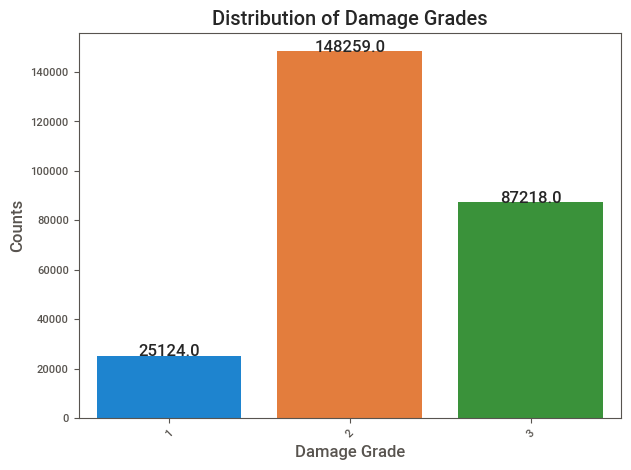

In [10]:
plt.figure(figsize=(7, 5))  

# Create the countplot
sns.countplot(data, x='damage_grade')

# Add labels and title
plt.xlabel('Damage Grade')
plt.ylabel('Counts')
plt.title('Distribution of Damage Grades')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')

plt.show()


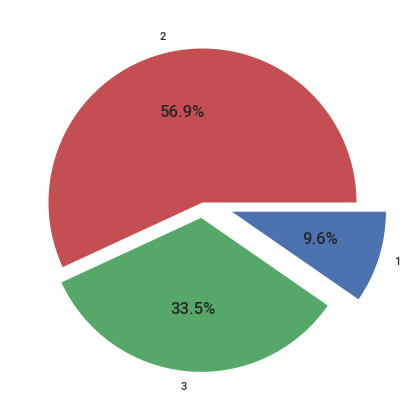

In [11]:
label = list(data['damage_grade'].value_counts().index)
explode  = (0,0.1,0.2)

plt.figure(figsize = (7,5))
plt.pie(data['damage_grade'].value_counts(), labels = label, explode = explode, autopct = '%.1f%%', colors = ['r','g','b'])
plt.show()

### Observations made from the pie chat
- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction



    - 9.6% of the buildings experienced minor damage from the earthquake.
    - 56.9% incurred moderate damage.
    - 33.5% suffered severe damage due to the earthquake.

### To investigate whether the geographic region in which building exists has an impact on the extent of damage caused by an earthquake.

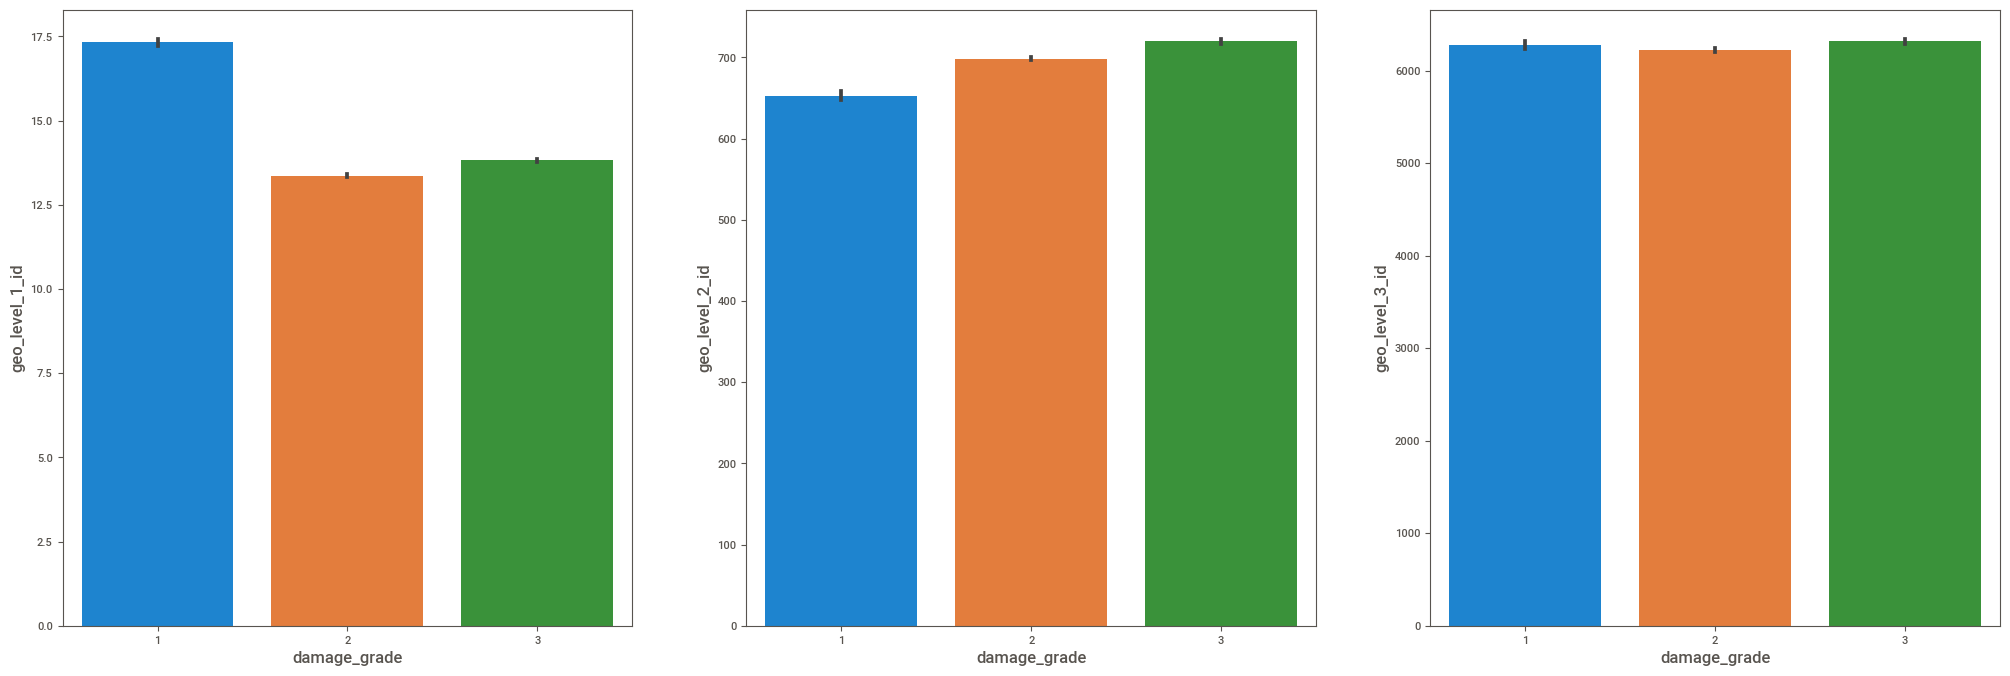

In [12]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 3, 1)
sns.barplot(data=data, x='damage_grade', y='geo_level_1_id')

plt.subplot(1, 3, 2)
sns.barplot(data=data, x='damage_grade', y='geo_level_2_id')

plt.subplot(1, 3, 3)
sns.barplot(data=data, x='damage_grade', y='geo_level_3_id')

plt.show()


### To investigate whether the age of a building has an impact on the extent of damage caused by an earthquake, we will analyze the data and assess the relationship between the age of buildings and the earthquake damage.

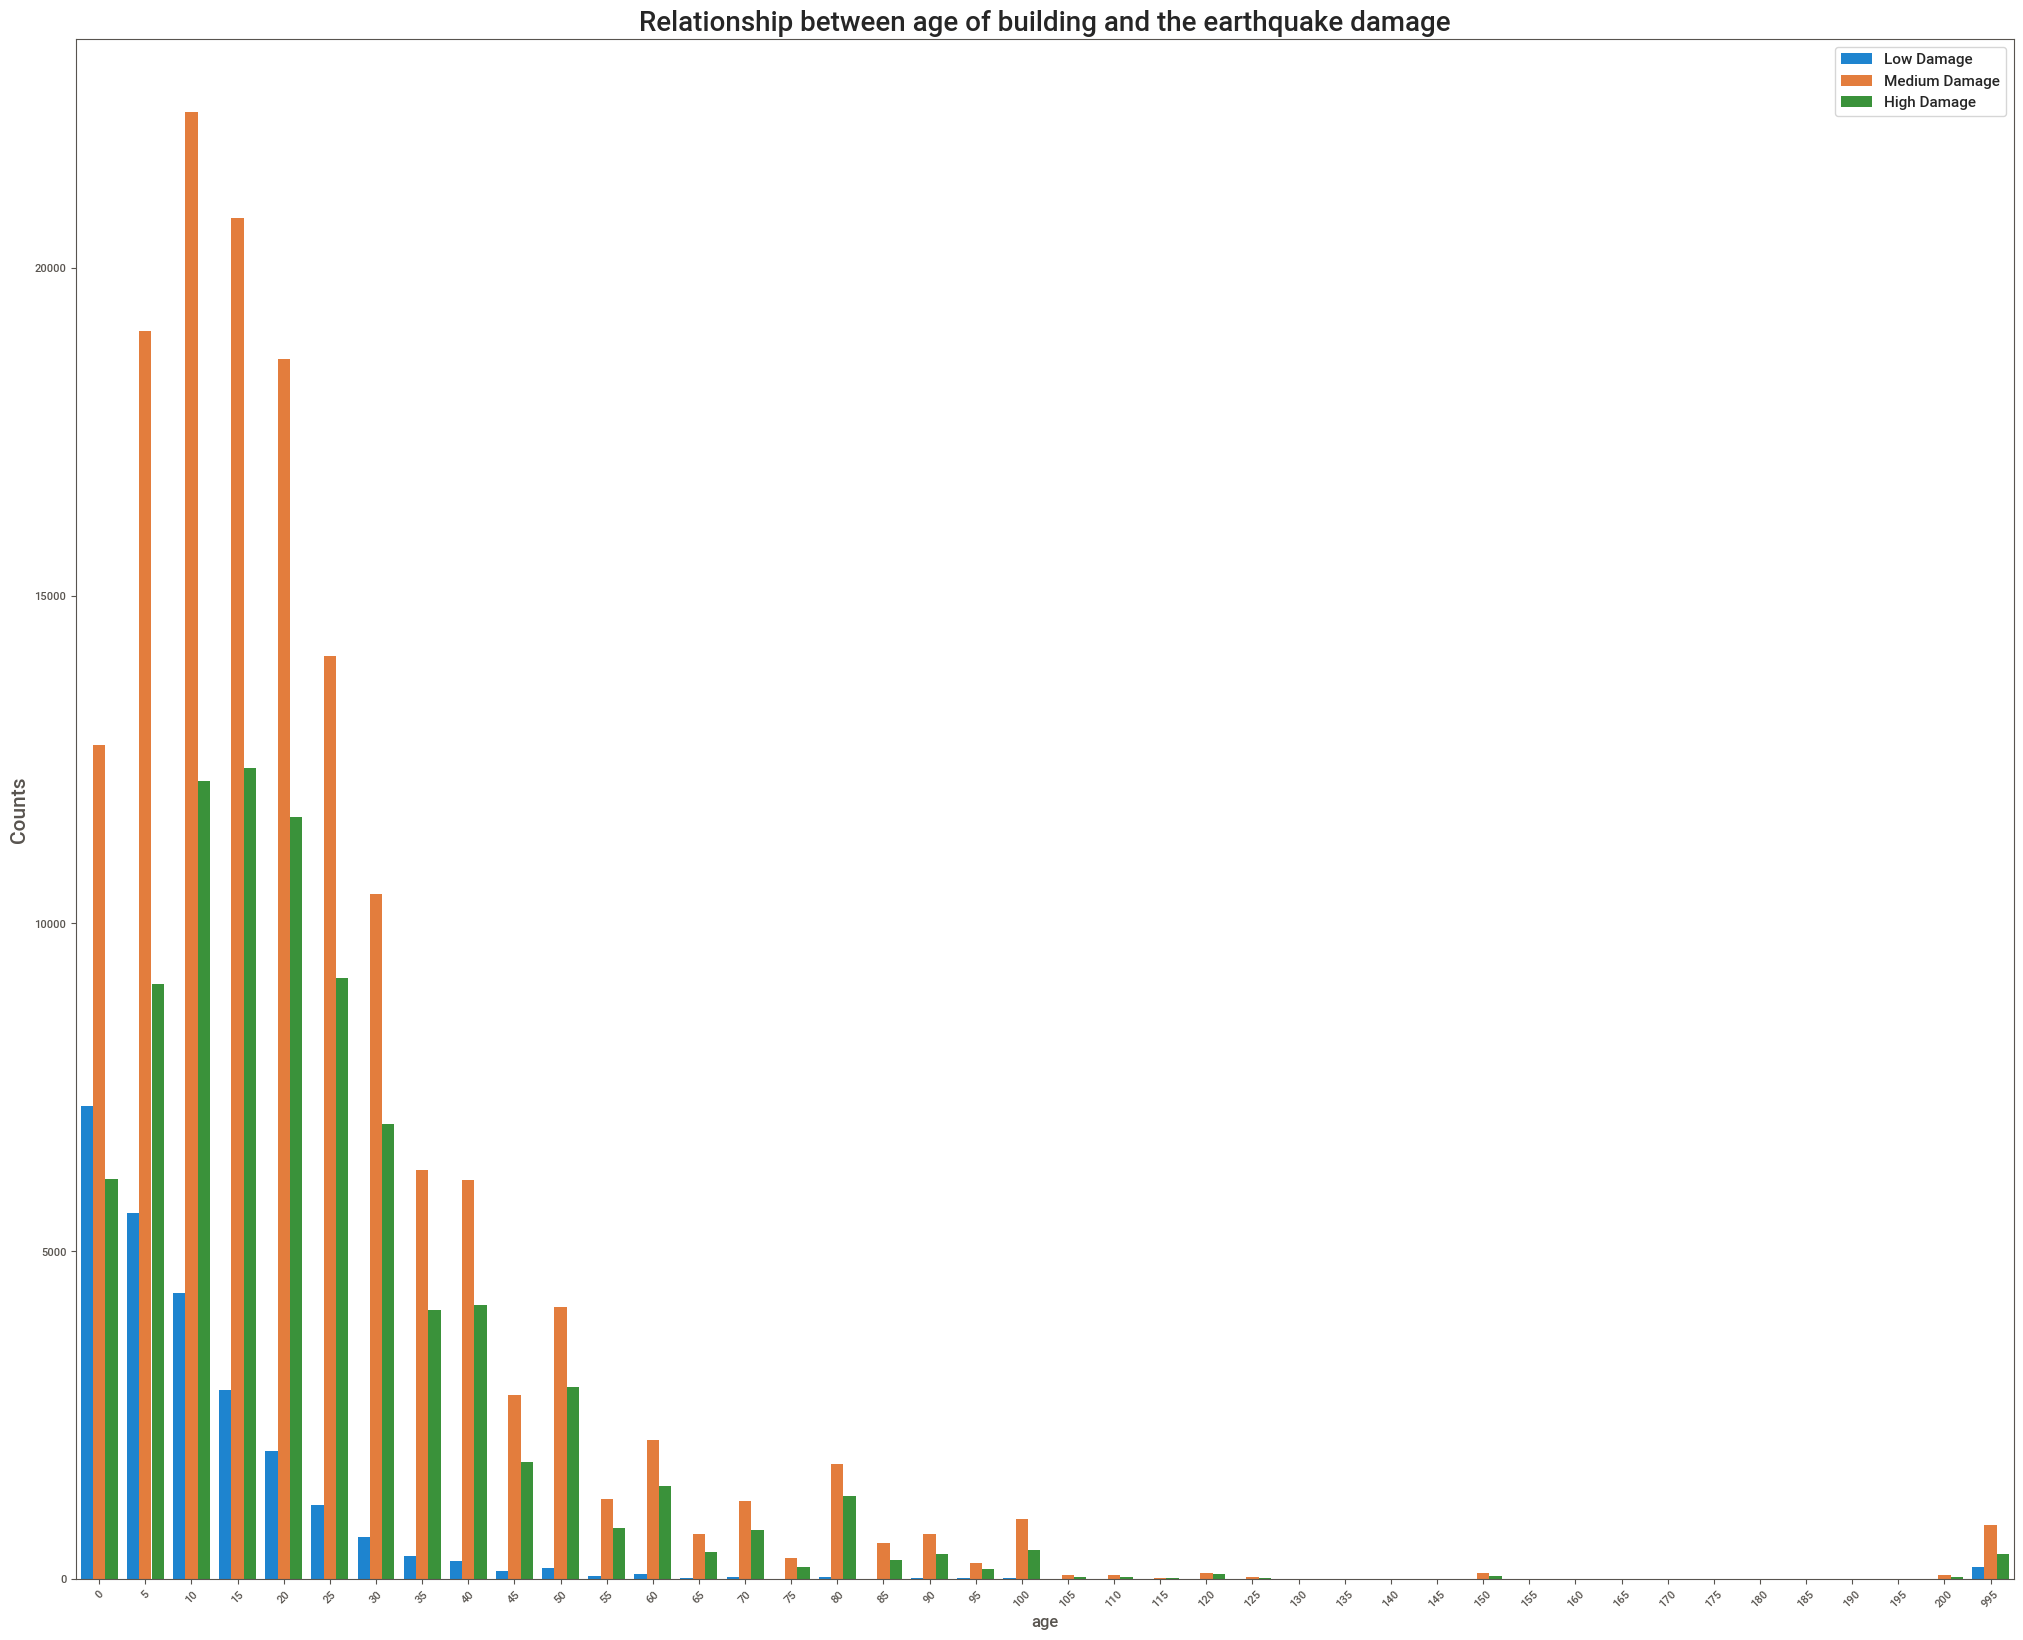

In [13]:
plt.figure(figsize=(25, 20))
sns.countplot(x = data['age'], hue = data['damage_grade'])
plt.title('Relationship between age of building and the earthquake damage',fontweight = 'bold', fontsize = 20)
plt.ylabel('Counts',fontsize = 15, fontweight = 'bold')
plt.legend(['Low Damage', 'Medium Damage', 'High Damage'], loc = 'upper right')
plt.xticks(rotation = 45)
plt.show()

### Plot to show how each categorical feature correlate with the target variable (damage_grade)

In [14]:
# Create a new dataframe with categorical variables only 
cat_features = []
for columns in data.columns:
    if data[columns].dtype=='O':
        cat_features.append(columns)

In [15]:
cat_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [16]:
# creating dataframe (converting the list to dataframe)for the categorical features
cat_features_df = pd.DataFrame({col: data[col] for col in cat_features})

In [17]:
cat_features_df

land_surface_condition foundation_type roof_type ground_floor_type  \
0                 t                   r            n             f          
1                 o                   r            n             x          
2                 t                   r            n             f          
3                 t                   r            n             f          
4                 t                   r            n             f          
...                       ...             ...       ...               ...   
260596            n                   r            n             f          
260597            t                   r            n             f          
260598            t                   r            q             f          
260599            t                   r            x             v          
260600            n                   r            n             f          

       other_floor_type position plan_configuration legal_ownership_status  
0              q            t             d                    v            
1              q            s             d                    v            
2              x            t             d                    v            
3              x            s             d                    v            
4              x            s             d                    v            
...                 ...      ...                ...                    ...  
260596         j            s             q                    v            
260597         q            s             d                    v            
260598         q            s             d                    v            
260599         s            j             d                    v            
260600         q            j             d                    v            

[260601 rows x 8 columns]

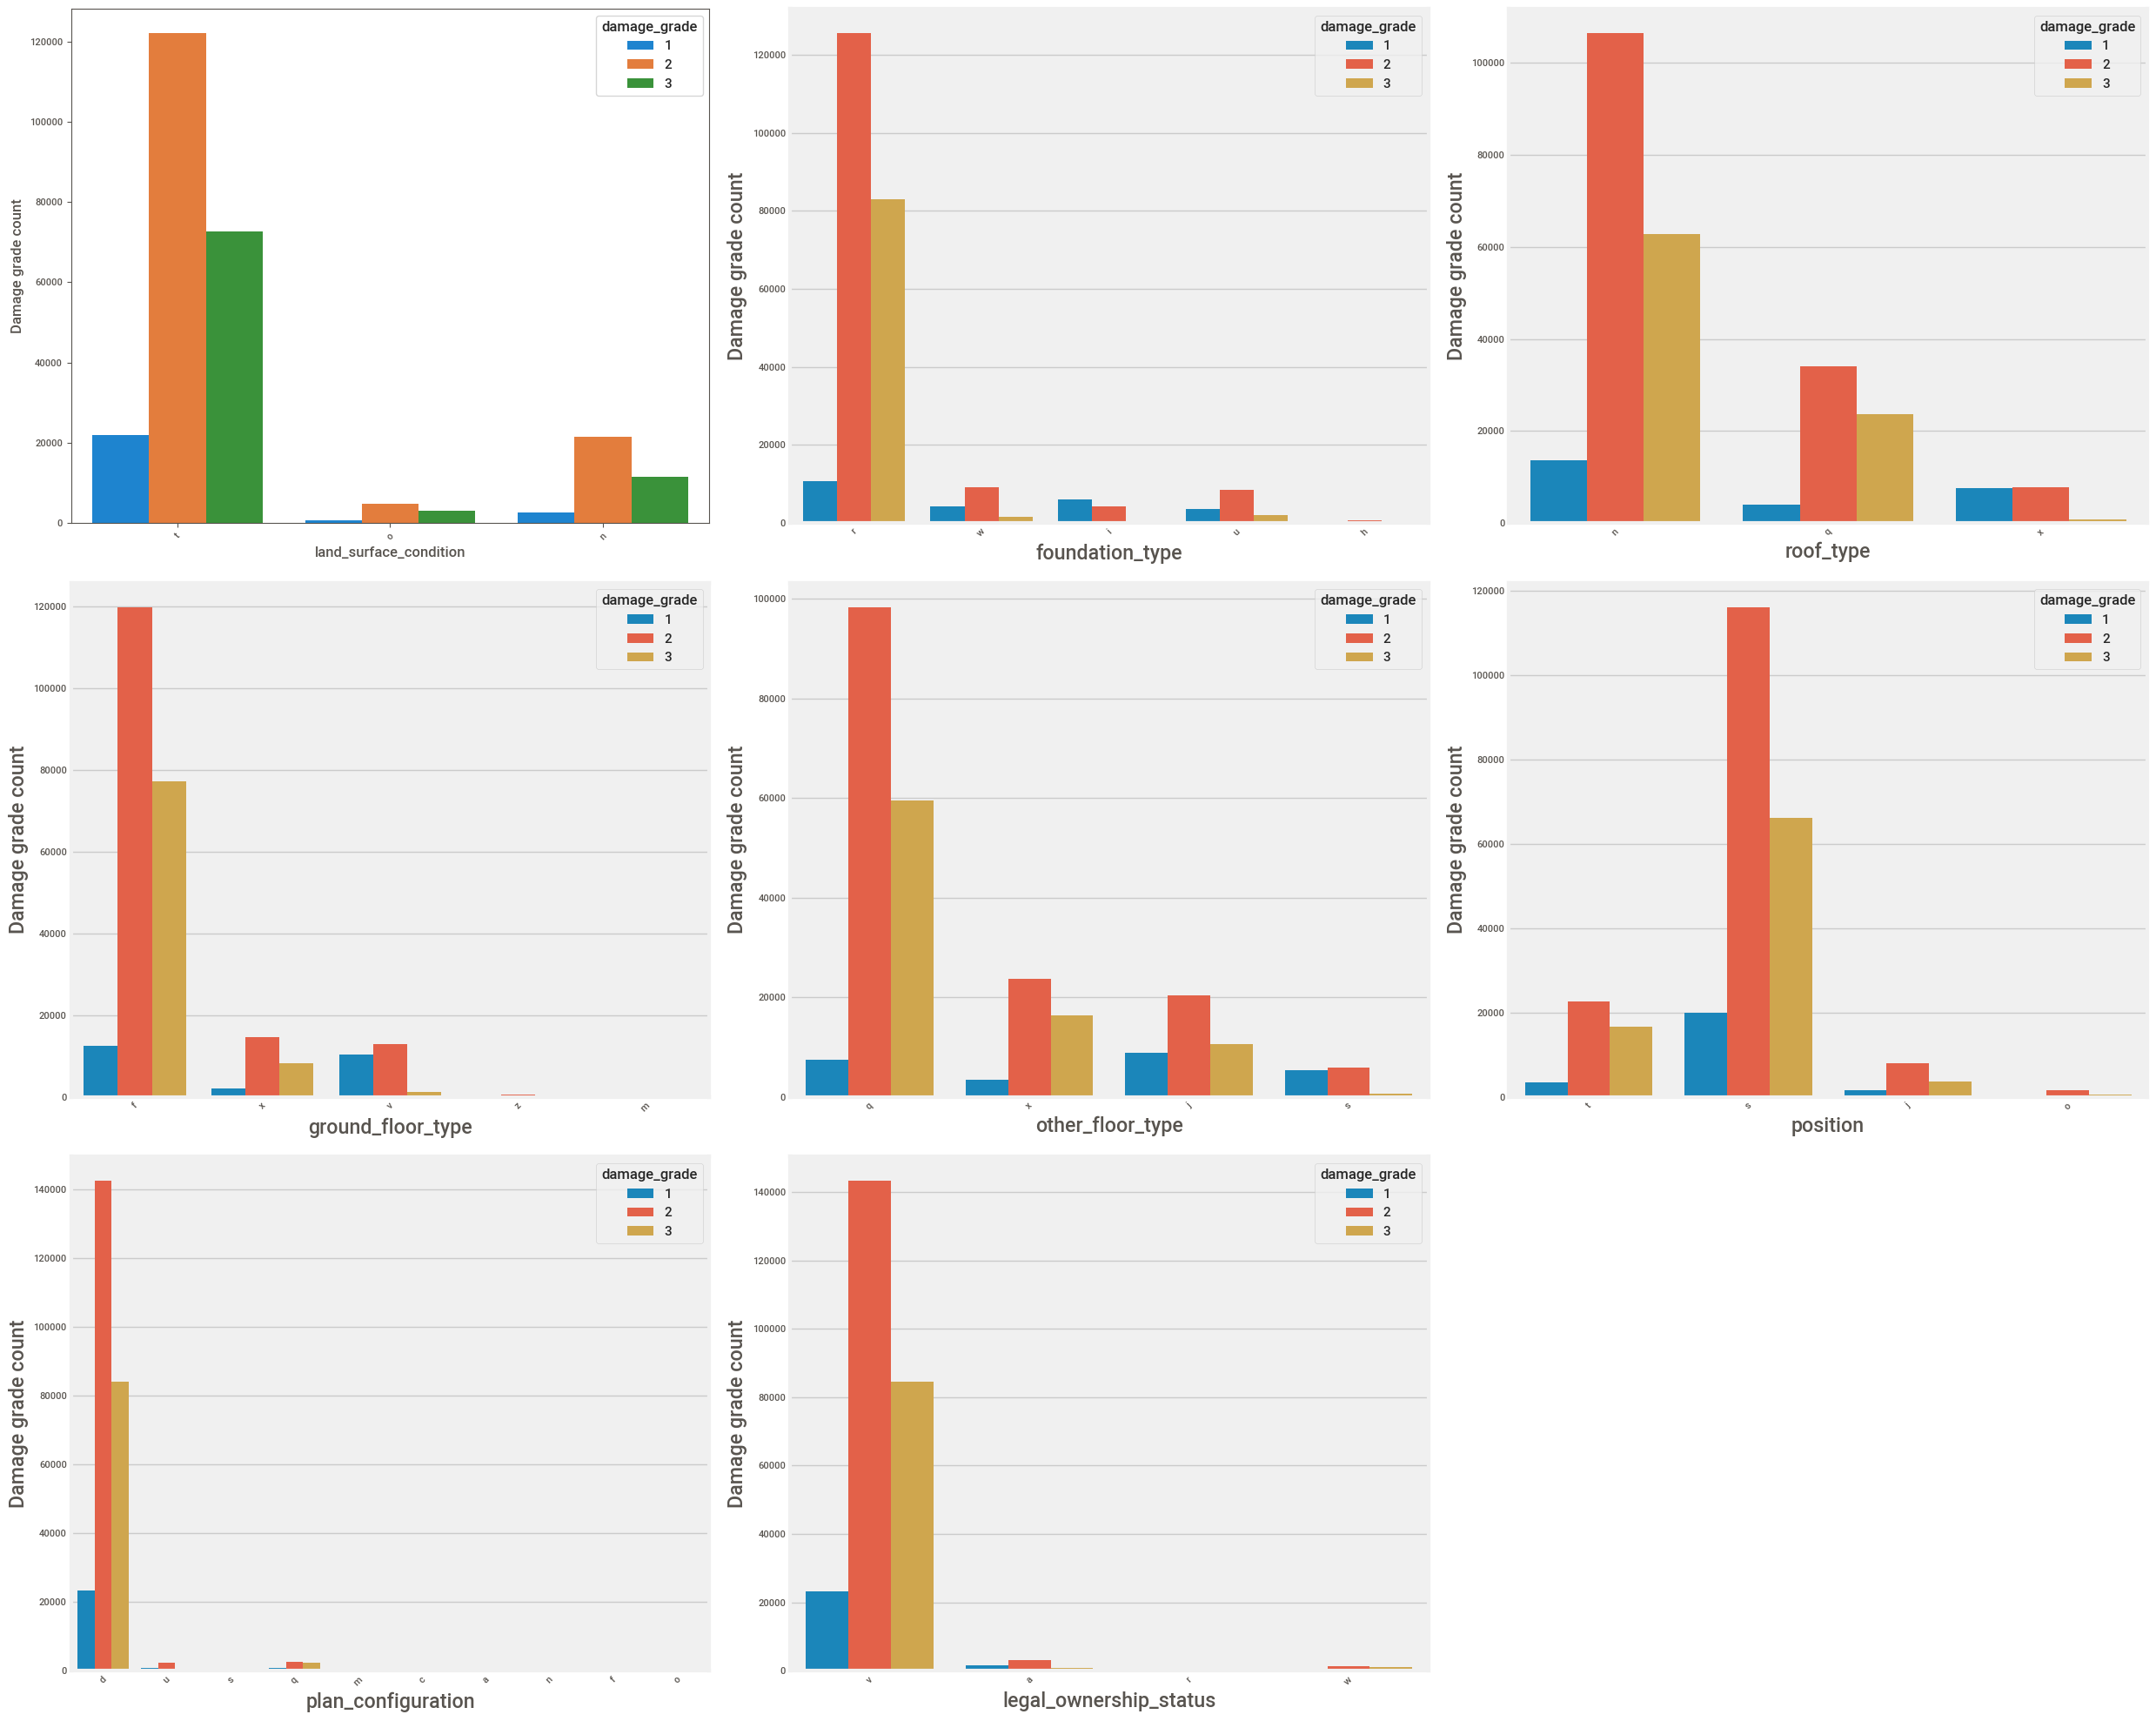

In [18]:
# plot to show how each categorical feature correlate with the target variable (damage_grade)
plt.figure(figsize = (25,20))
plotnumber = 1
for column in cat_features_df:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x = cat_features_df[column], hue = data['damage_grade'])
        plt.xlabel(column,fontweight = 'bold')
        plt.ylabel('Damage grade count',fontweight = 'bold')
        plt.xticks(rotation = 45)
        plt.rcParams['font.size'] = 16  
        plt.style.use('fivethirtyeight')
    plotnumber+=1
plt.tight_layout()
plt.show()

### Plot to show how each binary feature correlate with the target variable (damage_grade)

In [19]:
# Create new dataframe with binary features
bin_features = []
for column in data.columns:
    if set(data[column].unique())=={0,1}:
        bin_features.append(column)

In [20]:
bin_features

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [21]:
bin_features_df = pd.DataFrame({col: data[col] for col in bin_features})
bin_features_df

has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ...   
260596                0                                1                    
260597                0                                1                    
260598                0                                1                    
260599                0                                0                    
260600                0                                1                    

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                     0                                   0                     
1                     0                                   0                     
2                     0                                   0                     
3                     0                                   0                     
4                     0                                   0                     
...                               ...                                     ...   
260596                0                                   0                     
260597                0                                   0                     
260598                0                                   0                     
260599                0                                   0                     
260600                0                                   0                     

        has_superstructure_mud_mortar_brick  \
0                        0                    
1                        0                    
2                        0                    
3                        0                    
4                        0                    
...                                     ...   
260596                   0                    
260597                   0                    
260598                   0                    
260599                   0                    
260600                   0                    

        has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                          0                                0               
1                          0                                0               
2                          0                                0               
3                          0                                1               
4                          0                                0               
...                                        ...                        ...   
260596                     0                                0               
260597                     0                                0               
260598                     0                                0               
260599                     1                                0               
260600                     0                                0               

        has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                   0                                0                    
1                   0                                0                    
2                   0                                0                    
3                   1                                0                    
4                   0                                0                    
...                           ...                                   ...   
260596              0                                0                    
260597              

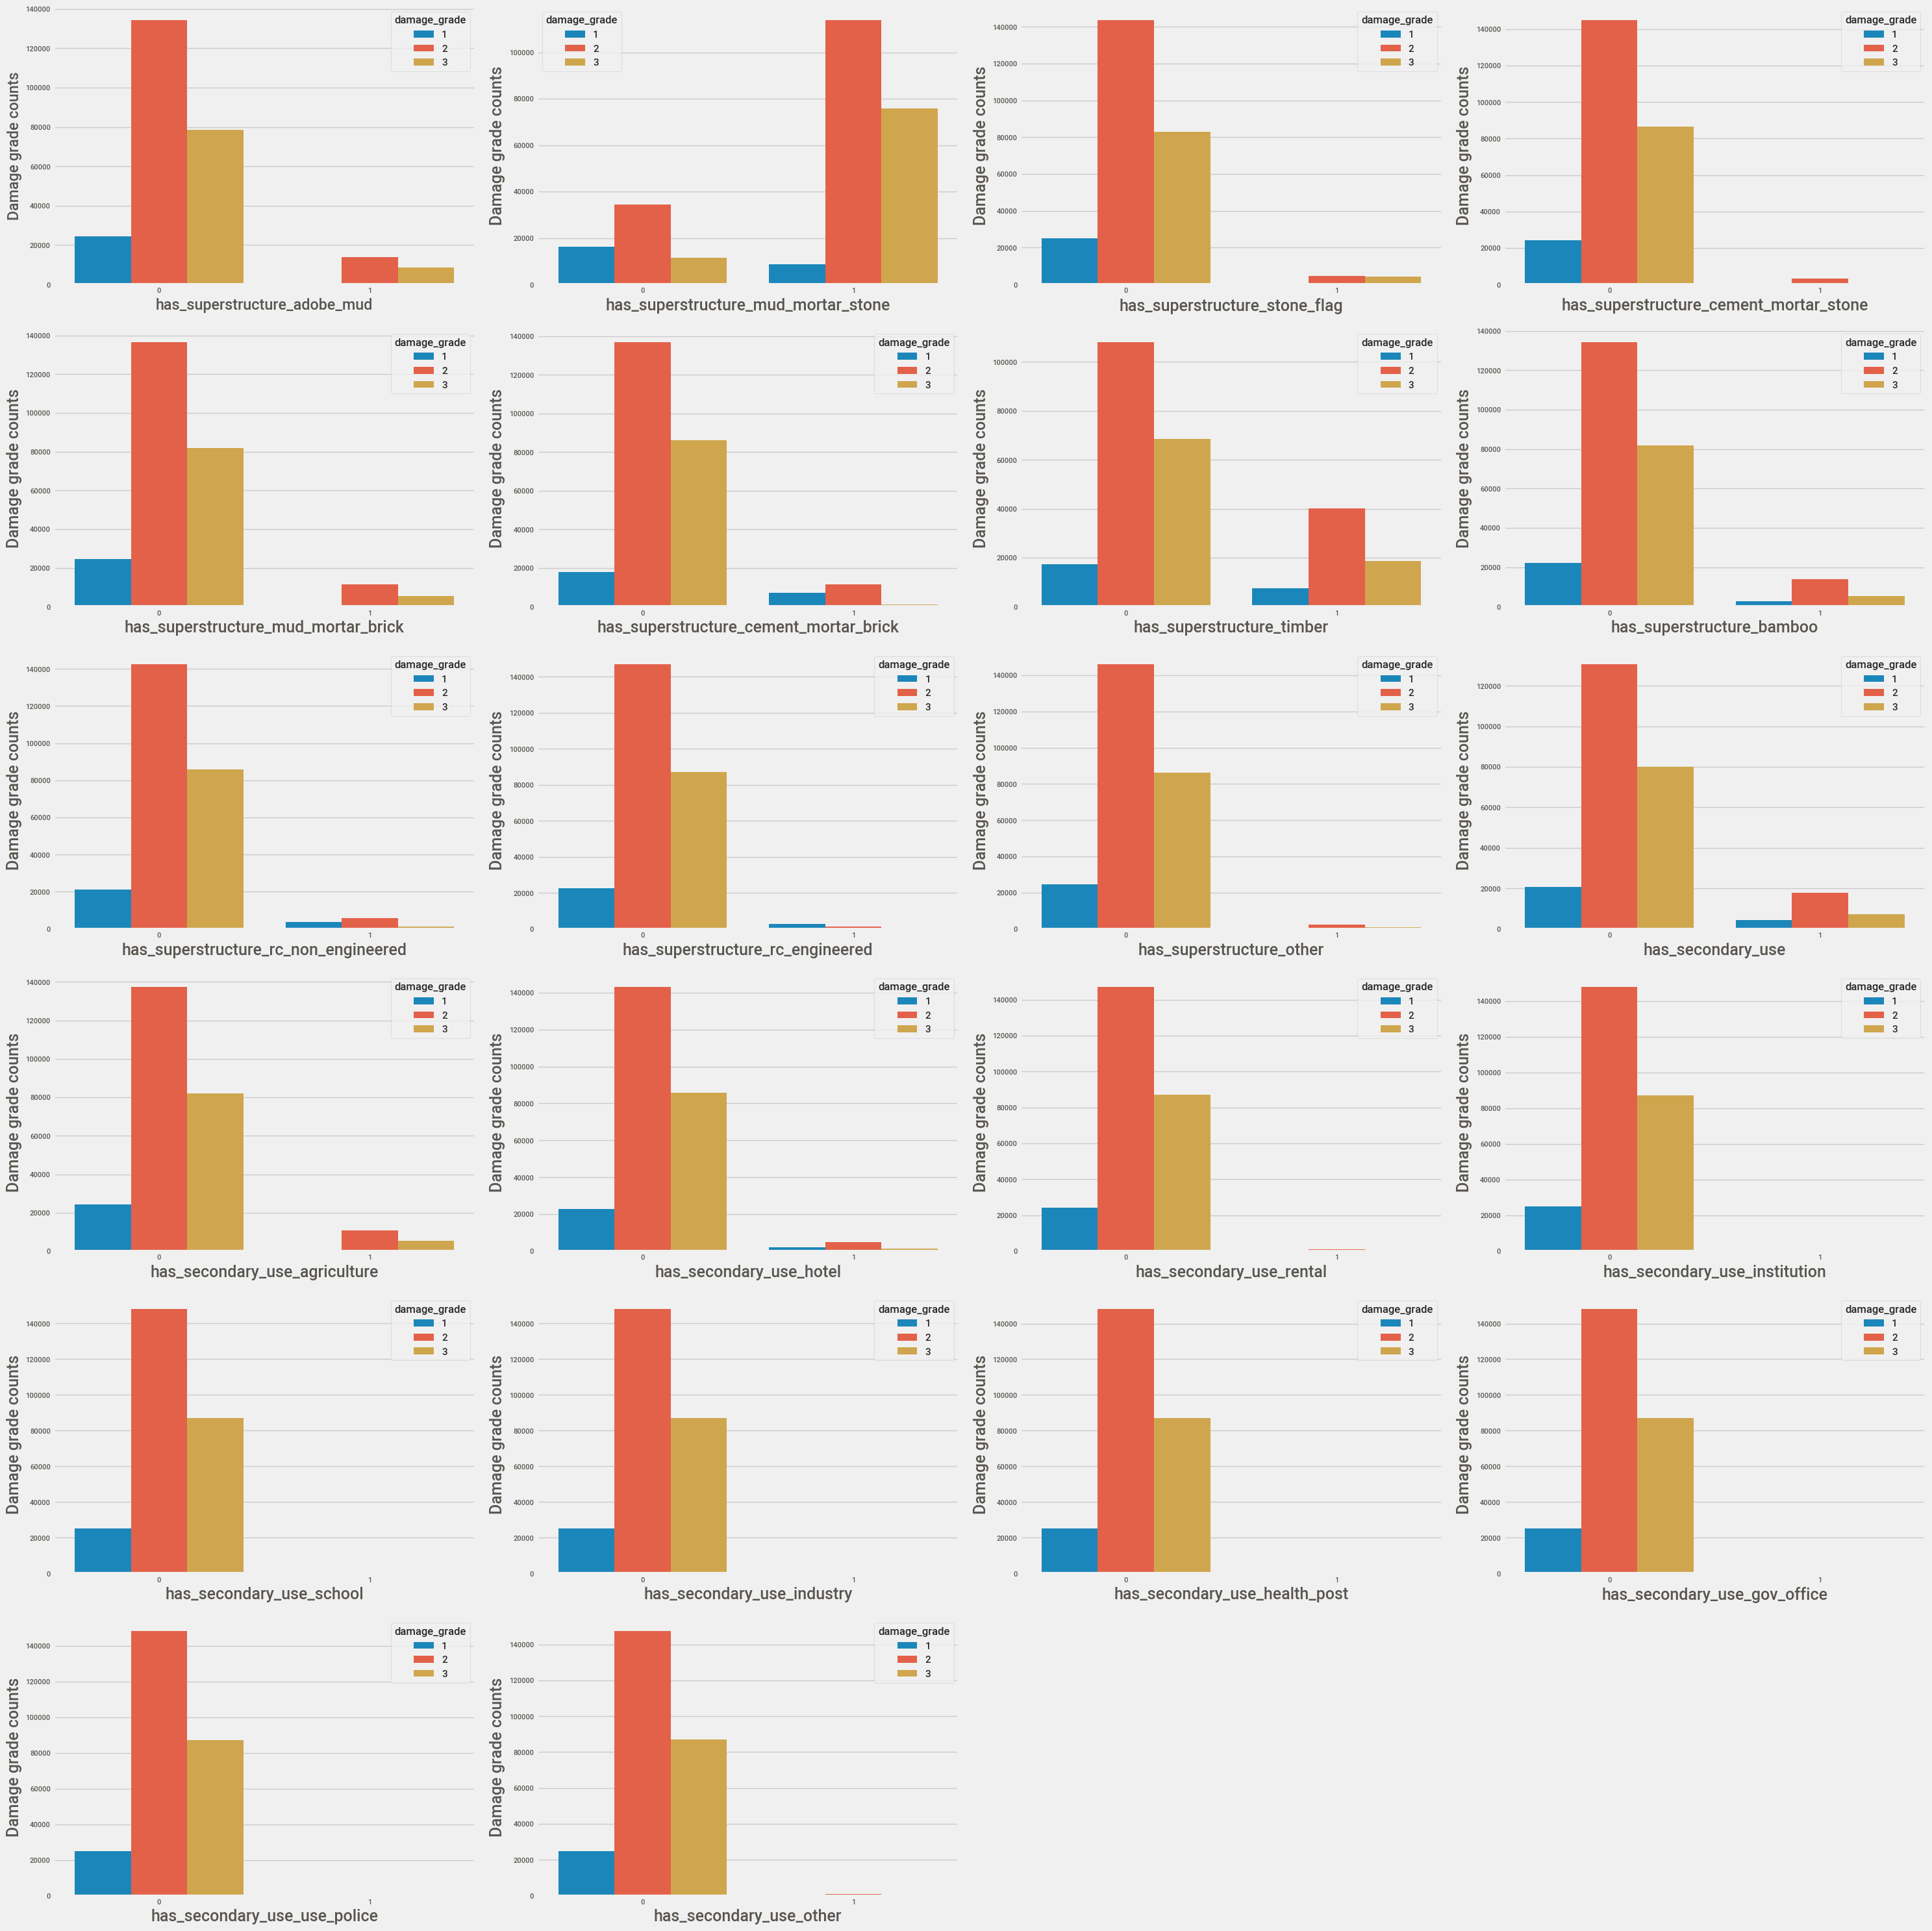

In [22]:
plt.figure(figsize = (30,30))
plotnumber = 1
for column in bin_features_df:
    if plotnumber <= 22:
        ax = plt.subplot(6,4,plotnumber)
        sns.countplot(x = bin_features_df[column], hue = data['damage_grade'])
        plt.xlabel(column, fontweight = 'bold')
        plt.ylabel('Damage grade counts', fontweight = 'bold')
        plt.style.use('fivethirtyeight')
        plt.rcParams['font.size'] = 15    
    plotnumber+=1
plt.tight_layout()
plt.show()

### Plot to show how each continuous feature correlate with the target variable (damage_grade)

In [23]:
#Create new dataframe with continuous features only
con_features = []
for column in data:
    if (data[column].dtype!= 'O' and 
        column not in bin_features and 
        column!='damage_grade' and 
        column!='building_id') :
        con_features.append(column)

In [24]:
con_features

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families']

In [25]:
con_features_df = pd.DataFrame({col: data[col] for col in con_features})
con_features_df

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0              6              487            12198               2            
1              8              900             2812               2            
2             21              363             8973               2            
3             22              418            10694               2            
4             11              131             1488               3            
...                ...             ...             ...                  ...   
260596        25             1335             1621               1            
260597        17              715             2060               2            
260598        17               51             8163               3            
260599        26               39             1851               2            
260600        21                9             9101               3            

        age  area_percentage  height_percentage  count_families  
0       30          6                 5                 1        
1       10          8                 7                 1        
2       10          5                 5                 1        
3       10          6                 5                 1        
4       30          8                 9                 1        
...     ...              ...                ...             ...  
260596  55          6                 3                 1        
260597   0          6                 5                 1        
260598  55          6                 7                 1        
260599  10         14                 6                 1        
260600  10          7                 6                 3        

[260601 rows x 8 columns]

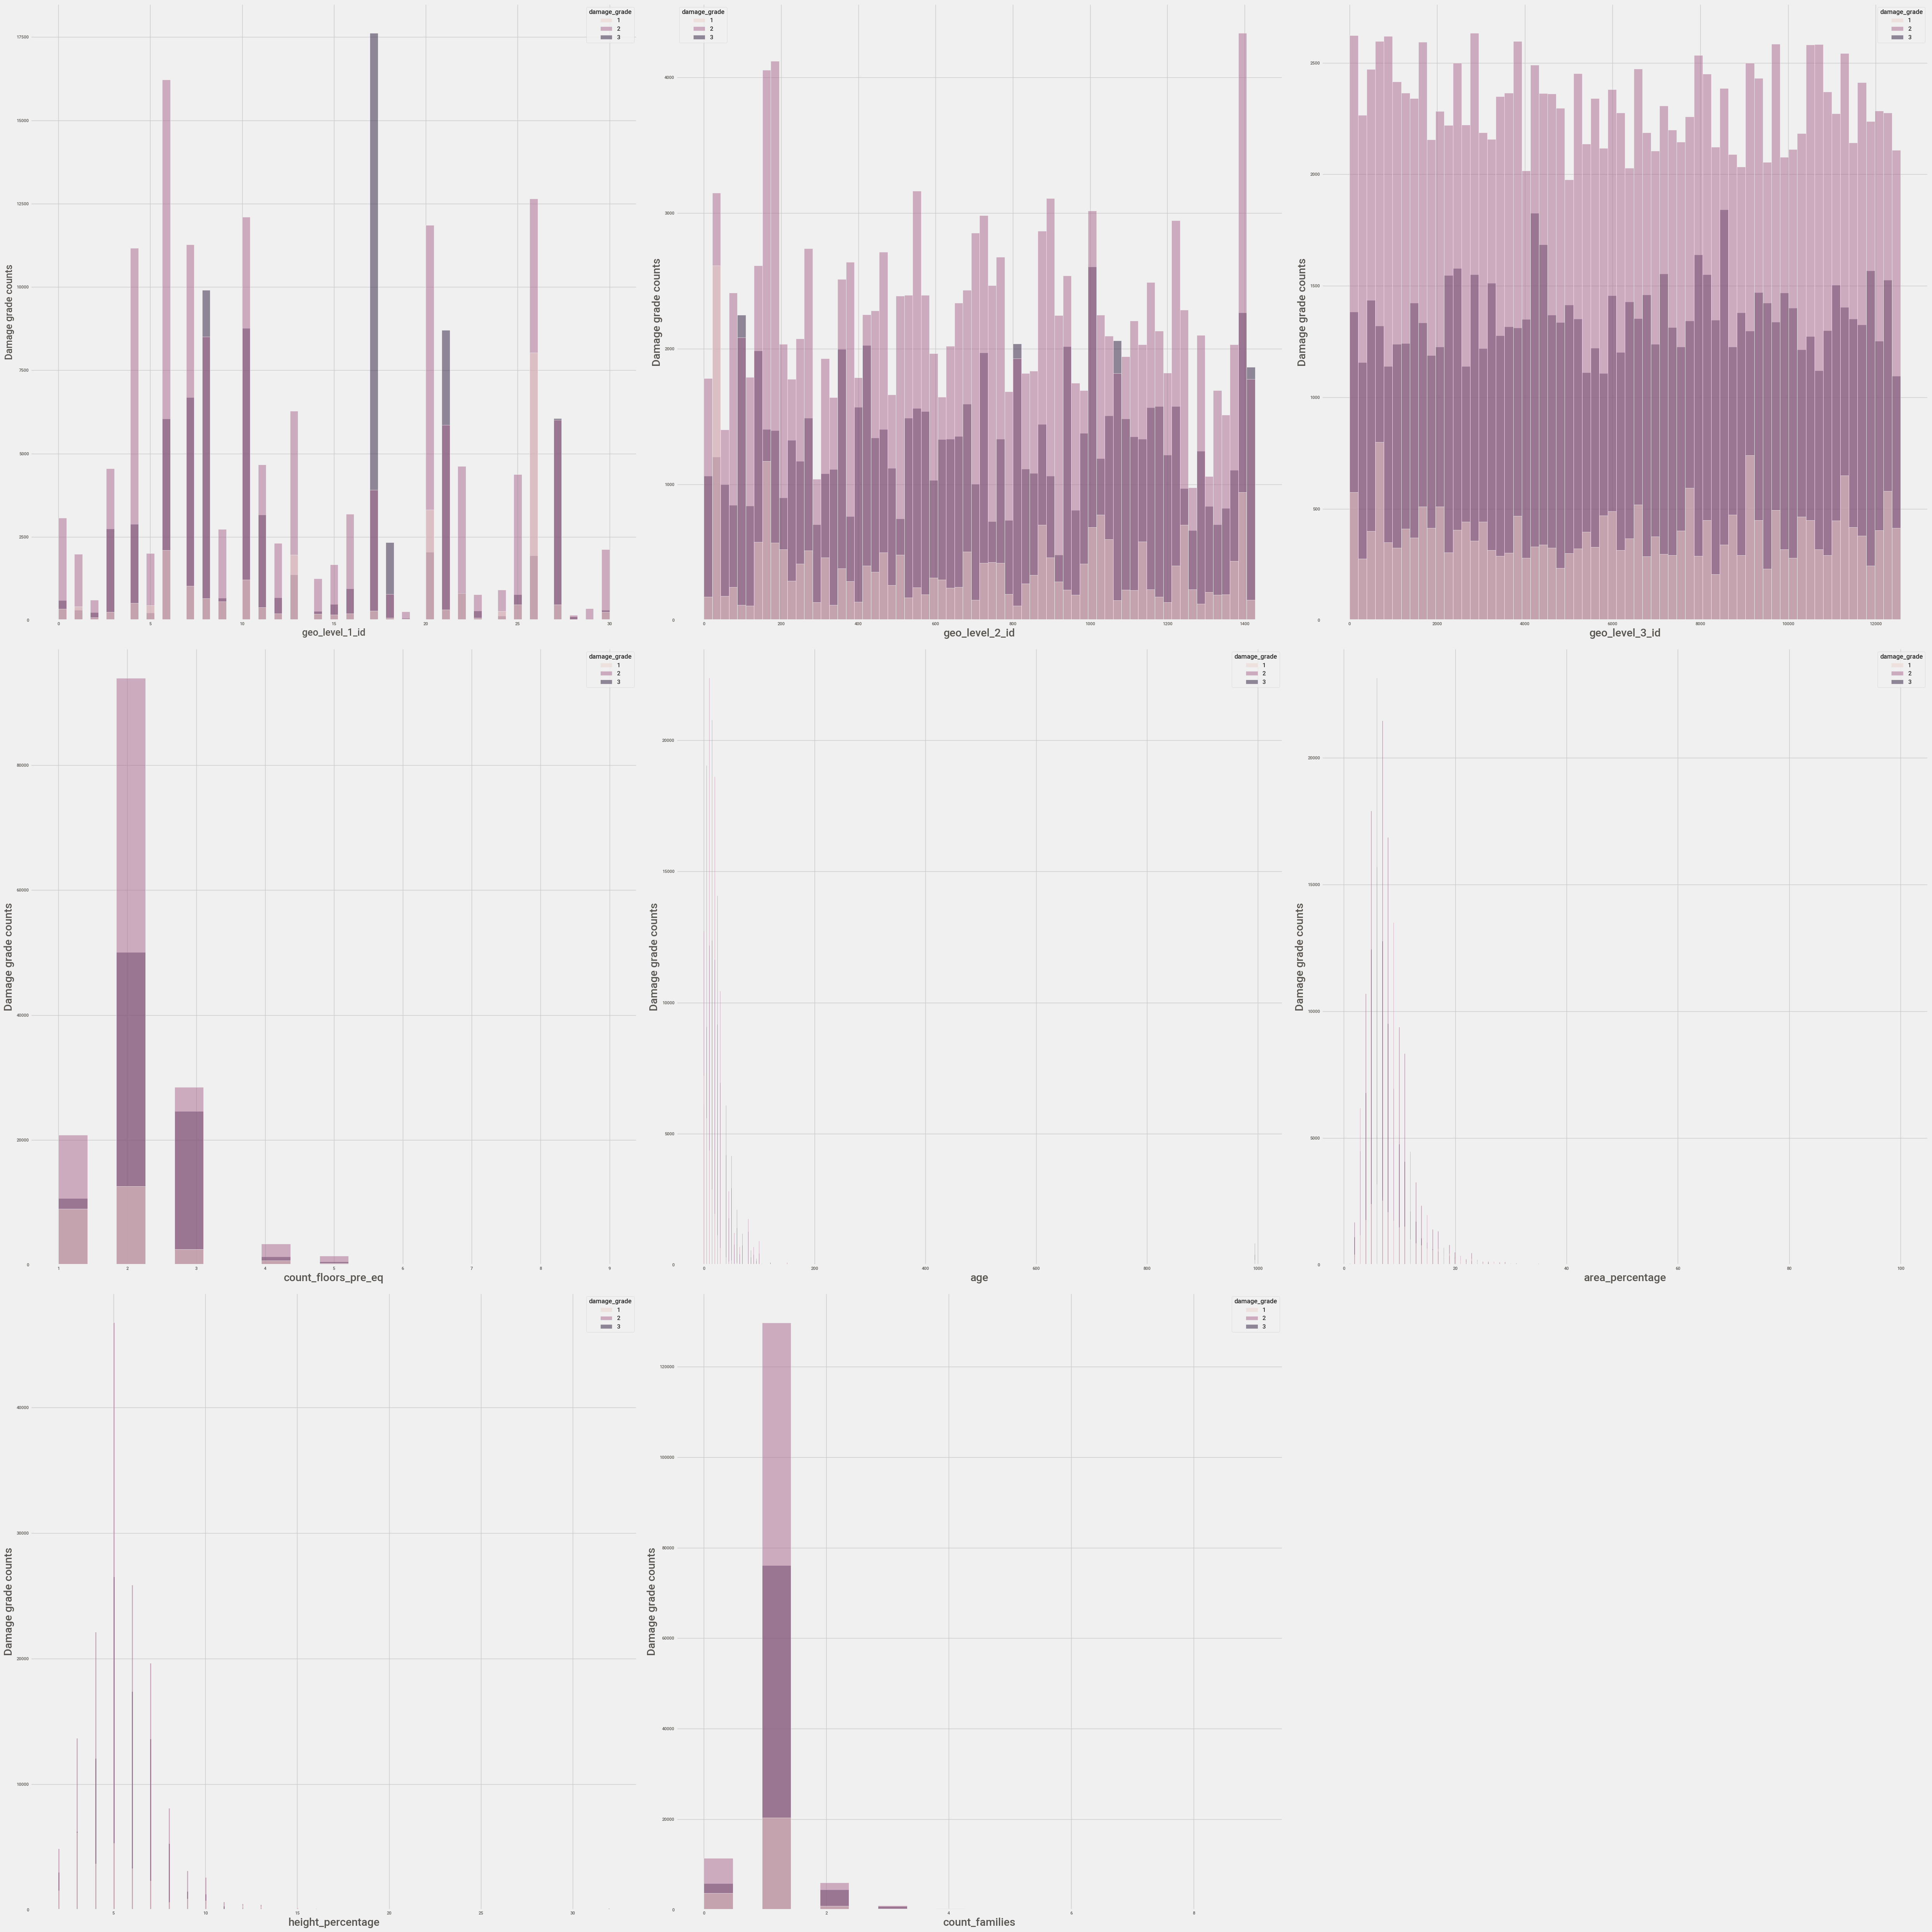

In [26]:
# plotting how each continuous feature correlate with the target variable (damaged_grade)
plt.figure(figsize = (50,50))
plotnumber = 1
for column in con_features_df:
    if plotnumber<=8: 
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x = con_features_df[column], hue = data['damage_grade'])
        plt.xlabel(column, fontweight = 'bold')
        plt.ylabel('Damage grade counts', fontweight = 'bold')
        plt.style.use('fivethirtyeight')
        plt.rcParams['font.size'] = 17    
    plotnumber+=1
plt.tight_layout()
plt.show()

In [27]:
numerical_col = data.select_dtypes(exclude='O').columns
categorical_col = data.select_dtypes(include='O').columns

In [28]:
len(numerical_col)

32

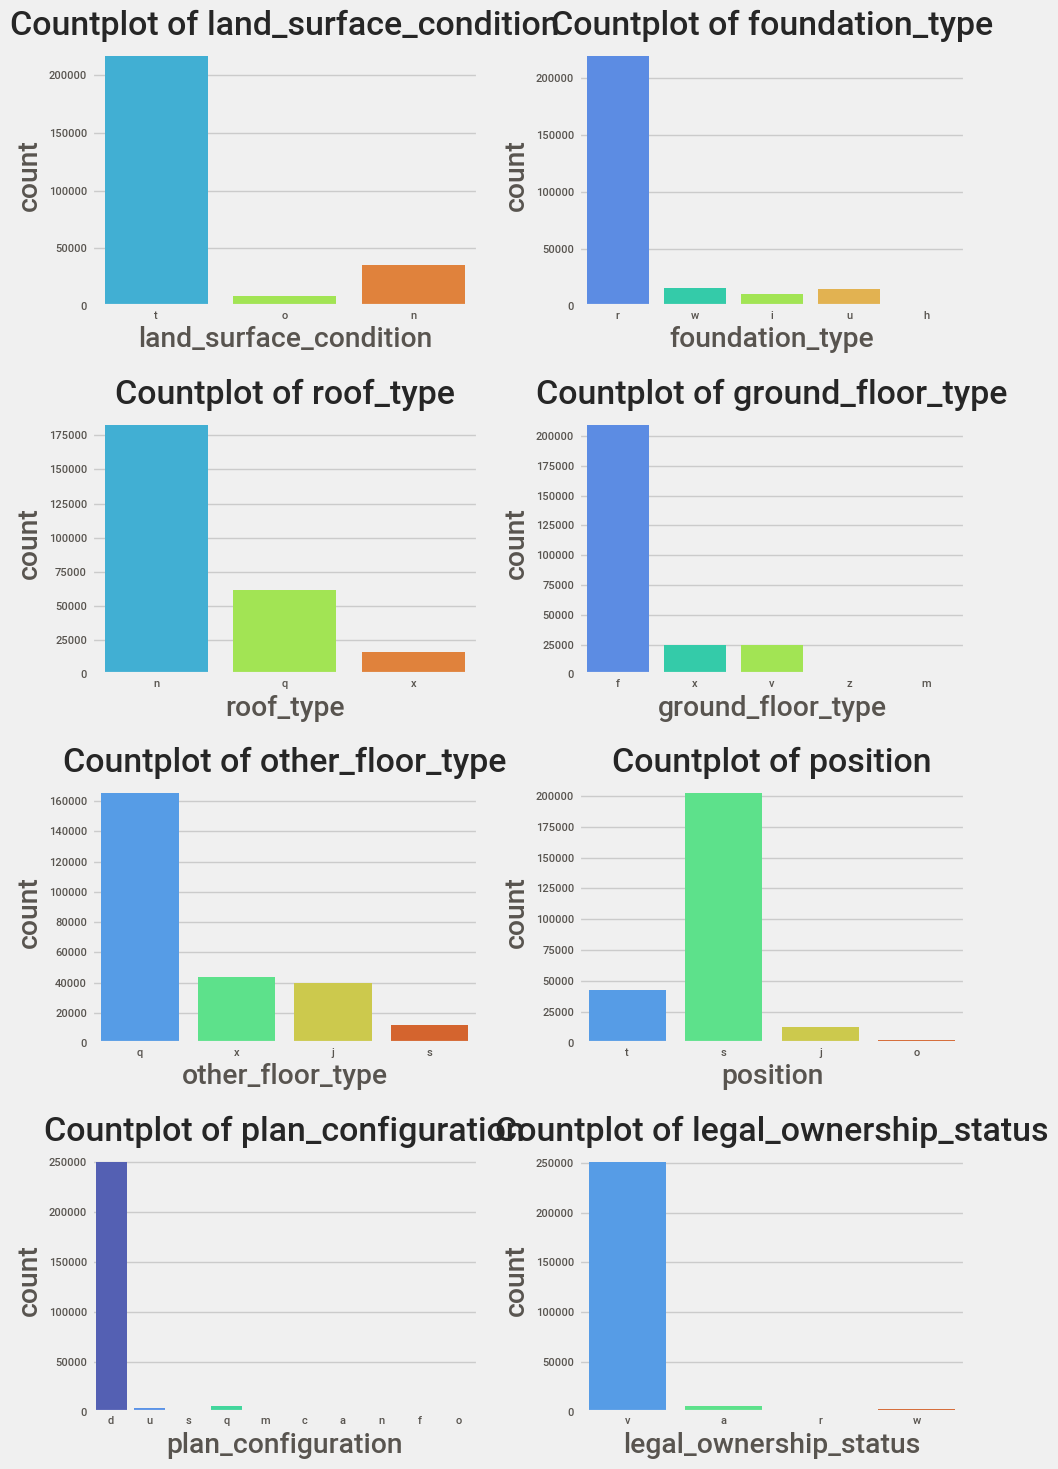

In [29]:
plt.figure(figsize=(10,15))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],palette="turbo")
        plt.title(f'Countplot of {col}')
        pltnum +=1

plt.tight_layout()
plt.show()

#### Insights
- `land_surface_condition`:-more land surface is of t(technical) type.
- `foundation_type`:-more buildings are of r(reinforced) type.
- `roof_type`:-more roofs are of n(normal) type.
- `ground_floor_type`:-more are of f(fine aggregate) type roofs.
- `other_floor_type`:- q type floors are more.
- `position`:-more buildings are in s(secondary) position.
- `plan_configuration`:-d type are more in plan_configuration.
- `legal_ownership_status`:-more are of private owned.

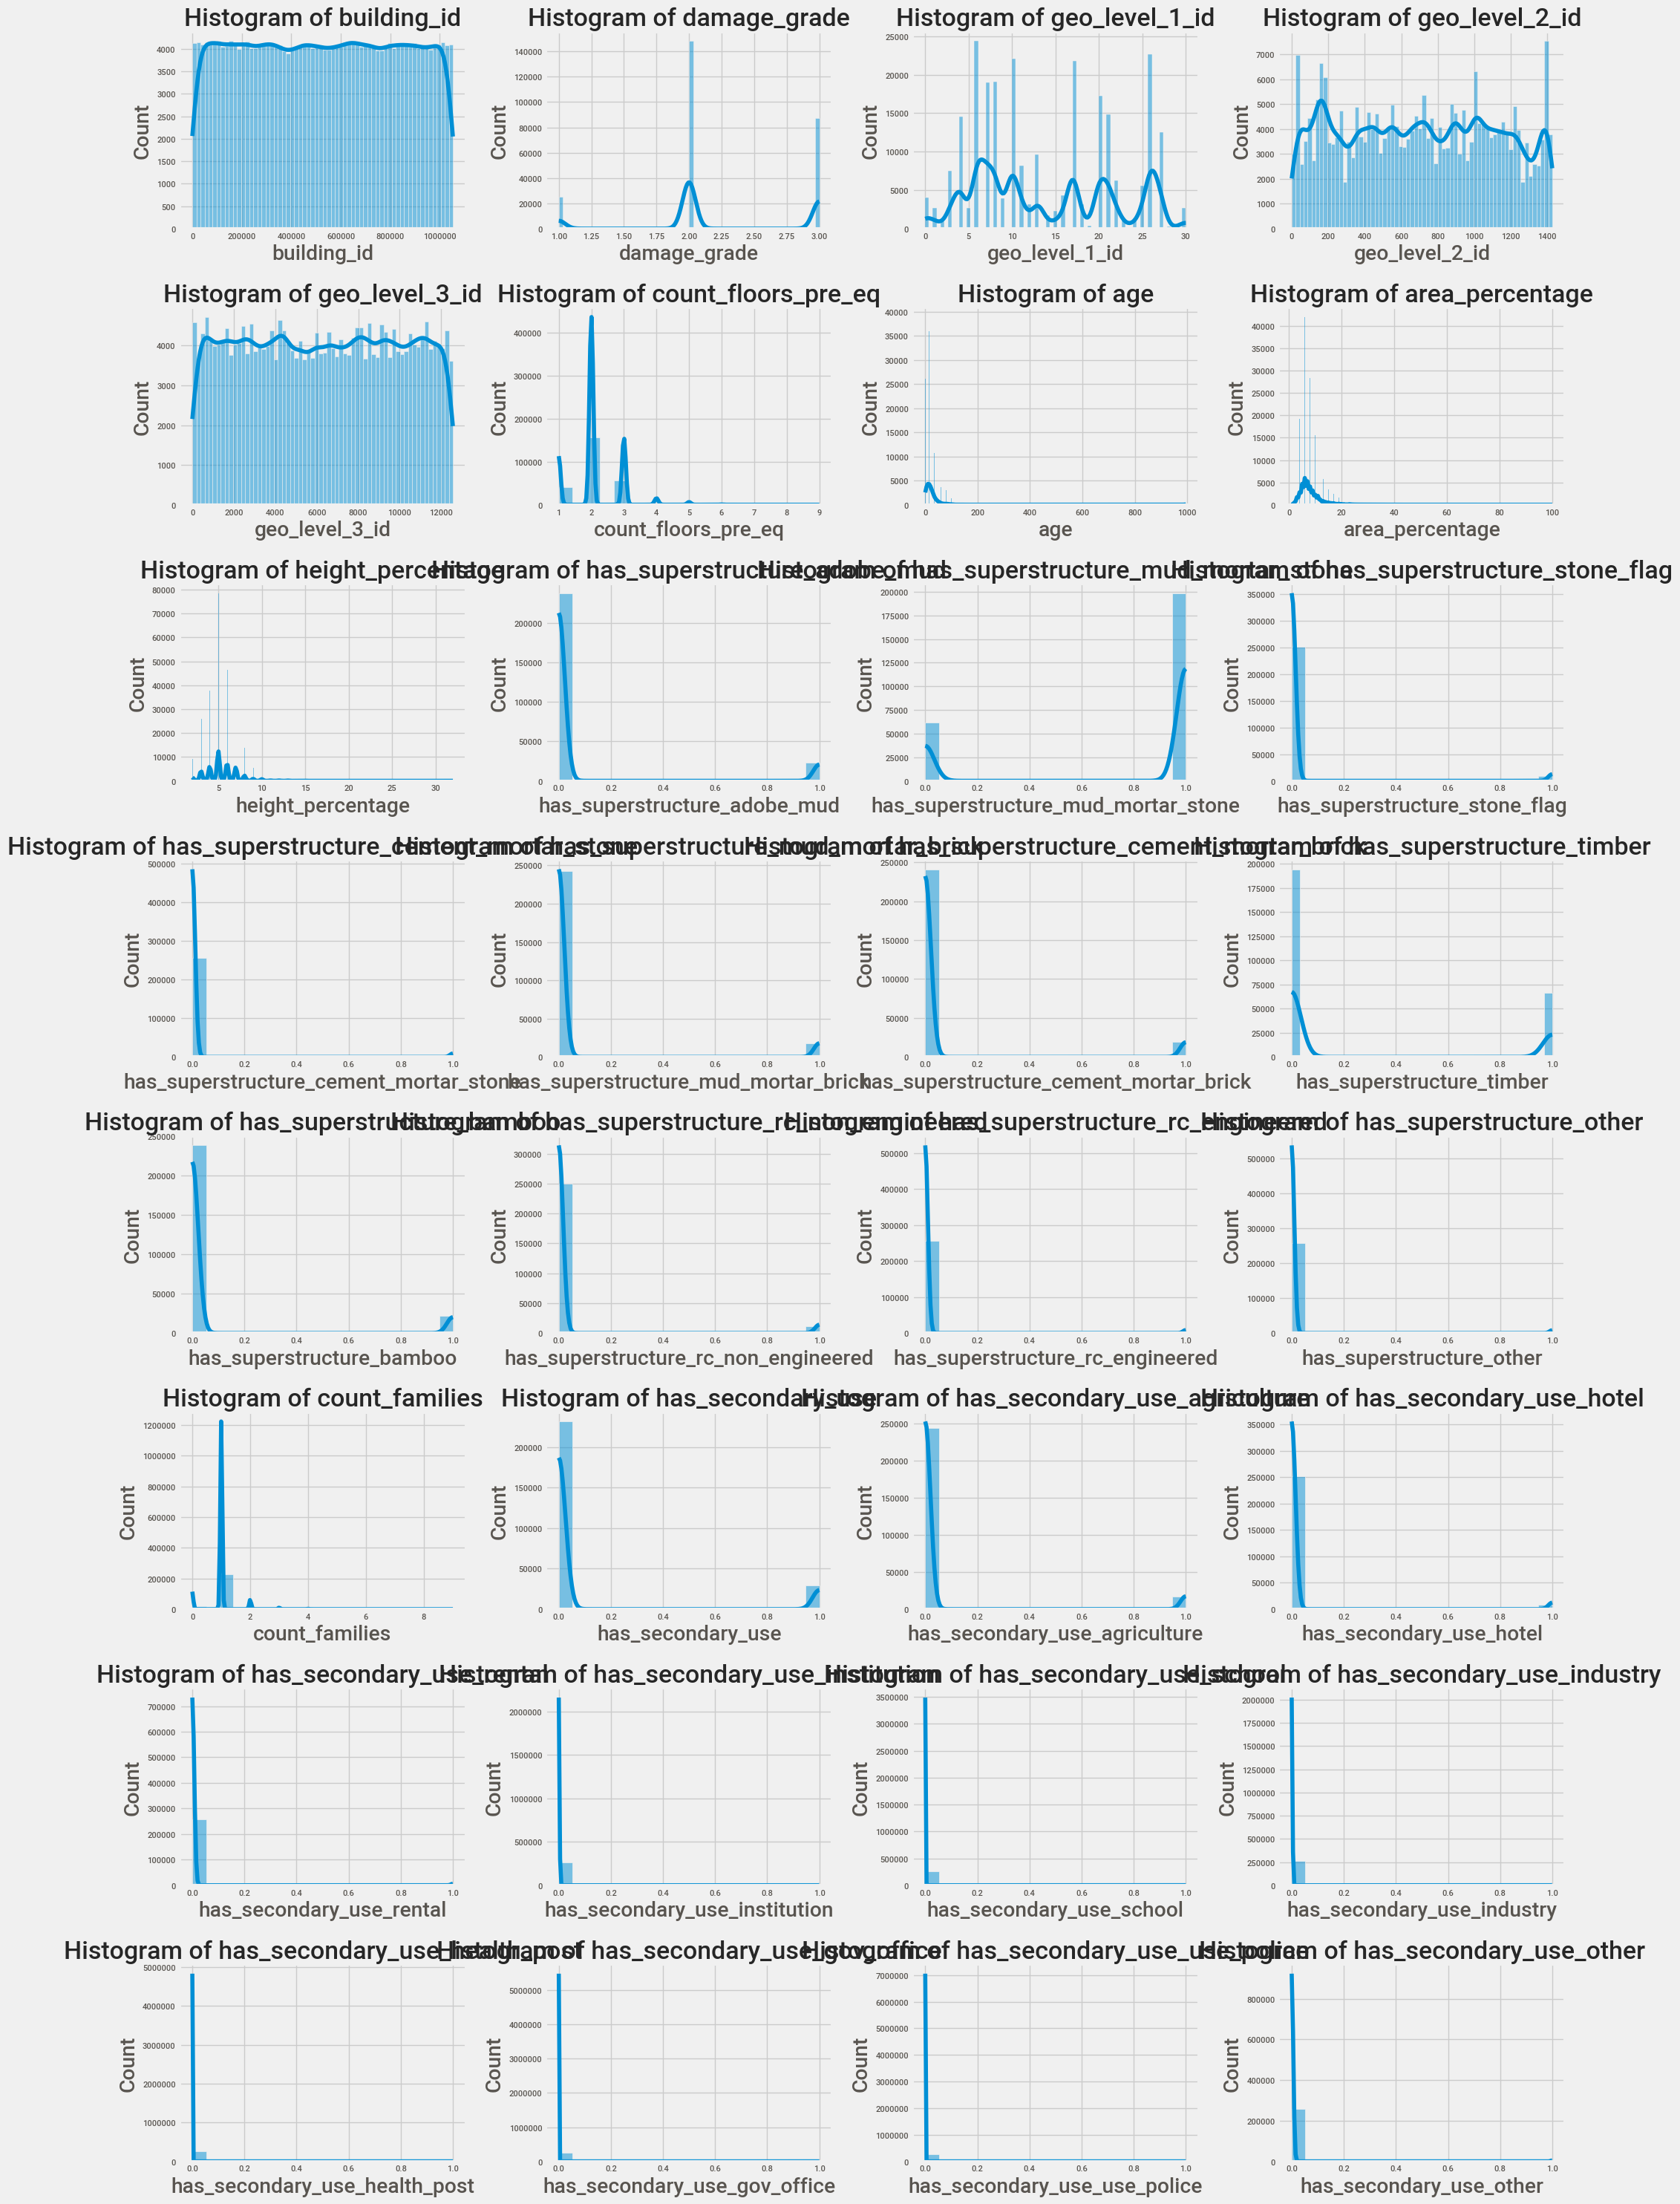

In [30]:
plt.figure(figsize=(20,30))
pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()
plt.show()

**Insights**
* 'has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other' - has discrete values `0 or 1` as its values, where all the features except has_superstructure_mud_mortar_brick has 0 as highest count.
* target column has 3 damage levels,the values are `imbalanced`
* 'building_id','geo_level_1_id', 'geo_level_2_id','geo_level_3_id' doesn't follow a particular pattern ,they are constant features and could be ignored
* age and area_percentage are postively skewed
* most of the buildings are newly build
* 2 storeyed buildings are more
* The independent homes are more compared to apartments


### Bivariate analysis

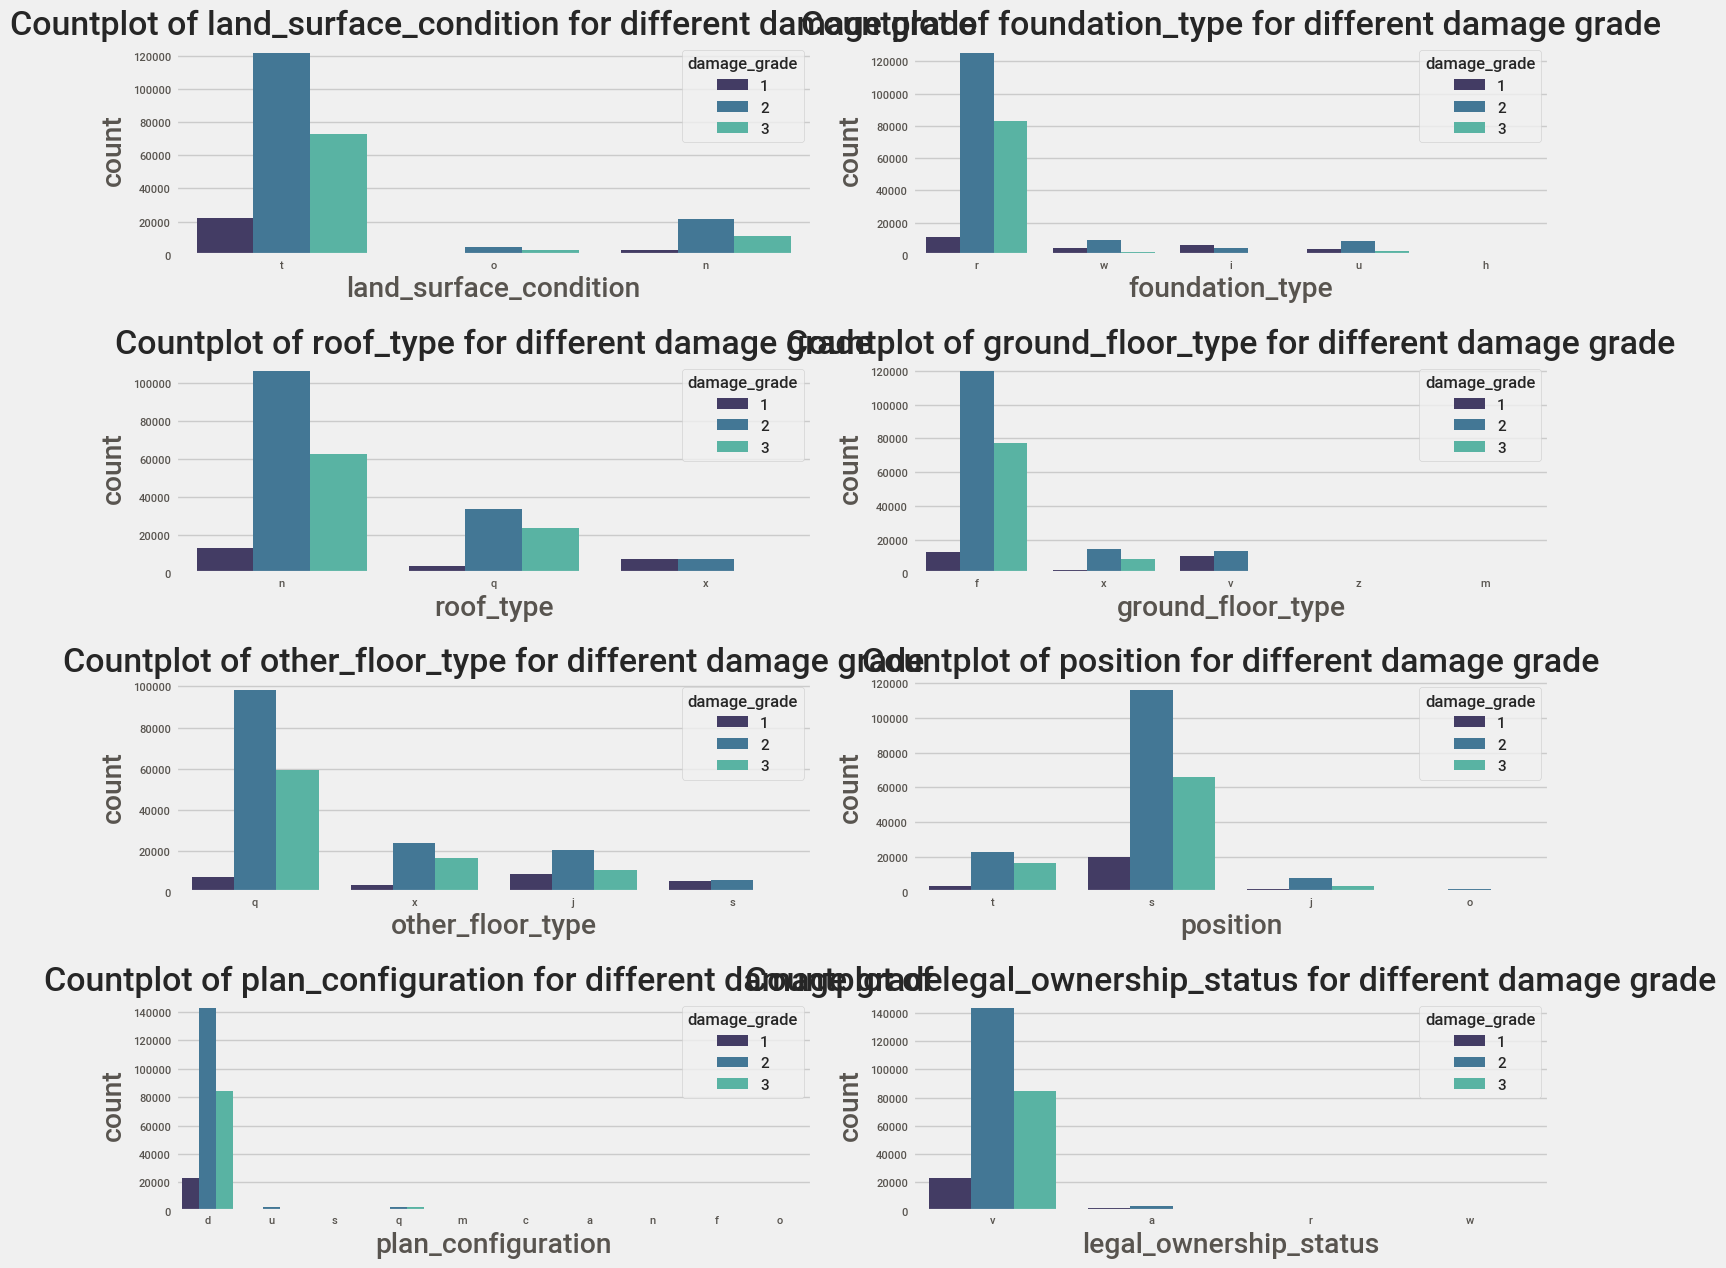

In [31]:
# Count plot with respect to damage grade
plt.figure(figsize=(15,13))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],hue=data['damage_grade'],palette="mako")
        plt.title(f'Countplot of {col} for different damage grade')
        pltnum +=1
plt.tight_layout()

#### Insights:
- The damage_grade is affected mostly to t(technical) of land_surface_condition, r(reinforced) of foundation_type , n(normal) of roof_type,f(fine aggregate concrete) of groud_floor_type,q of other_floor_type,s(secondary) position of position type,d of plan_configuration type,v(private owned)in legal_ownership_status.
- In all these damage level 2 has affected mostly by the buildings.

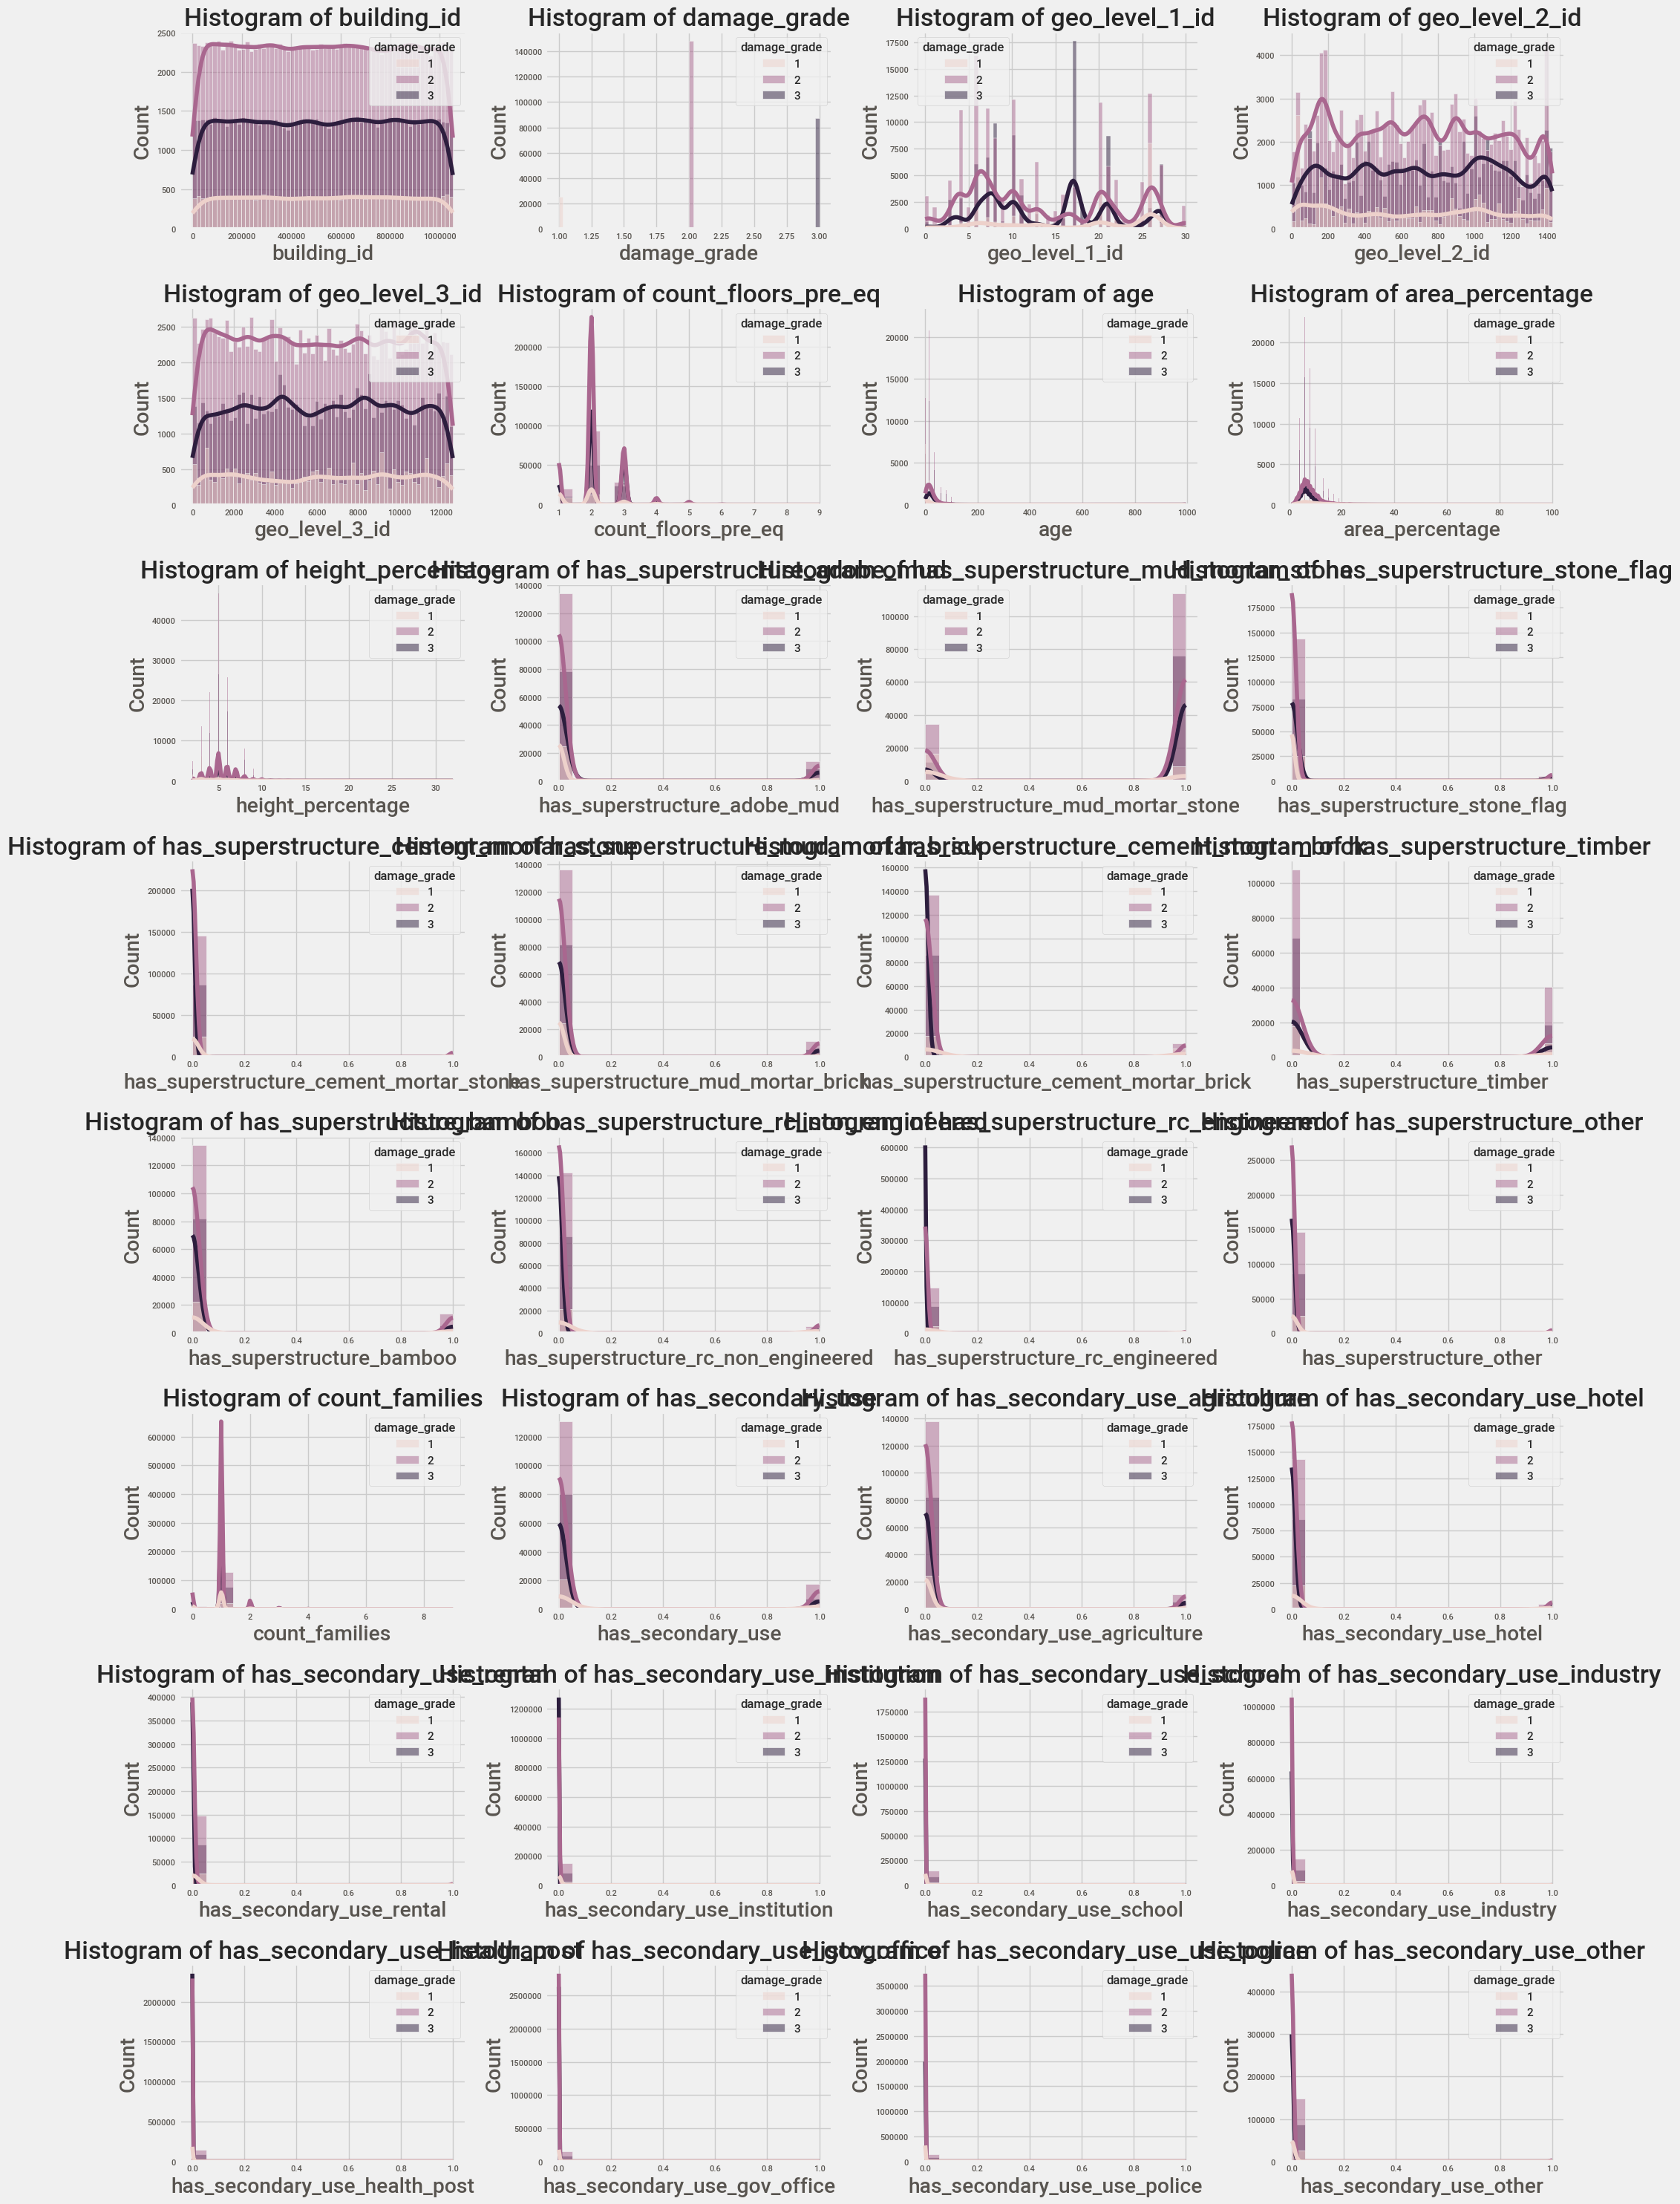

In [32]:
# Histogram plot with respect to damage grade of the buildings.
plt.figure(figsize=(20,30))
pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],hue=data['damage_grade'],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()
plt.show()

#### Insights:
* Buildings are more damaged by level 2 of damage_grade
* The damage_grade is more on buildings which is aged below 100 years,it has high positive skewness
* The buildings with 2 floor is damaged by level 2 damage,while the buildings with more than 2 floor is damaged by level 3 damage grade
* The buildings with area less than 20 units is affected mostly by earthqauke ,level 2 damage has occured to these buildings
* The biuldings with height 5 units is damaged more
* The buildings which was made without adobe/mud,stone,cement mortor-stone,non engineered concrete is affected mostly by level 2 damage grade
* The buildings which has used mud/motor stone has a damage grade more compared to the ones which has not used
* The buildings which has used engineerred concrete has less damage grade
* The buildings which has secondary use are damaged more

## Data Preprocessing

In [33]:
X = data.drop(columns=['damage_grade'])

In [34]:
num_col = X.select_dtypes(exclude="O").columns
cat_col = X.select_dtypes(include="O").columns

### Pipeline

In [35]:
# Outlier handling, scaling and frequency encoding

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('count_encode',CountEncoder()),
    ('scale', MinMaxScaler())

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline',num_pipeline,num_col),
        ('cat_pipeline',cat_pipeline,cat_col)
    ]
)

In [36]:
X = preprocessor.fit_transform(X)

In [37]:
X.shape

(260601, 39)

In [38]:
df = pd.DataFrame(X,columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other','land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'])

In [39]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0        0.762541       0.200000        0.341275        0.970637      
1        0.027377       0.266667        0.630694        0.223761      
2        0.090170       0.700000        0.254380        0.714013      
3        0.561175       0.733333        0.292922        0.850959      
4        0.191789       0.366667        0.091801        0.118405      
...             ...             ...             ...             ...   
260596   0.654015       0.833333        0.935529        0.128989      
260597   0.635827       0.566667        0.501051        0.163921      
260598   0.572220       0.566667        0.035739        0.649558      
260599   0.143794       0.866667        0.027330        0.147291      
260600   0.710009       0.700000        0.006307        0.724198      

        count_floors_pre_eq     age    area_percentage  height_percentage  \
0              0.125         0.030151     0.050505          0.100000        
1              0.125         0.010050     0.070707          0.166667        
2              0.125         0.010050     0.040404          0.100000        
3              0.125         0.010050     0.050505          0.100000        
4              0.250         0.030151     0.070707          0.233333        
...                     ...       ...              ...                ...   
260596         0.000         0.055276     0.050505          0.033333        
260597         0.125         0.000000     0.050505          0.100000        
260598         0.250         0.055276     0.050505          0.166667        
260599         0.125         0.010050     0.131313          0.133333        
260600         0.250         0.010050     0.060606          0.133333        

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                    1.0                              1.0                   
1                    0.0                              1.0                   
2                    0.0                              1.0                   
3                    0.0                              1.0                   
4                    1.0                              0.0                   
...                              ...                                  ...   
260596               0.0                              1.0                   
260597               0.0                              1.0                   
260598               0.0                              1.0                   
260599               0.0                              0.0                   
260600               0.0                              1.0                   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                    0.0                                 0.0                    
1                    0.0                                 0.0                    
2                    0.0                                 0.0                    
3                    0.0                                 0.0                    
4                    0.0                                 0.0                    
...                               ...                                     ...   
260596               0.0                                 0.0                    
260597               0.0                                 0.0                    
260598               0.0                                 0.0                    
260599               0.0                                 0.0                    
260600               0.0                                 0.0                    

        has_superstructure_mud_mortar_brick  \
0                       0.0                   
1                       0.0                   
2                       0.0                   
3                       0.0                   
4                       0.0                   
...                                     ...   
260

### Feature Selection

In [40]:
# dropping unwanted variables
data.drop('building_id', axis =1, inplace=True)

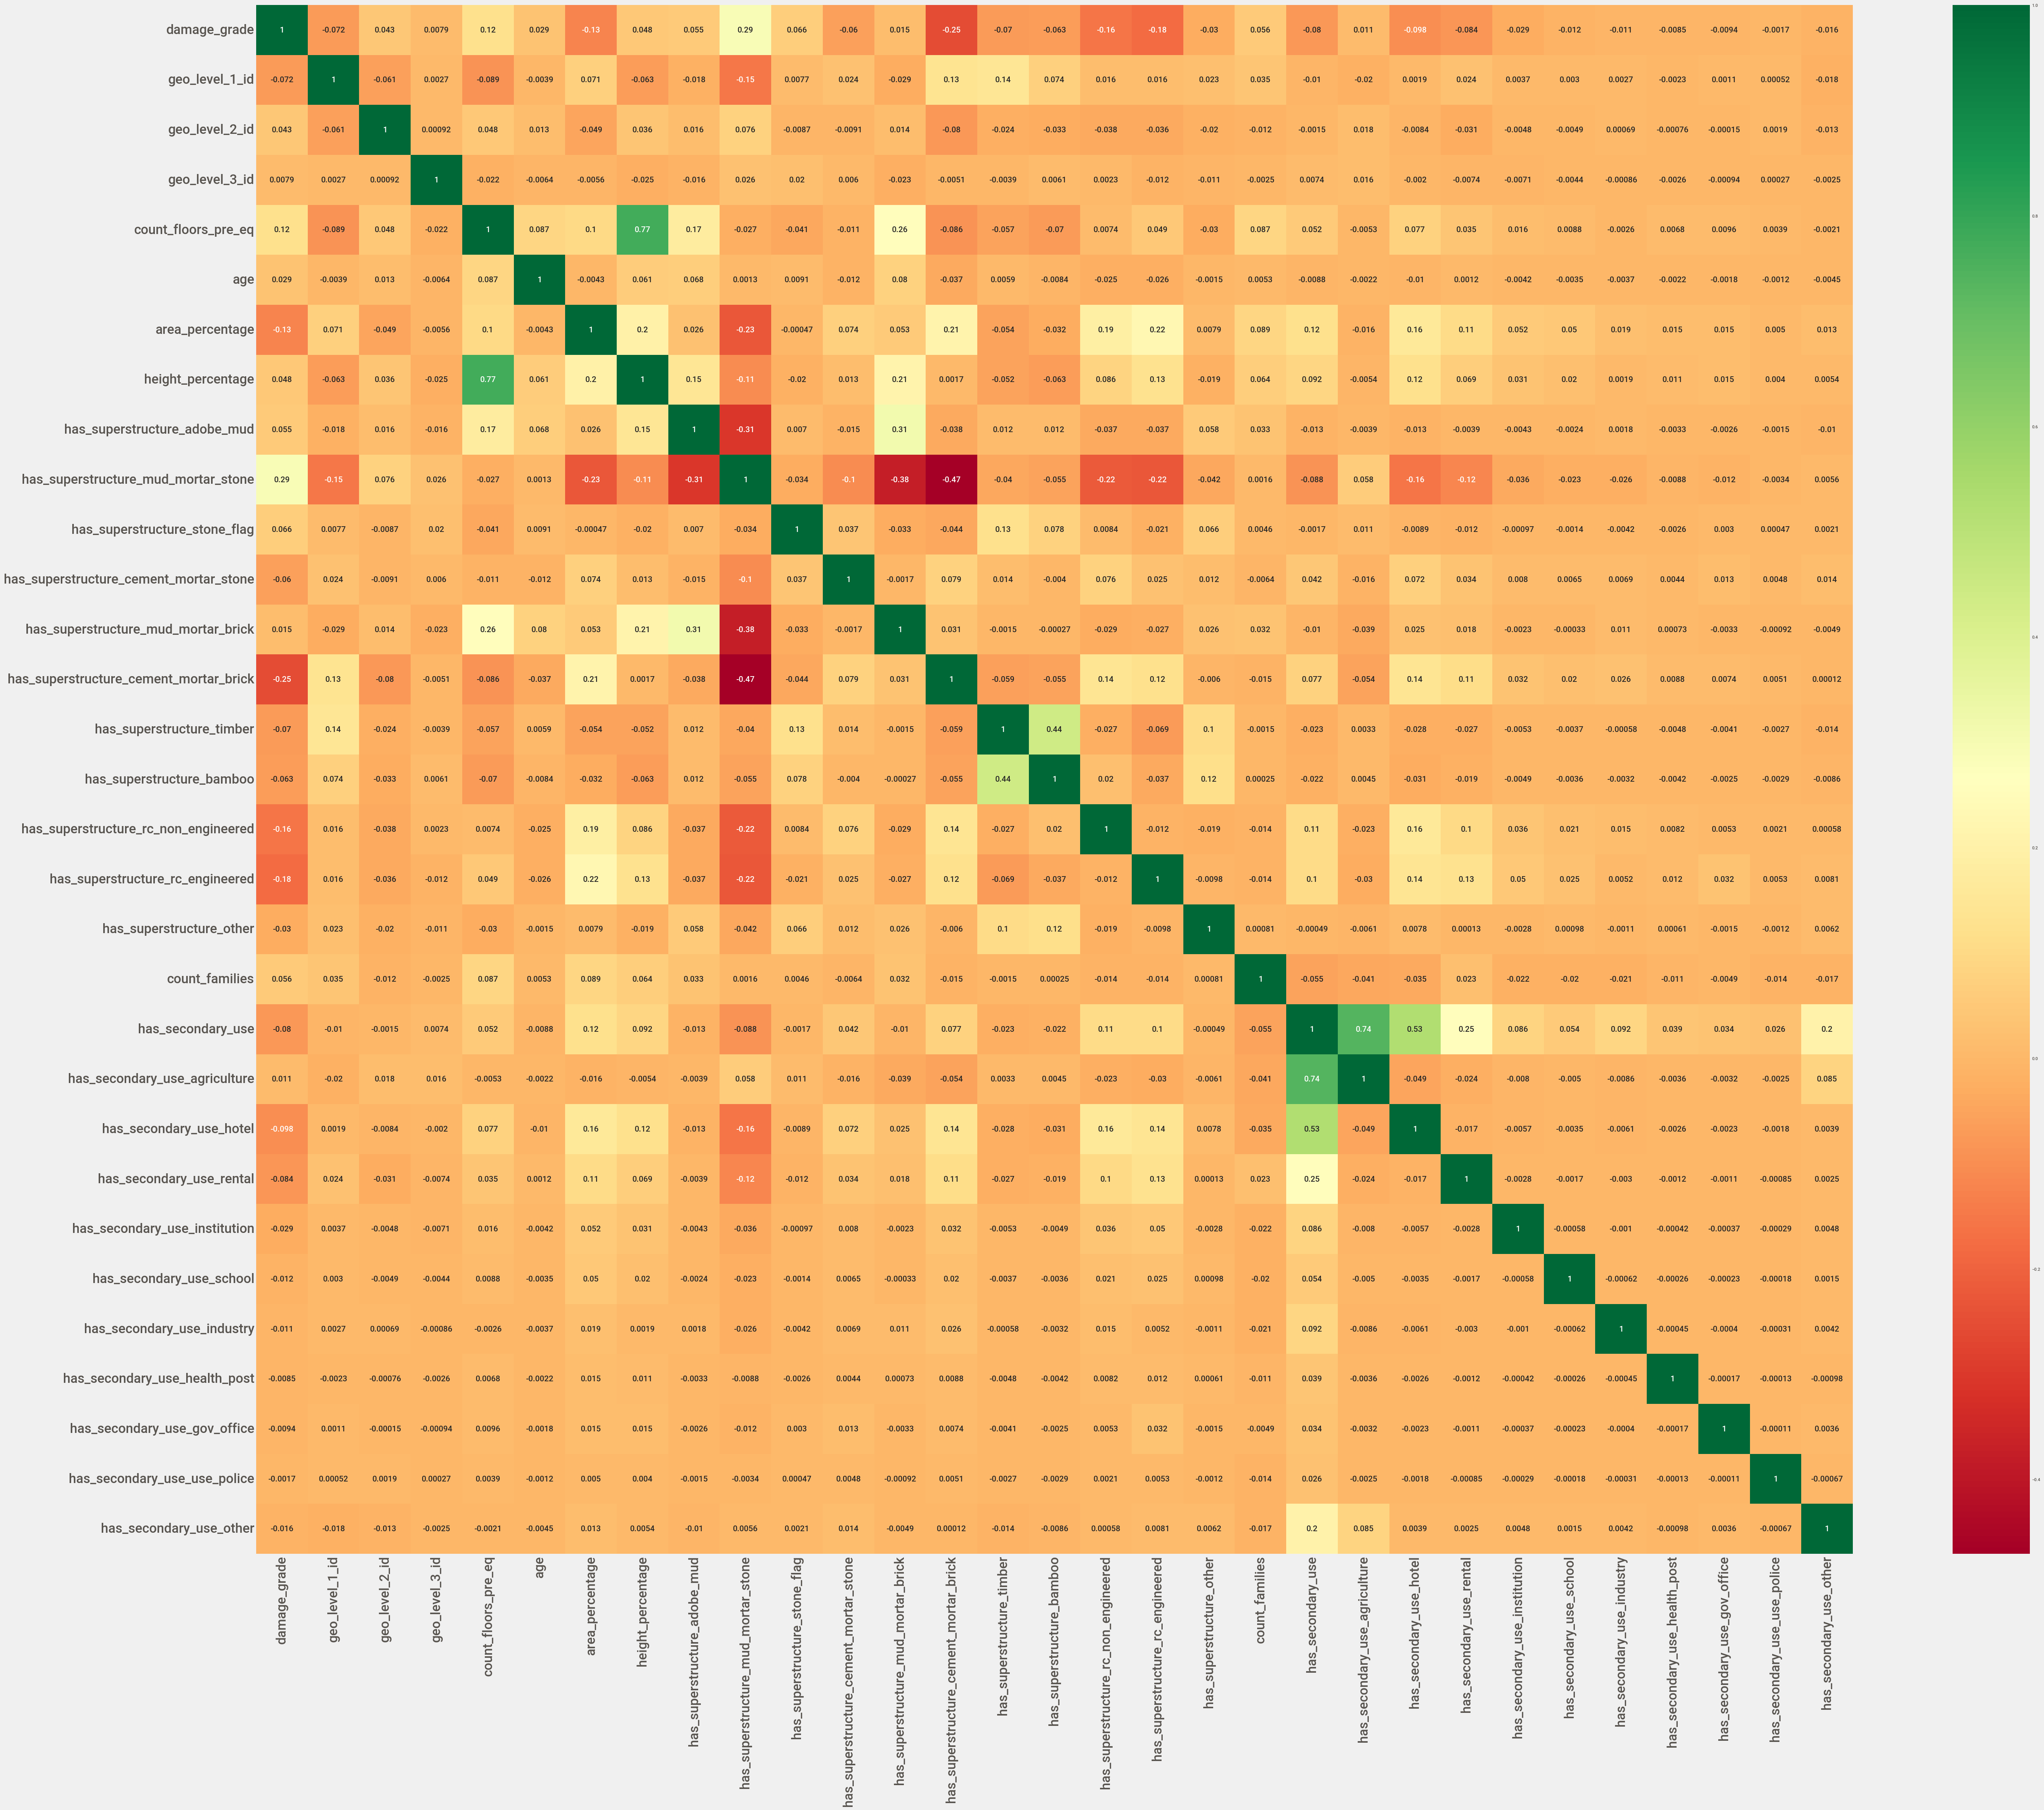

In [41]:
# plotting heat map to check for correlation between independent variables, correlation is done for only continuous data
plt.figure(figsize = (60,50))
heatmap = sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', annot_kws={'size':15})
heatmap.tick_params(axis='both', which='major', labelsize=25)

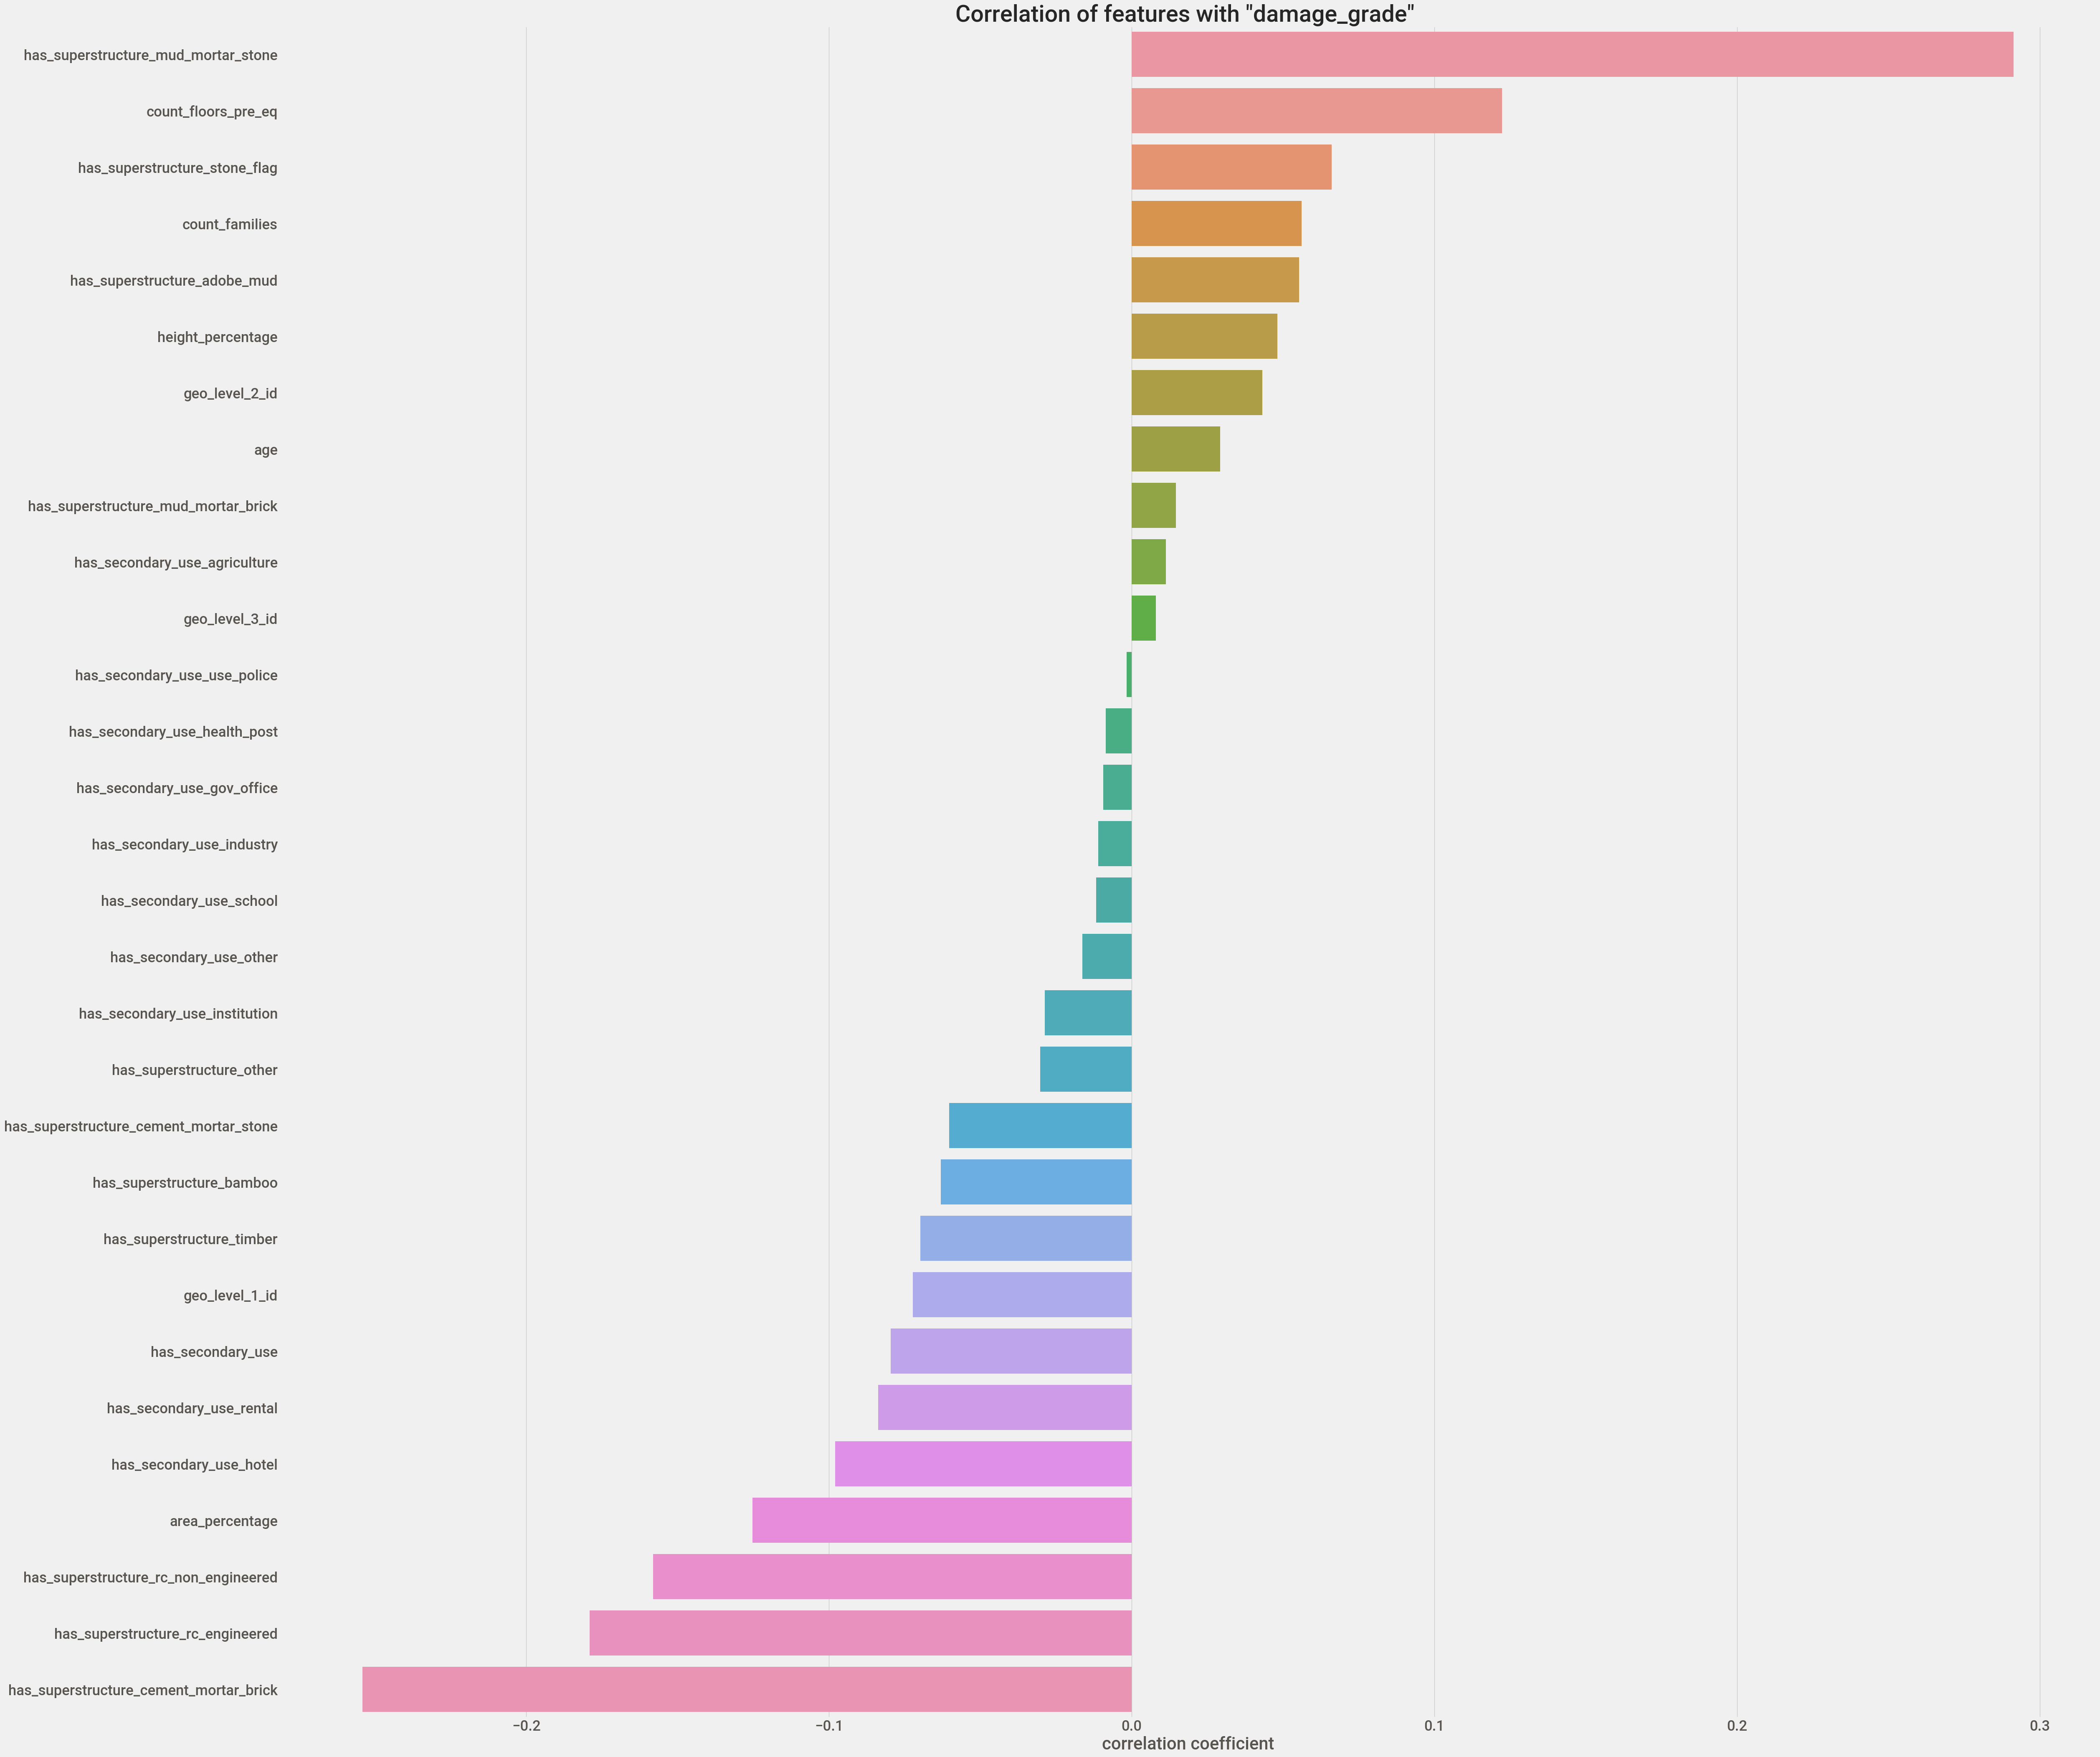

In [42]:
### checking how each independennt feature correlate with the target variable ('damage_grade')

plt.figure(figsize = (50,50))
limit=-1
datac = data.corr()['damage_grade'].sort_values(ascending = False)
indices = datac.index
labels = []
corr = []
for i in range(1,len(indices)):
    if datac[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(datac[i])
sns.barplot(x = corr,y = labels)
plt.title('Correlation of features with "damage_grade" ', fontsize = 40, fontweight = 'bold')
plt.xlabel('correlation coefficient', fontsize = 30, fontweight = 'bold')
plt.rcParams['font.size'] = 30
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

#### Checking feature importance

In [43]:
model = CatBoostClassifier()

model.fit(df, data.damage_grade)

feature_importance_catboost = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df_catboost = pd.DataFrame({
    'Feature':
    df.columns,
    'Importance':
    feature_importance_catboost
})

# Sort the DataFrame by importance in descending order
feature_importance_df_catboost = feature_importance_df_catboost.sort_values(
    by='Importance', ascending=False)

# Print or return the top features
print("Top Features - CatBoost:")
feature_importance_df_catboost = feature_importance_df_catboost.head(16)
feature_importance_df_catboost

Learning rate set to 0.105084
0:	learn: 1.0426749	total: 184ms	remaining: 3m 3s
1:	learn: 0.9975364	total: 234ms	remaining: 1m 56s
2:	learn: 0.9605911	total: 285ms	remaining: 1m 34s
3:	learn: 0.9297411	total: 336ms	remaining: 1m 23s
4:	learn: 0.9043619	total: 383ms	remaining: 1m 16s
5:	learn: 0.8819064	total: 431ms	remaining: 1m 11s
6:	learn: 0.8632312	total: 476ms	remaining: 1m 7s
7:	learn: 0.8481845	total: 518ms	remaining: 1m 4s
8:	learn: 0.8345457	total: 562ms	remaining: 1m 1s
9:	learn: 0.8222961	total: 606ms	remaining: 1m
10:	learn: 0.8111332	total: 651ms	remaining: 58.5s
11:	learn: 0.8018982	total: 694ms	remaining: 57.2s
12:	learn: 0.7935622	total: 741ms	remaining: 56.2s
13:	learn: 0.7866916	total: 783ms	remaining: 55.1s
14:	learn: 0.7802538	total: 827ms	remaining: 54.3s
15:	learn: 0.7755001	total: 872ms	remaining: 53.6s
16:	learn: 0.7702933	total: 920ms	remaining: 53.2s
17:	learn: 0.7649444	total: 965ms	remaining: 52.6s
18:	learn: 0.7607804	total: 1.01s	remaining: 52s
19:	learn: 

165:	learn: 0.6673615	total: 7.63s	remaining: 38.4s
166:	learn: 0.6671722	total: 7.68s	remaining: 38.3s
167:	learn: 0.6669525	total: 7.73s	remaining: 38.3s
168:	learn: 0.6666618	total: 7.77s	remaining: 38.2s
169:	learn: 0.6663867	total: 7.82s	remaining: 38.2s
170:	learn: 0.6661485	total: 7.87s	remaining: 38.1s
171:	learn: 0.6659393	total: 7.91s	remaining: 38.1s
172:	learn: 0.6657002	total: 7.96s	remaining: 38s
173:	learn: 0.6655571	total: 8s	remaining: 38s
174:	learn: 0.6653358	total: 8.04s	remaining: 37.9s
175:	learn: 0.6651396	total: 8.09s	remaining: 37.9s
176:	learn: 0.6649405	total: 8.13s	remaining: 37.8s
177:	learn: 0.6646557	total: 8.18s	remaining: 37.8s
178:	learn: 0.6645299	total: 8.23s	remaining: 37.7s
179:	learn: 0.6644099	total: 8.27s	remaining: 37.7s
180:	learn: 0.6642054	total: 8.32s	remaining: 37.7s
181:	learn: 0.6640899	total: 8.37s	remaining: 37.6s
182:	learn: 0.6638801	total: 8.42s	remaining: 37.6s
183:	learn: 0.6635591	total: 8.47s	remaining: 37.6s
184:	learn: 0.66346

325:	learn: 0.6426417	total: 14.8s	remaining: 30.7s
326:	learn: 0.6425633	total: 14.9s	remaining: 30.6s
327:	learn: 0.6423585	total: 14.9s	remaining: 30.6s
328:	learn: 0.6422275	total: 15s	remaining: 30.6s
329:	learn: 0.6421905	total: 15s	remaining: 30.5s
330:	learn: 0.6420791	total: 15.1s	remaining: 30.5s
331:	learn: 0.6420314	total: 15.1s	remaining: 30.4s
332:	learn: 0.6419265	total: 15.2s	remaining: 30.4s
333:	learn: 0.6418497	total: 15.2s	remaining: 30.3s
334:	learn: 0.6417863	total: 15.2s	remaining: 30.3s
335:	learn: 0.6416870	total: 15.3s	remaining: 30.2s
336:	learn: 0.6416219	total: 15.3s	remaining: 30.2s
337:	learn: 0.6415554	total: 15.4s	remaining: 30.1s
338:	learn: 0.6414455	total: 15.4s	remaining: 30.1s
339:	learn: 0.6413522	total: 15.5s	remaining: 30s
340:	learn: 0.6412411	total: 15.5s	remaining: 30s
341:	learn: 0.6411613	total: 15.6s	remaining: 29.9s
342:	learn: 0.6409873	total: 15.6s	remaining: 29.9s
343:	learn: 0.6408769	total: 15.7s	remaining: 29.9s
344:	learn: 0.640633

485:	learn: 0.6272832	total: 22.1s	remaining: 23.4s
486:	learn: 0.6272063	total: 22.2s	remaining: 23.4s
487:	learn: 0.6271280	total: 22.2s	remaining: 23.3s
488:	learn: 0.6270753	total: 22.3s	remaining: 23.3s
489:	learn: 0.6270205	total: 22.3s	remaining: 23.2s
490:	learn: 0.6269807	total: 22.3s	remaining: 23.2s
491:	learn: 0.6269257	total: 22.4s	remaining: 23.1s
492:	learn: 0.6268779	total: 22.4s	remaining: 23.1s
493:	learn: 0.6268178	total: 22.5s	remaining: 23s
494:	learn: 0.6266435	total: 22.5s	remaining: 23s
495:	learn: 0.6265918	total: 22.6s	remaining: 22.9s
496:	learn: 0.6265020	total: 22.6s	remaining: 22.9s
497:	learn: 0.6264589	total: 22.7s	remaining: 22.8s
498:	learn: 0.6263723	total: 22.7s	remaining: 22.8s
499:	learn: 0.6262787	total: 22.8s	remaining: 22.8s
500:	learn: 0.6261828	total: 22.8s	remaining: 22.7s
501:	learn: 0.6261623	total: 22.8s	remaining: 22.7s
502:	learn: 0.6261259	total: 22.9s	remaining: 22.6s
503:	learn: 0.6260709	total: 22.9s	remaining: 22.6s
504:	learn: 0.62

647:	learn: 0.6163178	total: 29.5s	remaining: 16s
648:	learn: 0.6162574	total: 29.5s	remaining: 16s
649:	learn: 0.6162020	total: 29.5s	remaining: 15.9s
650:	learn: 0.6161135	total: 29.6s	remaining: 15.9s
651:	learn: 0.6160678	total: 29.6s	remaining: 15.8s
652:	learn: 0.6159100	total: 29.7s	remaining: 15.8s
653:	learn: 0.6158563	total: 29.7s	remaining: 15.7s
654:	learn: 0.6157889	total: 29.8s	remaining: 15.7s
655:	learn: 0.6157525	total: 29.8s	remaining: 15.6s
656:	learn: 0.6157210	total: 29.9s	remaining: 15.6s
657:	learn: 0.6156596	total: 29.9s	remaining: 15.5s
658:	learn: 0.6155753	total: 30s	remaining: 15.5s
659:	learn: 0.6155182	total: 30s	remaining: 15.5s
660:	learn: 0.6154711	total: 30s	remaining: 15.4s
661:	learn: 0.6153988	total: 30.1s	remaining: 15.4s
662:	learn: 0.6153300	total: 30.1s	remaining: 15.3s
663:	learn: 0.6153088	total: 30.2s	remaining: 15.3s
664:	learn: 0.6152267	total: 30.2s	remaining: 15.2s
665:	learn: 0.6151840	total: 30.3s	remaining: 15.2s
666:	learn: 0.6151546	

807:	learn: 0.6075918	total: 36.6s	remaining: 8.7s
808:	learn: 0.6075180	total: 36.7s	remaining: 8.66s
809:	learn: 0.6074956	total: 36.7s	remaining: 8.61s
810:	learn: 0.6073639	total: 36.8s	remaining: 8.57s
811:	learn: 0.6073413	total: 36.8s	remaining: 8.52s
812:	learn: 0.6072987	total: 36.9s	remaining: 8.48s
813:	learn: 0.6072708	total: 36.9s	remaining: 8.43s
814:	learn: 0.6072417	total: 36.9s	remaining: 8.38s
815:	learn: 0.6071855	total: 37s	remaining: 8.34s
816:	learn: 0.6071340	total: 37s	remaining: 8.29s
817:	learn: 0.6070199	total: 37.1s	remaining: 8.25s
818:	learn: 0.6069821	total: 37.1s	remaining: 8.2s
819:	learn: 0.6069360	total: 37.2s	remaining: 8.16s
820:	learn: 0.6069090	total: 37.2s	remaining: 8.11s
821:	learn: 0.6068699	total: 37.2s	remaining: 8.06s
822:	learn: 0.6068315	total: 37.3s	remaining: 8.02s
823:	learn: 0.6068080	total: 37.3s	remaining: 7.97s
824:	learn: 0.6067566	total: 37.4s	remaining: 7.93s
825:	learn: 0.6066708	total: 37.4s	remaining: 7.88s
826:	learn: 0.6066

967:	learn: 0.5995119	total: 43.9s	remaining: 1.45s
968:	learn: 0.5994779	total: 44s	remaining: 1.41s
969:	learn: 0.5994561	total: 44s	remaining: 1.36s
970:	learn: 0.5993571	total: 44s	remaining: 1.31s
971:	learn: 0.5992860	total: 44.1s	remaining: 1.27s
972:	learn: 0.5992197	total: 44.1s	remaining: 1.22s
973:	learn: 0.5991633	total: 44.2s	remaining: 1.18s
974:	learn: 0.5991350	total: 44.2s	remaining: 1.13s
975:	learn: 0.5991079	total: 44.3s	remaining: 1.09s
976:	learn: 0.5990958	total: 44.3s	remaining: 1.04s
977:	learn: 0.5990707	total: 44.4s	remaining: 998ms
978:	learn: 0.5990412	total: 44.4s	remaining: 952ms
979:	learn: 0.5989862	total: 44.4s	remaining: 907ms
980:	learn: 0.5989350	total: 44.5s	remaining: 862ms
981:	learn: 0.5989009	total: 44.5s	remaining: 816ms
982:	learn: 0.5988426	total: 44.6s	remaining: 771ms
983:	learn: 0.5988021	total: 44.6s	remaining: 726ms
984:	learn: 0.5987422	total: 44.7s	remaining: 680ms
985:	learn: 0.5987011	total: 44.7s	remaining: 635ms
986:	learn: 0.5986

Feature                  Importance
1                           geo_level_1_id   43.339947
2                           geo_level_2_id   15.464393
3                           geo_level_3_id    4.885660
32                         foundation_type    3.999813
5                                      age    3.862410
9      has_superstructure_mud_mortar_stone    3.591616
35                        other_floor_type    2.562591
34                       ground_floor_type    2.524384
4                      count_floors_pre_eq    2.135636
7                        height_percentage    2.045902
6                          area_percentage    1.986807
33                               roof_type    1.891953
14               has_superstructure_timber    1.851640
13  has_superstructure_cement_mortar_brick    1.138036
8             has_superstructure_adobe_mud    1.034329
10           has_superstructure_stone_flag    1.024317

## Model Creation

In [44]:
selected_feature_names = feature_importance_df_catboost['Feature'].to_list()

In [74]:
X = df[selected_feature_names]
y = data['damage_grade']

#### Note:
- As the data is imbalanced, the training data is balanced using SMOTE

In [75]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 148259, 3: 87218, 1: 25124})


In [76]:
sm = SMOTE(sampling_strategy='all',random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X,y)
print('Original dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({3: 148259, 2: 148259, 1: 148259})


In [77]:
X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,y_train_resampled,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((311343, 16), (133434, 16))

In [49]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted,average='weighted')
    precision = precision_score(true,predicted,average='weighted')
    recall = recall_score(true,predicted,average='weighted')
    return accuracy,f1,precision, recall

In [50]:
params={
        "Decision Tree": {
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "Random Forest":{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20, 30], 
            'min_samples_split': [2, 5, 10]
        },
        "Logistic Regression":{
            'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'penalty': ['l1', 'l2']
        },
        "KNN":{
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance'],
            'algorithm':['ball_tree','kd_tree','brute']
        },
        "GradientBoost":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
        },
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        },
        "CatBoostClassifier":{
            'iterations': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'depth': [4, 6, 8]
        },
        "AdaBoost":{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "LightGBMClassifier":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
           },
        "MLPClassifier" : {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01]
        }

}

In [78]:
model_results = {}
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_mapped = np.vectorize(class_mapping.get)(y_train)
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_test))}
y_test_mapped = np.vectorize(class_mapping.get)(y_test)
def run_model(model_name, model):
    '''
    Function to run the model and return the results
    '''
    model.fit(X_train, y_train_mapped)  # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Map class labels for test set if needed
    y_test_mapped = np.vectorize(class_mapping.get)(y_test)
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(
        y_train_mapped, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(
        y_test_mapped, y_test_pred)
    cross_val_mean = cross_val_score(model,
                                     X_train,
                                     y_train_mapped,
                                     cv=5,
                                     scoring='f1_weighted').mean()
    cross_val_std = cross_val_score(model,
                                    X_train,
                                    y_train_mapped,
                                    cv=5,
                                    scoring='f1_weighted').std()
    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1_score : {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))
    print('----------------------------------')
    print("Crossvalidate Score(mean): {:.4f}".format(cross_val_mean))
    print("Crossvalidate Std: {:.4f}".format(cross_val_std))

    model_results[model_name] = {
        'accuracy_train': model_train_accuracy,
        'accuracy_test': model_test_accuracy,
        'f1_train': model_train_f1,
        'f1_test': model_test_f1
    }
    print('=' * 35)

In [82]:
def hyper_tuning(model_name,model):
        '''
        Function to do hyperparameter tuning
        '''
        para = params[model_name]
        gs = RandomizedSearchCV(model,para,cv=5,scoring='f1_weighted',n_jobs=-1)
        gs.fit(X_train,y_train)
        model.set_params(**gs.best_params_)
        run_model(model_name,model)

In [71]:
hyper_tuning('Decision Tree',DecisionTreeClassifier())

KeyboardInterrupt: 

In [54]:
hyper_tuning('Logistic Regression',LogisticRegression())

Logistic Regression
Model performance for Training set
- Accuracy : 0.5652
- F1_score : 0.5555
- Precision Score: 0.5680
- Recall Score: 0.5652
----------------------------------
Model performance for Test set
- Accuracy: 0.5633
- F1_score: 0.5536
- Precision Score: 0.5664
- Recall Score: 0.5633
----------------------------------
Crossvalidate Score(mean): 0.5559
Crossvalidate Std: 0.0015


In [55]:
run_model('KNN',KNeighborsClassifier())

KNN
Model performance for Training set
- Accuracy : 0.8383
- F1_score : 0.8346
- Precision Score: 0.8371
- Recall Score: 0.8383
----------------------------------
Model performance for Test set
- Accuracy: 0.7693
- F1_score: 0.7628
- Precision Score: 0.7640
- Recall Score: 0.7693
----------------------------------
Crossvalidate Score(mean): 0.7480
Crossvalidate Std: 0.0012


In [56]:
run_model('XGBClassifier',XGBClassifier())

XGBClassifier
Model performance for Training set
- Accuracy : 0.8154
- F1_score : 0.8159
- Precision Score: 0.8203
- Recall Score: 0.8154
----------------------------------
Model performance for Test set
- Accuracy: 0.8046
- F1_score: 0.8051
- Precision Score: 0.8092
- Recall Score: 0.8046
----------------------------------
Crossvalidate Score(mean): 0.8036
Crossvalidate Std: 0.0016


In [57]:
run_model('Random Forest',RandomForestClassifier())

Random Forest
Model performance for Training set
- Accuracy : 0.9852
- F1_score : 0.9851
- Precision Score: 0.9851
- Recall Score: 0.9852
----------------------------------
Model performance for Test set
- Accuracy: 0.8216
- F1_score: 0.8213
- Precision Score: 0.8216
- Recall Score: 0.8216
----------------------------------
Crossvalidate Score(mean): 0.8146
Crossvalidate Std: 0.0006


In [58]:
run_model('CatBoostClassifier',CatBoostClassifier())

Learning rate set to 0.106042
0:	learn: 1.0484989	total: 68.4ms	remaining: 1m 8s
1:	learn: 1.0100157	total: 131ms	remaining: 1m 5s
2:	learn: 0.9792983	total: 189ms	remaining: 1m 2s
3:	learn: 0.9513561	total: 249ms	remaining: 1m 2s
4:	learn: 0.9290055	total: 311ms	remaining: 1m 1s
5:	learn: 0.9098212	total: 372ms	remaining: 1m 1s
6:	learn: 0.8929183	total: 433ms	remaining: 1m 1s
7:	learn: 0.8767966	total: 493ms	remaining: 1m 1s
8:	learn: 0.8619625	total: 561ms	remaining: 1m 1s
9:	learn: 0.8487483	total: 618ms	remaining: 1m 1s
10:	learn: 0.8370976	total: 683ms	remaining: 1m 1s
11:	learn: 0.8259620	total: 745ms	remaining: 1m 1s
12:	learn: 0.8163062	total: 802ms	remaining: 1m
13:	learn: 0.8070109	total: 865ms	remaining: 1m
14:	learn: 0.7997489	total: 926ms	remaining: 1m
15:	learn: 0.7912825	total: 990ms	remaining: 1m
16:	learn: 0.7845745	total: 1.05s	remaining: 1m
17:	learn: 0.7758170	total: 1.11s	remaining: 1m
18:	learn: 0.7704792	total: 1.17s	remaining: 1m
19:	learn: 0.7646399	total: 1.2

164:	learn: 0.5529424	total: 9.82s	remaining: 49.7s
165:	learn: 0.5526399	total: 9.88s	remaining: 49.6s
166:	learn: 0.5520611	total: 9.93s	remaining: 49.5s
167:	learn: 0.5516010	total: 9.99s	remaining: 49.5s
168:	learn: 0.5505896	total: 10.1s	remaining: 49.5s
169:	learn: 0.5503093	total: 10.1s	remaining: 49.4s
170:	learn: 0.5494763	total: 10.2s	remaining: 49.4s
171:	learn: 0.5490793	total: 10.2s	remaining: 49.3s
172:	learn: 0.5485309	total: 10.3s	remaining: 49.3s
173:	learn: 0.5483250	total: 10.4s	remaining: 49.2s
174:	learn: 0.5480310	total: 10.4s	remaining: 49.2s
175:	learn: 0.5476033	total: 10.5s	remaining: 49.1s
176:	learn: 0.5473743	total: 10.5s	remaining: 49s
177:	learn: 0.5471512	total: 10.6s	remaining: 48.9s
178:	learn: 0.5463546	total: 10.6s	remaining: 48.8s
179:	learn: 0.5459576	total: 10.7s	remaining: 48.8s
180:	learn: 0.5455883	total: 10.8s	remaining: 48.7s
181:	learn: 0.5448976	total: 10.8s	remaining: 48.7s
182:	learn: 0.5443184	total: 10.9s	remaining: 48.6s
183:	learn: 0.

324:	learn: 0.5059008	total: 19.2s	remaining: 39.8s
325:	learn: 0.5056895	total: 19.2s	remaining: 39.7s
326:	learn: 0.5055472	total: 19.3s	remaining: 39.7s
327:	learn: 0.5053507	total: 19.3s	remaining: 39.6s
328:	learn: 0.5051526	total: 19.4s	remaining: 39.6s
329:	learn: 0.5049007	total: 19.5s	remaining: 39.5s
330:	learn: 0.5046829	total: 19.5s	remaining: 39.5s
331:	learn: 0.5044972	total: 19.6s	remaining: 39.4s
332:	learn: 0.5042504	total: 19.6s	remaining: 39.3s
333:	learn: 0.5040192	total: 19.7s	remaining: 39.3s
334:	learn: 0.5038568	total: 19.8s	remaining: 39.2s
335:	learn: 0.5037066	total: 19.8s	remaining: 39.2s
336:	learn: 0.5035147	total: 19.9s	remaining: 39.1s
337:	learn: 0.5033543	total: 19.9s	remaining: 39s
338:	learn: 0.5031620	total: 20s	remaining: 39s
339:	learn: 0.5030220	total: 20s	remaining: 38.9s
340:	learn: 0.5028228	total: 20.1s	remaining: 38.8s
341:	learn: 0.5027056	total: 20.1s	remaining: 38.8s
342:	learn: 0.5025898	total: 20.2s	remaining: 38.7s
343:	learn: 0.502485

484:	learn: 0.4843580	total: 28.5s	remaining: 30.2s
485:	learn: 0.4842744	total: 28.5s	remaining: 30.2s
486:	learn: 0.4841386	total: 28.6s	remaining: 30.1s
487:	learn: 0.4840178	total: 28.6s	remaining: 30s
488:	learn: 0.4839010	total: 28.7s	remaining: 30s
489:	learn: 0.4838522	total: 28.7s	remaining: 29.9s
490:	learn: 0.4837240	total: 28.8s	remaining: 29.9s
491:	learn: 0.4835640	total: 28.9s	remaining: 29.8s
492:	learn: 0.4834139	total: 28.9s	remaining: 29.8s
493:	learn: 0.4832867	total: 29s	remaining: 29.7s
494:	learn: 0.4832347	total: 29s	remaining: 29.6s
495:	learn: 0.4831127	total: 29.1s	remaining: 29.6s
496:	learn: 0.4830339	total: 29.2s	remaining: 29.5s
497:	learn: 0.4829759	total: 29.2s	remaining: 29.4s
498:	learn: 0.4828747	total: 29.3s	remaining: 29.4s
499:	learn: 0.4826979	total: 29.3s	remaining: 29.3s
500:	learn: 0.4826177	total: 29.4s	remaining: 29.3s
501:	learn: 0.4824648	total: 29.4s	remaining: 29.2s
502:	learn: 0.4823922	total: 29.5s	remaining: 29.1s
503:	learn: 0.482156

644:	learn: 0.4693949	total: 37.8s	remaining: 20.8s
645:	learn: 0.4693057	total: 37.8s	remaining: 20.7s
646:	learn: 0.4692329	total: 37.9s	remaining: 20.7s
647:	learn: 0.4691086	total: 38s	remaining: 20.6s
648:	learn: 0.4690698	total: 38s	remaining: 20.6s
649:	learn: 0.4690175	total: 38.1s	remaining: 20.5s
650:	learn: 0.4689298	total: 38.1s	remaining: 20.4s
651:	learn: 0.4688753	total: 38.2s	remaining: 20.4s
652:	learn: 0.4688354	total: 38.2s	remaining: 20.3s
653:	learn: 0.4687378	total: 38.3s	remaining: 20.3s
654:	learn: 0.4686451	total: 38.3s	remaining: 20.2s
655:	learn: 0.4685756	total: 38.4s	remaining: 20.1s
656:	learn: 0.4685430	total: 38.4s	remaining: 20.1s
657:	learn: 0.4684795	total: 38.5s	remaining: 20s
658:	learn: 0.4684228	total: 38.5s	remaining: 19.9s
659:	learn: 0.4682923	total: 38.6s	remaining: 19.9s
660:	learn: 0.4682499	total: 38.6s	remaining: 19.8s
661:	learn: 0.4682003	total: 38.7s	remaining: 19.8s
662:	learn: 0.4681347	total: 38.8s	remaining: 19.7s
663:	learn: 0.4680

804:	learn: 0.4584750	total: 47s	remaining: 11.4s
805:	learn: 0.4584183	total: 47s	remaining: 11.3s
806:	learn: 0.4583878	total: 47.1s	remaining: 11.3s
807:	learn: 0.4583200	total: 47.1s	remaining: 11.2s
808:	learn: 0.4582834	total: 47.2s	remaining: 11.1s
809:	learn: 0.4581320	total: 47.2s	remaining: 11.1s
810:	learn: 0.4581084	total: 47.3s	remaining: 11s
811:	learn: 0.4580733	total: 47.3s	remaining: 11s
812:	learn: 0.4580458	total: 47.4s	remaining: 10.9s
813:	learn: 0.4579570	total: 47.5s	remaining: 10.8s
814:	learn: 0.4579317	total: 47.5s	remaining: 10.8s
815:	learn: 0.4578258	total: 47.6s	remaining: 10.7s
816:	learn: 0.4577253	total: 47.6s	remaining: 10.7s
817:	learn: 0.4576901	total: 47.7s	remaining: 10.6s
818:	learn: 0.4576443	total: 47.7s	remaining: 10.6s
819:	learn: 0.4575803	total: 47.8s	remaining: 10.5s
820:	learn: 0.4574591	total: 47.9s	remaining: 10.4s
821:	learn: 0.4573726	total: 47.9s	remaining: 10.4s
822:	learn: 0.4573343	total: 48s	remaining: 10.3s
823:	learn: 0.4572984	

965:	learn: 0.4490339	total: 56.5s	remaining: 1.99s
966:	learn: 0.4489103	total: 56.5s	remaining: 1.93s
967:	learn: 0.4488621	total: 56.6s	remaining: 1.87s
968:	learn: 0.4488217	total: 56.6s	remaining: 1.81s
969:	learn: 0.4488056	total: 56.7s	remaining: 1.75s
970:	learn: 0.4487666	total: 56.8s	remaining: 1.7s
971:	learn: 0.4487189	total: 56.8s	remaining: 1.64s
972:	learn: 0.4486954	total: 56.9s	remaining: 1.58s
973:	learn: 0.4486306	total: 56.9s	remaining: 1.52s
974:	learn: 0.4485462	total: 57s	remaining: 1.46s
975:	learn: 0.4484770	total: 57.1s	remaining: 1.4s
976:	learn: 0.4484347	total: 57.1s	remaining: 1.34s
977:	learn: 0.4483833	total: 57.2s	remaining: 1.28s
978:	learn: 0.4483184	total: 57.2s	remaining: 1.23s
979:	learn: 0.4482483	total: 57.3s	remaining: 1.17s
980:	learn: 0.4481950	total: 57.3s	remaining: 1.11s
981:	learn: 0.4481110	total: 57.4s	remaining: 1.05s
982:	learn: 0.4480359	total: 57.5s	remaining: 994ms
983:	learn: 0.4479358	total: 57.5s	remaining: 936ms
984:	learn: 0.44

128:	learn: 0.5764837	total: 6.16s	remaining: 41.6s
129:	learn: 0.5759309	total: 6.21s	remaining: 41.6s
130:	learn: 0.5755003	total: 6.26s	remaining: 41.6s
131:	learn: 0.5750681	total: 6.31s	remaining: 41.5s
132:	learn: 0.5746638	total: 6.35s	remaining: 41.4s
133:	learn: 0.5739885	total: 6.4s	remaining: 41.4s
134:	learn: 0.5734124	total: 6.45s	remaining: 41.3s
135:	learn: 0.5724053	total: 6.49s	remaining: 41.2s
136:	learn: 0.5712858	total: 6.54s	remaining: 41.2s
137:	learn: 0.5706335	total: 6.58s	remaining: 41.1s
138:	learn: 0.5692757	total: 6.64s	remaining: 41.1s
139:	learn: 0.5689890	total: 6.69s	remaining: 41.1s
140:	learn: 0.5681403	total: 6.74s	remaining: 41.1s
141:	learn: 0.5670904	total: 6.79s	remaining: 41s
142:	learn: 0.5659482	total: 6.83s	remaining: 40.9s
143:	learn: 0.5651490	total: 6.87s	remaining: 40.9s
144:	learn: 0.5644903	total: 6.92s	remaining: 40.8s
145:	learn: 0.5635841	total: 6.96s	remaining: 40.7s
146:	learn: 0.5631796	total: 7.01s	remaining: 40.7s
147:	learn: 0.5

288:	learn: 0.5143807	total: 13.7s	remaining: 33.8s
289:	learn: 0.5142478	total: 13.8s	remaining: 33.7s
290:	learn: 0.5139980	total: 13.8s	remaining: 33.7s
291:	learn: 0.5136905	total: 13.9s	remaining: 33.6s
292:	learn: 0.5135267	total: 13.9s	remaining: 33.6s
293:	learn: 0.5133691	total: 14s	remaining: 33.5s
294:	learn: 0.5131687	total: 14s	remaining: 33.5s
295:	learn: 0.5129448	total: 14.1s	remaining: 33.4s
296:	learn: 0.5126689	total: 14.1s	remaining: 33.4s
297:	learn: 0.5125399	total: 14.2s	remaining: 33.3s
298:	learn: 0.5123636	total: 14.2s	remaining: 33.3s
299:	learn: 0.5120745	total: 14.3s	remaining: 33.3s
300:	learn: 0.5119357	total: 14.3s	remaining: 33.2s
301:	learn: 0.5117167	total: 14.3s	remaining: 33.1s
302:	learn: 0.5114453	total: 14.4s	remaining: 33.1s
303:	learn: 0.5112955	total: 14.4s	remaining: 33.1s
304:	learn: 0.5111259	total: 14.5s	remaining: 33s
305:	learn: 0.5109733	total: 14.5s	remaining: 33s
306:	learn: 0.5108230	total: 14.6s	remaining: 32.9s
307:	learn: 0.510587

451:	learn: 0.4883962	total: 21.5s	remaining: 26s
452:	learn: 0.4882942	total: 21.5s	remaining: 26s
453:	learn: 0.4881990	total: 21.6s	remaining: 25.9s
454:	learn: 0.4880939	total: 21.6s	remaining: 25.9s
455:	learn: 0.4879645	total: 21.7s	remaining: 25.8s
456:	learn: 0.4878823	total: 21.7s	remaining: 25.8s
457:	learn: 0.4878070	total: 21.7s	remaining: 25.7s
458:	learn: 0.4876348	total: 21.8s	remaining: 25.7s
459:	learn: 0.4875573	total: 21.8s	remaining: 25.6s
460:	learn: 0.4874101	total: 21.9s	remaining: 25.6s
461:	learn: 0.4872224	total: 22s	remaining: 25.6s
462:	learn: 0.4870653	total: 22.1s	remaining: 25.6s
463:	learn: 0.4869390	total: 22.1s	remaining: 25.5s
464:	learn: 0.4867502	total: 22.2s	remaining: 25.5s
465:	learn: 0.4865695	total: 22.3s	remaining: 25.5s
466:	learn: 0.4864020	total: 22.3s	remaining: 25.5s
467:	learn: 0.4863113	total: 22.4s	remaining: 25.4s
468:	learn: 0.4862005	total: 22.4s	remaining: 25.4s
469:	learn: 0.4859803	total: 22.5s	remaining: 25.3s
470:	learn: 0.4859

613:	learn: 0.4721131	total: 29.2s	remaining: 18.4s
614:	learn: 0.4720510	total: 29.3s	remaining: 18.3s
615:	learn: 0.4719760	total: 29.3s	remaining: 18.3s
616:	learn: 0.4718528	total: 29.4s	remaining: 18.2s
617:	learn: 0.4718133	total: 29.4s	remaining: 18.2s
618:	learn: 0.4716833	total: 29.5s	remaining: 18.1s
619:	learn: 0.4716225	total: 29.5s	remaining: 18.1s
620:	learn: 0.4715588	total: 29.6s	remaining: 18s
621:	learn: 0.4714250	total: 29.6s	remaining: 18s
622:	learn: 0.4713792	total: 29.6s	remaining: 17.9s
623:	learn: 0.4712782	total: 29.7s	remaining: 17.9s
624:	learn: 0.4711478	total: 29.7s	remaining: 17.8s
625:	learn: 0.4710508	total: 29.8s	remaining: 17.8s
626:	learn: 0.4709932	total: 29.8s	remaining: 17.7s
627:	learn: 0.4709464	total: 29.9s	remaining: 17.7s
628:	learn: 0.4708872	total: 29.9s	remaining: 17.7s
629:	learn: 0.4708071	total: 30s	remaining: 17.6s
630:	learn: 0.4707230	total: 30s	remaining: 17.6s
631:	learn: 0.4706827	total: 30.1s	remaining: 17.5s
632:	learn: 0.470625

776:	learn: 0.4600582	total: 37s	remaining: 10.6s
777:	learn: 0.4599821	total: 37s	remaining: 10.6s
778:	learn: 0.4599121	total: 37.1s	remaining: 10.5s
779:	learn: 0.4598349	total: 37.1s	remaining: 10.5s
780:	learn: 0.4597794	total: 37.2s	remaining: 10.4s
781:	learn: 0.4597420	total: 37.2s	remaining: 10.4s
782:	learn: 0.4596453	total: 37.3s	remaining: 10.3s
783:	learn: 0.4595538	total: 37.3s	remaining: 10.3s
784:	learn: 0.4595074	total: 37.4s	remaining: 10.2s
785:	learn: 0.4594498	total: 37.4s	remaining: 10.2s
786:	learn: 0.4593436	total: 37.4s	remaining: 10.1s
787:	learn: 0.4592987	total: 37.5s	remaining: 10.1s
788:	learn: 0.4592510	total: 37.5s	remaining: 10s
789:	learn: 0.4591623	total: 37.6s	remaining: 9.99s
790:	learn: 0.4590982	total: 37.6s	remaining: 9.94s
791:	learn: 0.4590572	total: 37.7s	remaining: 9.89s
792:	learn: 0.4590228	total: 37.7s	remaining: 9.84s
793:	learn: 0.4589539	total: 37.8s	remaining: 9.8s
794:	learn: 0.4588435	total: 37.8s	remaining: 9.75s
795:	learn: 0.45879

939:	learn: 0.4501240	total: 44.6s	remaining: 2.85s
940:	learn: 0.4500797	total: 44.7s	remaining: 2.8s
941:	learn: 0.4500367	total: 44.7s	remaining: 2.75s
942:	learn: 0.4499821	total: 44.8s	remaining: 2.71s
943:	learn: 0.4499389	total: 44.8s	remaining: 2.66s
944:	learn: 0.4498770	total: 44.9s	remaining: 2.61s
945:	learn: 0.4498334	total: 45s	remaining: 2.57s
946:	learn: 0.4498138	total: 45s	remaining: 2.52s
947:	learn: 0.4497214	total: 45.1s	remaining: 2.47s
948:	learn: 0.4496874	total: 45.1s	remaining: 2.42s
949:	learn: 0.4496123	total: 45.2s	remaining: 2.38s
950:	learn: 0.4495626	total: 45.2s	remaining: 2.33s
951:	learn: 0.4495395	total: 45.2s	remaining: 2.28s
952:	learn: 0.4494971	total: 45.3s	remaining: 2.23s
953:	learn: 0.4494569	total: 45.3s	remaining: 2.19s
954:	learn: 0.4494174	total: 45.4s	remaining: 2.14s
955:	learn: 0.4493730	total: 45.4s	remaining: 2.09s
956:	learn: 0.4493175	total: 45.5s	remaining: 2.04s
957:	learn: 0.4492679	total: 45.5s	remaining: 2s
958:	learn: 0.449221

100:	learn: 0.6002882	total: 4.56s	remaining: 40.6s
101:	learn: 0.5995318	total: 4.61s	remaining: 40.5s
102:	learn: 0.5990915	total: 4.65s	remaining: 40.5s
103:	learn: 0.5987030	total: 4.7s	remaining: 40.5s
104:	learn: 0.5973343	total: 4.75s	remaining: 40.5s
105:	learn: 0.5969965	total: 4.8s	remaining: 40.5s
106:	learn: 0.5964299	total: 4.85s	remaining: 40.5s
107:	learn: 0.5954861	total: 4.91s	remaining: 40.5s
108:	learn: 0.5949351	total: 4.96s	remaining: 40.5s
109:	learn: 0.5937150	total: 5s	remaining: 40.5s
110:	learn: 0.5921009	total: 5.05s	remaining: 40.5s
111:	learn: 0.5916648	total: 5.09s	remaining: 40.4s
112:	learn: 0.5905973	total: 5.13s	remaining: 40.3s
113:	learn: 0.5902942	total: 5.17s	remaining: 40.2s
114:	learn: 0.5892909	total: 5.22s	remaining: 40.2s
115:	learn: 0.5878745	total: 5.28s	remaining: 40.2s
116:	learn: 0.5874105	total: 5.32s	remaining: 40.1s
117:	learn: 0.5866153	total: 5.36s	remaining: 40s
118:	learn: 0.5852796	total: 5.41s	remaining: 40s
119:	learn: 0.5845051

259:	learn: 0.5200746	total: 11.6s	remaining: 32.9s
260:	learn: 0.5199705	total: 11.6s	remaining: 32.9s
261:	learn: 0.5197481	total: 11.7s	remaining: 32.8s
262:	learn: 0.5194417	total: 11.7s	remaining: 32.8s
263:	learn: 0.5192413	total: 11.7s	remaining: 32.7s
264:	learn: 0.5190611	total: 11.8s	remaining: 32.7s
265:	learn: 0.5188511	total: 11.8s	remaining: 32.6s
266:	learn: 0.5184818	total: 11.9s	remaining: 32.6s
267:	learn: 0.5182829	total: 11.9s	remaining: 32.5s
268:	learn: 0.5180149	total: 12s	remaining: 32.5s
269:	learn: 0.5178614	total: 12s	remaining: 32.4s
270:	learn: 0.5176031	total: 12s	remaining: 32.4s
271:	learn: 0.5173759	total: 12.1s	remaining: 32.3s
272:	learn: 0.5172013	total: 12.1s	remaining: 32.3s
273:	learn: 0.5170384	total: 12.2s	remaining: 32.2s
274:	learn: 0.5169091	total: 12.2s	remaining: 32.2s
275:	learn: 0.5167634	total: 12.2s	remaining: 32.1s
276:	learn: 0.5165690	total: 12.3s	remaining: 32.1s
277:	learn: 0.5164168	total: 12.3s	remaining: 32s
278:	learn: 0.516326

422:	learn: 0.4917563	total: 18.6s	remaining: 25.4s
423:	learn: 0.4916688	total: 18.6s	remaining: 25.3s
424:	learn: 0.4915518	total: 18.7s	remaining: 25.3s
425:	learn: 0.4914048	total: 18.7s	remaining: 25.2s
426:	learn: 0.4913419	total: 18.8s	remaining: 25.2s
427:	learn: 0.4913161	total: 18.8s	remaining: 25.1s
428:	learn: 0.4911835	total: 18.9s	remaining: 25.1s
429:	learn: 0.4910574	total: 18.9s	remaining: 25.1s
430:	learn: 0.4909766	total: 18.9s	remaining: 25s
431:	learn: 0.4908872	total: 19s	remaining: 24.9s
432:	learn: 0.4908209	total: 19s	remaining: 24.9s
433:	learn: 0.4906606	total: 19.1s	remaining: 24.8s
434:	learn: 0.4906055	total: 19.1s	remaining: 24.8s
435:	learn: 0.4905026	total: 19.1s	remaining: 24.7s
436:	learn: 0.4902476	total: 19.2s	remaining: 24.7s
437:	learn: 0.4901845	total: 19.2s	remaining: 24.6s
438:	learn: 0.4900891	total: 19.2s	remaining: 24.6s
439:	learn: 0.4898968	total: 19.3s	remaining: 24.5s
440:	learn: 0.4897345	total: 19.3s	remaining: 24.5s
441:	learn: 0.4896

585:	learn: 0.4751273	total: 25.9s	remaining: 18.3s
586:	learn: 0.4750816	total: 25.9s	remaining: 18.2s
587:	learn: 0.4750202	total: 25.9s	remaining: 18.2s
588:	learn: 0.4748751	total: 26s	remaining: 18.1s
589:	learn: 0.4747675	total: 26s	remaining: 18.1s
590:	learn: 0.4746632	total: 26.1s	remaining: 18s
591:	learn: 0.4746116	total: 26.1s	remaining: 18s
592:	learn: 0.4745041	total: 26.2s	remaining: 18s
593:	learn: 0.4744215	total: 26.2s	remaining: 17.9s
594:	learn: 0.4743833	total: 26.3s	remaining: 17.9s
595:	learn: 0.4743256	total: 26.3s	remaining: 17.8s
596:	learn: 0.4742159	total: 26.4s	remaining: 17.8s
597:	learn: 0.4740903	total: 26.4s	remaining: 17.7s
598:	learn: 0.4739761	total: 26.4s	remaining: 17.7s
599:	learn: 0.4738452	total: 26.5s	remaining: 17.7s
600:	learn: 0.4737221	total: 26.5s	remaining: 17.6s
601:	learn: 0.4736624	total: 26.6s	remaining: 17.6s
602:	learn: 0.4735011	total: 26.6s	remaining: 17.5s
603:	learn: 0.4733752	total: 26.7s	remaining: 17.5s
604:	learn: 0.4733028	

746:	learn: 0.4625756	total: 33s	remaining: 11.2s
747:	learn: 0.4625015	total: 33.1s	remaining: 11.1s
748:	learn: 0.4624512	total: 33.1s	remaining: 11.1s
749:	learn: 0.4624298	total: 33.2s	remaining: 11.1s
750:	learn: 0.4623877	total: 33.2s	remaining: 11s
751:	learn: 0.4623267	total: 33.3s	remaining: 11s
752:	learn: 0.4622514	total: 33.3s	remaining: 10.9s
753:	learn: 0.4621822	total: 33.3s	remaining: 10.9s
754:	learn: 0.4621336	total: 33.4s	remaining: 10.8s
755:	learn: 0.4620368	total: 33.4s	remaining: 10.8s
756:	learn: 0.4619996	total: 33.5s	remaining: 10.7s
757:	learn: 0.4619578	total: 33.5s	remaining: 10.7s
758:	learn: 0.4618966	total: 33.6s	remaining: 10.7s
759:	learn: 0.4618549	total: 33.6s	remaining: 10.6s
760:	learn: 0.4617574	total: 33.7s	remaining: 10.6s
761:	learn: 0.4616368	total: 33.7s	remaining: 10.5s
762:	learn: 0.4615954	total: 33.7s	remaining: 10.5s
763:	learn: 0.4615462	total: 33.8s	remaining: 10.4s
764:	learn: 0.4614544	total: 33.8s	remaining: 10.4s
765:	learn: 0.4613

909:	learn: 0.4526928	total: 40.3s	remaining: 3.99s
910:	learn: 0.4526732	total: 40.4s	remaining: 3.94s
911:	learn: 0.4526428	total: 40.4s	remaining: 3.9s
912:	learn: 0.4526096	total: 40.4s	remaining: 3.85s
913:	learn: 0.4525741	total: 40.5s	remaining: 3.81s
914:	learn: 0.4525399	total: 40.5s	remaining: 3.77s
915:	learn: 0.4525090	total: 40.6s	remaining: 3.72s
916:	learn: 0.4524140	total: 40.6s	remaining: 3.68s
917:	learn: 0.4523262	total: 40.7s	remaining: 3.63s
918:	learn: 0.4522854	total: 40.7s	remaining: 3.59s
919:	learn: 0.4522410	total: 40.8s	remaining: 3.54s
920:	learn: 0.4521920	total: 40.8s	remaining: 3.5s
921:	learn: 0.4521567	total: 40.8s	remaining: 3.46s
922:	learn: 0.4520884	total: 40.9s	remaining: 3.41s
923:	learn: 0.4520298	total: 40.9s	remaining: 3.37s
924:	learn: 0.4519923	total: 41s	remaining: 3.32s
925:	learn: 0.4519677	total: 41s	remaining: 3.28s
926:	learn: 0.4518586	total: 41.1s	remaining: 3.23s
927:	learn: 0.4517948	total: 41.1s	remaining: 3.19s
928:	learn: 0.4517

73:	learn: 0.6287969	total: 3.4s	remaining: 42.6s
74:	learn: 0.6275308	total: 3.45s	remaining: 42.6s
75:	learn: 0.6253214	total: 3.5s	remaining: 42.5s
76:	learn: 0.6244172	total: 3.54s	remaining: 42.5s
77:	learn: 0.6237387	total: 3.59s	remaining: 42.4s
78:	learn: 0.6219435	total: 3.64s	remaining: 42.4s
79:	learn: 0.6204689	total: 3.68s	remaining: 42.4s
80:	learn: 0.6182177	total: 3.73s	remaining: 42.4s
81:	learn: 0.6175712	total: 3.78s	remaining: 42.3s
82:	learn: 0.6167344	total: 3.83s	remaining: 42.3s
83:	learn: 0.6159171	total: 3.87s	remaining: 42.3s
84:	learn: 0.6154141	total: 3.92s	remaining: 42.2s
85:	learn: 0.6148218	total: 3.95s	remaining: 42s
86:	learn: 0.6135869	total: 3.99s	remaining: 41.9s
87:	learn: 0.6129740	total: 4.04s	remaining: 41.8s
88:	learn: 0.6117213	total: 4.08s	remaining: 41.8s
89:	learn: 0.6109159	total: 4.12s	remaining: 41.7s
90:	learn: 0.6104520	total: 4.17s	remaining: 41.6s
91:	learn: 0.6095987	total: 4.21s	remaining: 41.5s
92:	learn: 0.6090905	total: 4.25s	r

236:	learn: 0.5257623	total: 10.7s	remaining: 34.4s
237:	learn: 0.5255905	total: 10.7s	remaining: 34.3s
238:	learn: 0.5253464	total: 10.8s	remaining: 34.3s
239:	learn: 0.5251305	total: 10.8s	remaining: 34.2s
240:	learn: 0.5248019	total: 10.9s	remaining: 34.2s
241:	learn: 0.5245679	total: 10.9s	remaining: 34.1s
242:	learn: 0.5242931	total: 10.9s	remaining: 34.1s
243:	learn: 0.5239773	total: 11s	remaining: 34s
244:	learn: 0.5237033	total: 11s	remaining: 34s
245:	learn: 0.5231981	total: 11.1s	remaining: 33.9s
246:	learn: 0.5230238	total: 11.1s	remaining: 33.9s
247:	learn: 0.5226832	total: 11.2s	remaining: 33.8s
248:	learn: 0.5222420	total: 11.2s	remaining: 33.8s
249:	learn: 0.5219669	total: 11.3s	remaining: 33.8s
250:	learn: 0.5216388	total: 11.3s	remaining: 33.7s
251:	learn: 0.5214805	total: 11.3s	remaining: 33.7s
252:	learn: 0.5213216	total: 11.4s	remaining: 33.6s
253:	learn: 0.5209853	total: 11.4s	remaining: 33.6s
254:	learn: 0.5207761	total: 11.5s	remaining: 33.5s
255:	learn: 0.520407

395:	learn: 0.4947414	total: 17.6s	remaining: 26.9s
396:	learn: 0.4946658	total: 17.7s	remaining: 26.9s
397:	learn: 0.4945843	total: 17.7s	remaining: 26.8s
398:	learn: 0.4945007	total: 17.8s	remaining: 26.8s
399:	learn: 0.4943455	total: 17.8s	remaining: 26.7s
400:	learn: 0.4942568	total: 17.8s	remaining: 26.7s
401:	learn: 0.4941643	total: 17.9s	remaining: 26.6s
402:	learn: 0.4940839	total: 17.9s	remaining: 26.6s
403:	learn: 0.4938740	total: 18s	remaining: 26.5s
404:	learn: 0.4937548	total: 18s	remaining: 26.5s
405:	learn: 0.4936144	total: 18s	remaining: 26.4s
406:	learn: 0.4933966	total: 18.1s	remaining: 26.4s
407:	learn: 0.4933518	total: 18.1s	remaining: 26.3s
408:	learn: 0.4932145	total: 18.2s	remaining: 26.3s
409:	learn: 0.4931354	total: 18.2s	remaining: 26.2s
410:	learn: 0.4930383	total: 18.3s	remaining: 26.2s
411:	learn: 0.4929050	total: 18.3s	remaining: 26.1s
412:	learn: 0.4926949	total: 18.3s	remaining: 26.1s
413:	learn: 0.4925796	total: 18.4s	remaining: 26s
414:	learn: 0.492450

555:	learn: 0.4769313	total: 24.5s	remaining: 19.6s
556:	learn: 0.4767509	total: 24.6s	remaining: 19.5s
557:	learn: 0.4766314	total: 24.6s	remaining: 19.5s
558:	learn: 0.4765604	total: 24.7s	remaining: 19.4s
559:	learn: 0.4764881	total: 24.7s	remaining: 19.4s
560:	learn: 0.4762941	total: 24.8s	remaining: 19.4s
561:	learn: 0.4762474	total: 24.8s	remaining: 19.3s
562:	learn: 0.4762053	total: 24.8s	remaining: 19.3s
563:	learn: 0.4761574	total: 24.9s	remaining: 19.2s
564:	learn: 0.4760655	total: 24.9s	remaining: 19.2s
565:	learn: 0.4759537	total: 25s	remaining: 19.1s
566:	learn: 0.4759163	total: 25s	remaining: 19.1s
567:	learn: 0.4758160	total: 25s	remaining: 19s
568:	learn: 0.4756786	total: 25.1s	remaining: 19s
569:	learn: 0.4756000	total: 25.1s	remaining: 19s
570:	learn: 0.4755372	total: 25.2s	remaining: 18.9s
571:	learn: 0.4754316	total: 25.2s	remaining: 18.9s
572:	learn: 0.4753617	total: 25.3s	remaining: 18.8s
573:	learn: 0.4752798	total: 25.3s	remaining: 18.8s
574:	learn: 0.4752252	to

718:	learn: 0.4627954	total: 31.6s	remaining: 12.3s
719:	learn: 0.4627379	total: 31.6s	remaining: 12.3s
720:	learn: 0.4626798	total: 31.7s	remaining: 12.3s
721:	learn: 0.4625683	total: 31.7s	remaining: 12.2s
722:	learn: 0.4625124	total: 31.8s	remaining: 12.2s
723:	learn: 0.4624641	total: 31.8s	remaining: 12.1s
724:	learn: 0.4624223	total: 31.9s	remaining: 12.1s
725:	learn: 0.4622727	total: 31.9s	remaining: 12s
726:	learn: 0.4622359	total: 31.9s	remaining: 12s
727:	learn: 0.4621940	total: 32s	remaining: 12s
728:	learn: 0.4621411	total: 32s	remaining: 11.9s
729:	learn: 0.4620809	total: 32.1s	remaining: 11.9s
730:	learn: 0.4620299	total: 32.1s	remaining: 11.8s
731:	learn: 0.4619711	total: 32.2s	remaining: 11.8s
732:	learn: 0.4619205	total: 32.2s	remaining: 11.7s
733:	learn: 0.4618687	total: 32.2s	remaining: 11.7s
734:	learn: 0.4617775	total: 32.3s	remaining: 11.6s
735:	learn: 0.4617249	total: 32.3s	remaining: 11.6s
736:	learn: 0.4616835	total: 32.4s	remaining: 11.5s
737:	learn: 0.4615959	

878:	learn: 0.4529369	total: 38.6s	remaining: 5.31s
879:	learn: 0.4528813	total: 38.7s	remaining: 5.27s
880:	learn: 0.4527956	total: 38.7s	remaining: 5.23s
881:	learn: 0.4527042	total: 38.8s	remaining: 5.18s
882:	learn: 0.4526567	total: 38.8s	remaining: 5.14s
883:	learn: 0.4526350	total: 38.8s	remaining: 5.09s
884:	learn: 0.4525745	total: 38.9s	remaining: 5.05s
885:	learn: 0.4525375	total: 38.9s	remaining: 5.01s
886:	learn: 0.4524959	total: 39s	remaining: 4.96s
887:	learn: 0.4524614	total: 39s	remaining: 4.92s
888:	learn: 0.4524330	total: 39s	remaining: 4.87s
889:	learn: 0.4523753	total: 39.1s	remaining: 4.83s
890:	learn: 0.4523095	total: 39.1s	remaining: 4.79s
891:	learn: 0.4522082	total: 39.2s	remaining: 4.74s
892:	learn: 0.4521647	total: 39.2s	remaining: 4.7s
893:	learn: 0.4521080	total: 39.3s	remaining: 4.65s
894:	learn: 0.4520039	total: 39.3s	remaining: 4.61s
895:	learn: 0.4519309	total: 39.4s	remaining: 4.57s
896:	learn: 0.4518911	total: 39.4s	remaining: 4.52s
897:	learn: 0.45185

38:	learn: 0.6939044	total: 1.79s	remaining: 44.1s
39:	learn: 0.6920764	total: 1.83s	remaining: 44s
40:	learn: 0.6889259	total: 1.88s	remaining: 44s
41:	learn: 0.6864835	total: 1.92s	remaining: 43.8s
42:	learn: 0.6847456	total: 1.97s	remaining: 43.7s
43:	learn: 0.6825265	total: 2.01s	remaining: 43.6s
44:	learn: 0.6795396	total: 2.06s	remaining: 43.8s
45:	learn: 0.6778562	total: 2.1s	remaining: 43.7s
46:	learn: 0.6742435	total: 2.15s	remaining: 43.7s
47:	learn: 0.6729125	total: 2.19s	remaining: 43.6s
48:	learn: 0.6719698	total: 2.24s	remaining: 43.5s
49:	learn: 0.6679302	total: 2.29s	remaining: 43.6s
50:	learn: 0.6660673	total: 2.34s	remaining: 43.6s
51:	learn: 0.6629616	total: 2.39s	remaining: 43.5s
52:	learn: 0.6604528	total: 2.43s	remaining: 43.4s
53:	learn: 0.6592828	total: 2.48s	remaining: 43.4s
54:	learn: 0.6583503	total: 2.52s	remaining: 43.3s
55:	learn: 0.6573927	total: 2.56s	remaining: 43.1s
56:	learn: 0.6561988	total: 2.6s	remaining: 43s
57:	learn: 0.6552426	total: 2.63s	remai

198:	learn: 0.5397110	total: 8.77s	remaining: 35.3s
199:	learn: 0.5395547	total: 8.81s	remaining: 35.3s
200:	learn: 0.5389457	total: 8.86s	remaining: 35.2s
201:	learn: 0.5385838	total: 8.91s	remaining: 35.2s
202:	learn: 0.5383353	total: 8.95s	remaining: 35.2s
203:	learn: 0.5380865	total: 9s	remaining: 35.1s
204:	learn: 0.5376842	total: 9.05s	remaining: 35.1s
205:	learn: 0.5373646	total: 9.1s	remaining: 35.1s
206:	learn: 0.5365171	total: 9.14s	remaining: 35s
207:	learn: 0.5361570	total: 9.19s	remaining: 35s
208:	learn: 0.5359791	total: 9.23s	remaining: 35s
209:	learn: 0.5353875	total: 9.28s	remaining: 34.9s
210:	learn: 0.5351298	total: 9.32s	remaining: 34.9s
211:	learn: 0.5348566	total: 9.36s	remaining: 34.8s
212:	learn: 0.5343982	total: 9.41s	remaining: 34.8s
213:	learn: 0.5339031	total: 9.46s	remaining: 34.7s
214:	learn: 0.5337566	total: 9.5s	remaining: 34.7s
215:	learn: 0.5334960	total: 9.54s	remaining: 34.6s
216:	learn: 0.5330848	total: 9.58s	remaining: 34.6s
217:	learn: 0.5324473	t

357:	learn: 0.5019817	total: 15.7s	remaining: 28.1s
358:	learn: 0.5018184	total: 15.7s	remaining: 28s
359:	learn: 0.5016398	total: 15.8s	remaining: 28s
360:	learn: 0.5015331	total: 15.8s	remaining: 28s
361:	learn: 0.5012774	total: 15.8s	remaining: 27.9s
362:	learn: 0.5012118	total: 15.9s	remaining: 27.9s
363:	learn: 0.5010446	total: 15.9s	remaining: 27.8s
364:	learn: 0.5009202	total: 16s	remaining: 27.8s
365:	learn: 0.5007752	total: 16s	remaining: 27.7s
366:	learn: 0.5006231	total: 16s	remaining: 27.7s
367:	learn: 0.5004713	total: 16.1s	remaining: 27.6s
368:	learn: 0.5002448	total: 16.1s	remaining: 27.6s
369:	learn: 0.5000986	total: 16.2s	remaining: 27.6s
370:	learn: 0.5000148	total: 16.2s	remaining: 27.5s
371:	learn: 0.4998959	total: 16.3s	remaining: 27.5s
372:	learn: 0.4996994	total: 16.3s	remaining: 27.4s
373:	learn: 0.4995937	total: 16.3s	remaining: 27.3s
374:	learn: 0.4994850	total: 16.4s	remaining: 27.3s
375:	learn: 0.4992696	total: 16.4s	remaining: 27.3s
376:	learn: 0.4991275	to

516:	learn: 0.4815667	total: 22.5s	remaining: 21s
517:	learn: 0.4815133	total: 22.5s	remaining: 20.9s
518:	learn: 0.4814038	total: 22.6s	remaining: 20.9s
519:	learn: 0.4813528	total: 22.6s	remaining: 20.9s
520:	learn: 0.4812553	total: 22.6s	remaining: 20.8s
521:	learn: 0.4811889	total: 22.7s	remaining: 20.8s
522:	learn: 0.4810920	total: 22.7s	remaining: 20.7s
523:	learn: 0.4809919	total: 22.8s	remaining: 20.7s
524:	learn: 0.4809257	total: 22.8s	remaining: 20.6s
525:	learn: 0.4807808	total: 22.9s	remaining: 20.6s
526:	learn: 0.4806344	total: 22.9s	remaining: 20.6s
527:	learn: 0.4805900	total: 22.9s	remaining: 20.5s
528:	learn: 0.4805210	total: 23s	remaining: 20.5s
529:	learn: 0.4803660	total: 23s	remaining: 20.4s
530:	learn: 0.4802069	total: 23.1s	remaining: 20.4s
531:	learn: 0.4800524	total: 23.1s	remaining: 20.3s
532:	learn: 0.4799922	total: 23.1s	remaining: 20.3s
533:	learn: 0.4799257	total: 23.2s	remaining: 20.2s
534:	learn: 0.4798035	total: 23.2s	remaining: 20.2s
535:	learn: 0.4796

675:	learn: 0.4676201	total: 29.3s	remaining: 14s
676:	learn: 0.4675422	total: 29.3s	remaining: 14s
677:	learn: 0.4674523	total: 29.4s	remaining: 14s
678:	learn: 0.4674075	total: 29.4s	remaining: 13.9s
679:	learn: 0.4673336	total: 29.5s	remaining: 13.9s
680:	learn: 0.4672901	total: 29.5s	remaining: 13.8s
681:	learn: 0.4672176	total: 29.6s	remaining: 13.8s
682:	learn: 0.4671428	total: 29.6s	remaining: 13.7s
683:	learn: 0.4670768	total: 29.7s	remaining: 13.7s
684:	learn: 0.4670409	total: 29.7s	remaining: 13.7s
685:	learn: 0.4669936	total: 29.7s	remaining: 13.6s
686:	learn: 0.4668417	total: 29.8s	remaining: 13.6s
687:	learn: 0.4667778	total: 29.8s	remaining: 13.5s
688:	learn: 0.4667232	total: 29.9s	remaining: 13.5s
689:	learn: 0.4665877	total: 29.9s	remaining: 13.4s
690:	learn: 0.4665119	total: 29.9s	remaining: 13.4s
691:	learn: 0.4664549	total: 30s	remaining: 13.3s
692:	learn: 0.4663331	total: 30s	remaining: 13.3s
693:	learn: 0.4662471	total: 30.1s	remaining: 13.3s
694:	learn: 0.4661910	

834:	learn: 0.4565124	total: 36.2s	remaining: 7.15s
835:	learn: 0.4564712	total: 36.2s	remaining: 7.1s
836:	learn: 0.4564394	total: 36.2s	remaining: 7.06s
837:	learn: 0.4564144	total: 36.3s	remaining: 7.01s
838:	learn: 0.4563536	total: 36.3s	remaining: 6.97s
839:	learn: 0.4563209	total: 36.4s	remaining: 6.93s
840:	learn: 0.4562718	total: 36.4s	remaining: 6.88s
841:	learn: 0.4562058	total: 36.5s	remaining: 6.84s
842:	learn: 0.4561555	total: 36.5s	remaining: 6.79s
843:	learn: 0.4560876	total: 36.5s	remaining: 6.75s
844:	learn: 0.4560667	total: 36.6s	remaining: 6.71s
845:	learn: 0.4559878	total: 36.6s	remaining: 6.66s
846:	learn: 0.4559062	total: 36.6s	remaining: 6.62s
847:	learn: 0.4558664	total: 36.7s	remaining: 6.58s
848:	learn: 0.4558325	total: 36.7s	remaining: 6.53s
849:	learn: 0.4557253	total: 36.8s	remaining: 6.49s
850:	learn: 0.4556406	total: 36.8s	remaining: 6.44s
851:	learn: 0.4555911	total: 36.9s	remaining: 6.4s
852:	learn: 0.4555080	total: 36.9s	remaining: 6.36s
853:	learn: 0.

994:	learn: 0.4474841	total: 43s	remaining: 216ms
995:	learn: 0.4474409	total: 43s	remaining: 173ms
996:	learn: 0.4474065	total: 43.1s	remaining: 130ms
997:	learn: 0.4473514	total: 43.1s	remaining: 86.4ms
998:	learn: 0.4472918	total: 43.2s	remaining: 43.2ms
999:	learn: 0.4472539	total: 43.2s	remaining: 0us
Learning rate set to 0.104842
0:	learn: 1.0490890	total: 51ms	remaining: 50.9s
1:	learn: 1.0109819	total: 97.3ms	remaining: 48.6s
2:	learn: 0.9789869	total: 140ms	remaining: 46.4s
3:	learn: 0.9540263	total: 180ms	remaining: 44.9s
4:	learn: 0.9329061	total: 224ms	remaining: 44.6s
5:	learn: 0.9144550	total: 268ms	remaining: 44.4s
6:	learn: 0.8974328	total: 313ms	remaining: 44.4s
7:	learn: 0.8822003	total: 355ms	remaining: 44.1s
8:	learn: 0.8700158	total: 395ms	remaining: 43.5s
9:	learn: 0.8584734	total: 440ms	remaining: 43.5s
10:	learn: 0.8483580	total: 491ms	remaining: 44.2s
11:	learn: 0.8365066	total: 541ms	remaining: 44.5s
12:	learn: 0.8252689	total: 590ms	remaining: 44.8s
13:	learn

157:	learn: 0.5575373	total: 6.95s	remaining: 37.1s
158:	learn: 0.5571188	total: 6.99s	remaining: 37s
159:	learn: 0.5563397	total: 7.04s	remaining: 37s
160:	learn: 0.5558080	total: 7.09s	remaining: 36.9s
161:	learn: 0.5552045	total: 7.13s	remaining: 36.9s
162:	learn: 0.5548098	total: 7.18s	remaining: 36.9s
163:	learn: 0.5538470	total: 7.23s	remaining: 36.8s
164:	learn: 0.5536123	total: 7.26s	remaining: 36.8s
165:	learn: 0.5527483	total: 7.3s	remaining: 36.7s
166:	learn: 0.5518832	total: 7.35s	remaining: 36.7s
167:	learn: 0.5509058	total: 7.39s	remaining: 36.6s
168:	learn: 0.5504427	total: 7.44s	remaining: 36.6s
169:	learn: 0.5499657	total: 7.48s	remaining: 36.5s
170:	learn: 0.5493834	total: 7.53s	remaining: 36.5s
171:	learn: 0.5485466	total: 7.57s	remaining: 36.5s
172:	learn: 0.5479982	total: 7.61s	remaining: 36.4s
173:	learn: 0.5474066	total: 7.65s	remaining: 36.3s
174:	learn: 0.5471107	total: 7.7s	remaining: 36.3s
175:	learn: 0.5467729	total: 7.74s	remaining: 36.2s
176:	learn: 0.5463

316:	learn: 0.5084498	total: 13.9s	remaining: 30s
317:	learn: 0.5082899	total: 14s	remaining: 29.9s
318:	learn: 0.5081475	total: 14s	remaining: 29.9s
319:	learn: 0.5079746	total: 14s	remaining: 29.8s
320:	learn: 0.5078018	total: 14.1s	remaining: 29.8s
321:	learn: 0.5076365	total: 14.1s	remaining: 29.7s
322:	learn: 0.5075050	total: 14.2s	remaining: 29.7s
323:	learn: 0.5074411	total: 14.2s	remaining: 29.7s
324:	learn: 0.5073034	total: 14.3s	remaining: 29.6s
325:	learn: 0.5071223	total: 14.3s	remaining: 29.5s
326:	learn: 0.5069770	total: 14.3s	remaining: 29.5s
327:	learn: 0.5067411	total: 14.4s	remaining: 29.5s
328:	learn: 0.5065516	total: 14.4s	remaining: 29.4s
329:	learn: 0.5064000	total: 14.5s	remaining: 29.4s
330:	learn: 0.5062264	total: 14.5s	remaining: 29.3s
331:	learn: 0.5061441	total: 14.6s	remaining: 29.3s
332:	learn: 0.5058765	total: 14.6s	remaining: 29.2s
333:	learn: 0.5057649	total: 14.6s	remaining: 29.2s
334:	learn: 0.5055846	total: 14.7s	remaining: 29.1s
335:	learn: 0.505441

479:	learn: 0.4859541	total: 21s	remaining: 22.7s
480:	learn: 0.4857665	total: 21s	remaining: 22.7s
481:	learn: 0.4857174	total: 21.1s	remaining: 22.7s
482:	learn: 0.4856659	total: 21.1s	remaining: 22.6s
483:	learn: 0.4854745	total: 21.2s	remaining: 22.6s
484:	learn: 0.4854046	total: 21.2s	remaining: 22.5s
485:	learn: 0.4852570	total: 21.3s	remaining: 22.5s
486:	learn: 0.4851348	total: 21.3s	remaining: 22.4s
487:	learn: 0.4849691	total: 21.4s	remaining: 22.4s
488:	learn: 0.4848548	total: 21.4s	remaining: 22.4s
489:	learn: 0.4847965	total: 21.4s	remaining: 22.3s
490:	learn: 0.4846636	total: 21.5s	remaining: 22.3s
491:	learn: 0.4846211	total: 21.5s	remaining: 22.2s
492:	learn: 0.4845291	total: 21.6s	remaining: 22.2s
493:	learn: 0.4843795	total: 21.6s	remaining: 22.1s
494:	learn: 0.4842921	total: 21.7s	remaining: 22.1s
495:	learn: 0.4842404	total: 21.7s	remaining: 22.1s
496:	learn: 0.4841856	total: 21.7s	remaining: 22s
497:	learn: 0.4841327	total: 21.8s	remaining: 22s
498:	learn: 0.484034

642:	learn: 0.4709499	total: 28s	remaining: 15.5s
643:	learn: 0.4708483	total: 28s	remaining: 15.5s
644:	learn: 0.4707519	total: 28.1s	remaining: 15.5s
645:	learn: 0.4707128	total: 28.1s	remaining: 15.4s
646:	learn: 0.4706704	total: 28.2s	remaining: 15.4s
647:	learn: 0.4705662	total: 28.2s	remaining: 15.3s
648:	learn: 0.4704740	total: 28.3s	remaining: 15.3s
649:	learn: 0.4704320	total: 28.3s	remaining: 15.2s
650:	learn: 0.4703398	total: 28.3s	remaining: 15.2s
651:	learn: 0.4702671	total: 28.4s	remaining: 15.1s
652:	learn: 0.4702164	total: 28.4s	remaining: 15.1s
653:	learn: 0.4701516	total: 28.5s	remaining: 15.1s
654:	learn: 0.4700964	total: 28.5s	remaining: 15s
655:	learn: 0.4700157	total: 28.5s	remaining: 15s
656:	learn: 0.4699210	total: 28.6s	remaining: 14.9s
657:	learn: 0.4698372	total: 28.6s	remaining: 14.9s
658:	learn: 0.4697940	total: 28.7s	remaining: 14.8s
659:	learn: 0.4697347	total: 28.7s	remaining: 14.8s
660:	learn: 0.4696244	total: 28.7s	remaining: 14.7s
661:	learn: 0.469572

803:	learn: 0.4593700	total: 34.9s	remaining: 8.51s
804:	learn: 0.4593119	total: 35s	remaining: 8.47s
805:	learn: 0.4592354	total: 35s	remaining: 8.42s
806:	learn: 0.4591708	total: 35s	remaining: 8.38s
807:	learn: 0.4591446	total: 35.1s	remaining: 8.34s
808:	learn: 0.4590817	total: 35.1s	remaining: 8.29s
809:	learn: 0.4590387	total: 35.2s	remaining: 8.25s
810:	learn: 0.4589989	total: 35.2s	remaining: 8.21s
811:	learn: 0.4589414	total: 35.2s	remaining: 8.16s
812:	learn: 0.4589054	total: 35.3s	remaining: 8.12s
813:	learn: 0.4588409	total: 35.3s	remaining: 8.07s
814:	learn: 0.4588167	total: 35.4s	remaining: 8.03s
815:	learn: 0.4587718	total: 35.4s	remaining: 7.99s
816:	learn: 0.4587210	total: 35.5s	remaining: 7.94s
817:	learn: 0.4586751	total: 35.5s	remaining: 7.9s
818:	learn: 0.4585363	total: 35.5s	remaining: 7.86s
819:	learn: 0.4584309	total: 35.6s	remaining: 7.81s
820:	learn: 0.4583703	total: 35.6s	remaining: 7.77s
821:	learn: 0.4582777	total: 35.7s	remaining: 7.73s
822:	learn: 0.45820

963:	learn: 0.4499684	total: 41.9s	remaining: 1.56s
964:	learn: 0.4499435	total: 41.9s	remaining: 1.52s
965:	learn: 0.4498931	total: 42s	remaining: 1.48s
966:	learn: 0.4498623	total: 42s	remaining: 1.43s
967:	learn: 0.4498131	total: 42s	remaining: 1.39s
968:	learn: 0.4497736	total: 42.1s	remaining: 1.35s
969:	learn: 0.4497442	total: 42.1s	remaining: 1.3s
970:	learn: 0.4496884	total: 42.2s	remaining: 1.26s
971:	learn: 0.4496449	total: 42.2s	remaining: 1.22s
972:	learn: 0.4495869	total: 42.3s	remaining: 1.17s
973:	learn: 0.4495350	total: 42.3s	remaining: 1.13s
974:	learn: 0.4494547	total: 42.4s	remaining: 1.09s
975:	learn: 0.4493960	total: 42.4s	remaining: 1.04s
976:	learn: 0.4493352	total: 42.4s	remaining: 999ms
977:	learn: 0.4492715	total: 42.5s	remaining: 956ms
978:	learn: 0.4492104	total: 42.5s	remaining: 912ms
979:	learn: 0.4491109	total: 42.6s	remaining: 869ms
980:	learn: 0.4490560	total: 42.6s	remaining: 826ms
981:	learn: 0.4490306	total: 42.7s	remaining: 782ms
982:	learn: 0.44895

125:	learn: 0.5779782	total: 5.69s	remaining: 39.4s
126:	learn: 0.5777739	total: 5.73s	remaining: 39.4s
127:	learn: 0.5767768	total: 5.78s	remaining: 39.4s
128:	learn: 0.5764837	total: 5.82s	remaining: 39.3s
129:	learn: 0.5759309	total: 5.87s	remaining: 39.3s
130:	learn: 0.5755003	total: 5.92s	remaining: 39.3s
131:	learn: 0.5750681	total: 5.96s	remaining: 39.2s
132:	learn: 0.5746638	total: 6s	remaining: 39.1s
133:	learn: 0.5739885	total: 6.05s	remaining: 39.1s
134:	learn: 0.5734124	total: 6.1s	remaining: 39.1s
135:	learn: 0.5724053	total: 6.15s	remaining: 39.1s
136:	learn: 0.5712858	total: 6.2s	remaining: 39.1s
137:	learn: 0.5706335	total: 6.25s	remaining: 39.1s
138:	learn: 0.5692757	total: 6.31s	remaining: 39.1s
139:	learn: 0.5689890	total: 6.35s	remaining: 39s
140:	learn: 0.5681403	total: 6.4s	remaining: 39s
141:	learn: 0.5670904	total: 6.45s	remaining: 39s
142:	learn: 0.5659482	total: 6.49s	remaining: 38.9s
143:	learn: 0.5651490	total: 6.53s	remaining: 38.8s
144:	learn: 0.5644903	to

285:	learn: 0.5148205	total: 12.6s	remaining: 31.5s
286:	learn: 0.5146701	total: 12.7s	remaining: 31.5s
287:	learn: 0.5145037	total: 12.7s	remaining: 31.4s
288:	learn: 0.5143807	total: 12.7s	remaining: 31.4s
289:	learn: 0.5142478	total: 12.8s	remaining: 31.3s
290:	learn: 0.5139980	total: 12.8s	remaining: 31.3s
291:	learn: 0.5136905	total: 12.9s	remaining: 31.2s
292:	learn: 0.5135267	total: 12.9s	remaining: 31.1s
293:	learn: 0.5133691	total: 13s	remaining: 31.1s
294:	learn: 0.5131687	total: 13s	remaining: 31.1s
295:	learn: 0.5129448	total: 13s	remaining: 31s
296:	learn: 0.5126689	total: 13.1s	remaining: 31s
297:	learn: 0.5125399	total: 13.1s	remaining: 30.9s
298:	learn: 0.5123636	total: 13.2s	remaining: 30.8s
299:	learn: 0.5120745	total: 13.2s	remaining: 30.8s
300:	learn: 0.5119357	total: 13.2s	remaining: 30.7s
301:	learn: 0.5117167	total: 13.3s	remaining: 30.7s
302:	learn: 0.5114453	total: 13.3s	remaining: 30.6s
303:	learn: 0.5112955	total: 13.3s	remaining: 30.6s
304:	learn: 0.5111259	

448:	learn: 0.4887030	total: 19.3s	remaining: 23.7s
449:	learn: 0.4885194	total: 19.4s	remaining: 23.7s
450:	learn: 0.4884684	total: 19.4s	remaining: 23.6s
451:	learn: 0.4883962	total: 19.5s	remaining: 23.6s
452:	learn: 0.4882942	total: 19.5s	remaining: 23.5s
453:	learn: 0.4881990	total: 19.5s	remaining: 23.5s
454:	learn: 0.4880939	total: 19.6s	remaining: 23.5s
455:	learn: 0.4879645	total: 19.6s	remaining: 23.4s
456:	learn: 0.4878823	total: 19.7s	remaining: 23.4s
457:	learn: 0.4878070	total: 19.7s	remaining: 23.3s
458:	learn: 0.4876348	total: 19.7s	remaining: 23.3s
459:	learn: 0.4875573	total: 19.8s	remaining: 23.2s
460:	learn: 0.4874101	total: 19.8s	remaining: 23.2s
461:	learn: 0.4872224	total: 19.9s	remaining: 23.1s
462:	learn: 0.4870653	total: 19.9s	remaining: 23.1s
463:	learn: 0.4869390	total: 19.9s	remaining: 23s
464:	learn: 0.4867502	total: 20s	remaining: 23s
465:	learn: 0.4865695	total: 20s	remaining: 22.9s
466:	learn: 0.4864020	total: 20.1s	remaining: 22.9s
467:	learn: 0.486311

608:	learn: 0.4725206	total: 25.8s	remaining: 16.5s
609:	learn: 0.4723937	total: 25.8s	remaining: 16.5s
610:	learn: 0.4723475	total: 25.9s	remaining: 16.5s
611:	learn: 0.4722737	total: 25.9s	remaining: 16.4s
612:	learn: 0.4721743	total: 25.9s	remaining: 16.4s
613:	learn: 0.4721131	total: 26s	remaining: 16.3s
614:	learn: 0.4720510	total: 26s	remaining: 16.3s
615:	learn: 0.4719760	total: 26.1s	remaining: 16.2s
616:	learn: 0.4718528	total: 26.1s	remaining: 16.2s
617:	learn: 0.4718133	total: 26.1s	remaining: 16.2s
618:	learn: 0.4716833	total: 26.2s	remaining: 16.1s
619:	learn: 0.4716225	total: 26.2s	remaining: 16.1s
620:	learn: 0.4715588	total: 26.3s	remaining: 16s
621:	learn: 0.4714250	total: 26.3s	remaining: 16s
622:	learn: 0.4713792	total: 26.4s	remaining: 15.9s
623:	learn: 0.4712782	total: 26.4s	remaining: 15.9s
624:	learn: 0.4711478	total: 26.4s	remaining: 15.9s
625:	learn: 0.4710508	total: 26.5s	remaining: 15.8s
626:	learn: 0.4709932	total: 26.5s	remaining: 15.8s
627:	learn: 0.470946

769:	learn: 0.4603953	total: 32.3s	remaining: 9.66s
770:	learn: 0.4603437	total: 32.4s	remaining: 9.62s
771:	learn: 0.4603089	total: 32.4s	remaining: 9.57s
772:	learn: 0.4602763	total: 32.5s	remaining: 9.53s
773:	learn: 0.4601885	total: 32.5s	remaining: 9.49s
774:	learn: 0.4601437	total: 32.5s	remaining: 9.45s
775:	learn: 0.4600861	total: 32.6s	remaining: 9.41s
776:	learn: 0.4600582	total: 32.6s	remaining: 9.36s
777:	learn: 0.4599821	total: 32.7s	remaining: 9.32s
778:	learn: 0.4599121	total: 32.7s	remaining: 9.28s
779:	learn: 0.4598349	total: 32.7s	remaining: 9.24s
780:	learn: 0.4597794	total: 32.8s	remaining: 9.19s
781:	learn: 0.4597420	total: 32.8s	remaining: 9.15s
782:	learn: 0.4596453	total: 32.9s	remaining: 9.11s
783:	learn: 0.4595538	total: 32.9s	remaining: 9.06s
784:	learn: 0.4595074	total: 32.9s	remaining: 9.02s
785:	learn: 0.4594498	total: 33s	remaining: 8.97s
786:	learn: 0.4593436	total: 33s	remaining: 8.93s
787:	learn: 0.4592987	total: 33s	remaining: 8.89s
788:	learn: 0.4592

929:	learn: 0.4505449	total: 38.8s	remaining: 2.92s
930:	learn: 0.4505169	total: 38.9s	remaining: 2.88s
931:	learn: 0.4505041	total: 38.9s	remaining: 2.84s
932:	learn: 0.4504142	total: 38.9s	remaining: 2.8s
933:	learn: 0.4503597	total: 39s	remaining: 2.75s
934:	learn: 0.4503088	total: 39s	remaining: 2.71s
935:	learn: 0.4502771	total: 39.1s	remaining: 2.67s
936:	learn: 0.4502447	total: 39.1s	remaining: 2.63s
937:	learn: 0.4501914	total: 39.1s	remaining: 2.58s
938:	learn: 0.4501739	total: 39.2s	remaining: 2.54s
939:	learn: 0.4501240	total: 39.2s	remaining: 2.5s
940:	learn: 0.4500797	total: 39.2s	remaining: 2.46s
941:	learn: 0.4500367	total: 39.3s	remaining: 2.42s
942:	learn: 0.4499821	total: 39.3s	remaining: 2.38s
943:	learn: 0.4499389	total: 39.4s	remaining: 2.33s
944:	learn: 0.4498770	total: 39.4s	remaining: 2.29s
945:	learn: 0.4498334	total: 39.4s	remaining: 2.25s
946:	learn: 0.4498138	total: 39.5s	remaining: 2.21s
947:	learn: 0.4497214	total: 39.5s	remaining: 2.17s
948:	learn: 0.4496

93:	learn: 0.6052332	total: 3.96s	remaining: 38.1s
94:	learn: 0.6046645	total: 4s	remaining: 38.1s
95:	learn: 0.6039645	total: 4.04s	remaining: 38s
96:	learn: 0.6024925	total: 4.08s	remaining: 38s
97:	learn: 0.6020710	total: 4.12s	remaining: 37.9s
98:	learn: 0.6016472	total: 4.16s	remaining: 37.8s
99:	learn: 0.6008127	total: 4.2s	remaining: 37.8s
100:	learn: 0.6002882	total: 4.25s	remaining: 37.8s
101:	learn: 0.5995318	total: 4.29s	remaining: 37.8s
102:	learn: 0.5990915	total: 4.34s	remaining: 37.8s
103:	learn: 0.5987030	total: 4.38s	remaining: 37.7s
104:	learn: 0.5973343	total: 4.42s	remaining: 37.7s
105:	learn: 0.5969965	total: 4.46s	remaining: 37.7s
106:	learn: 0.5964299	total: 4.51s	remaining: 37.6s
107:	learn: 0.5954861	total: 4.56s	remaining: 37.6s
108:	learn: 0.5949351	total: 4.6s	remaining: 37.6s
109:	learn: 0.5937150	total: 4.64s	remaining: 37.6s
110:	learn: 0.5921009	total: 4.68s	remaining: 37.5s
111:	learn: 0.5916648	total: 4.72s	remaining: 37.4s
112:	learn: 0.5905973	total:

253:	learn: 0.5214446	total: 10.5s	remaining: 30.8s
254:	learn: 0.5211740	total: 10.5s	remaining: 30.8s
255:	learn: 0.5209597	total: 10.6s	remaining: 30.7s
256:	learn: 0.5208389	total: 10.6s	remaining: 30.7s
257:	learn: 0.5205909	total: 10.7s	remaining: 30.7s
258:	learn: 0.5203280	total: 10.7s	remaining: 30.6s
259:	learn: 0.5200746	total: 10.8s	remaining: 30.6s
260:	learn: 0.5199705	total: 10.8s	remaining: 30.6s
261:	learn: 0.5197481	total: 10.8s	remaining: 30.5s
262:	learn: 0.5194417	total: 10.9s	remaining: 30.5s
263:	learn: 0.5192413	total: 10.9s	remaining: 30.4s
264:	learn: 0.5190611	total: 11s	remaining: 30.4s
265:	learn: 0.5188511	total: 11s	remaining: 30.4s
266:	learn: 0.5184818	total: 11s	remaining: 30.3s
267:	learn: 0.5182829	total: 11.1s	remaining: 30.3s
268:	learn: 0.5180149	total: 11.1s	remaining: 30.2s
269:	learn: 0.5178614	total: 11.2s	remaining: 30.2s
270:	learn: 0.5176031	total: 11.2s	remaining: 30.1s
271:	learn: 0.5173759	total: 11.2s	remaining: 30.1s
272:	learn: 0.5172

414:	learn: 0.4927533	total: 17.1s	remaining: 24.1s
415:	learn: 0.4926805	total: 17.1s	remaining: 24s
416:	learn: 0.4925845	total: 17.2s	remaining: 24s
417:	learn: 0.4924372	total: 17.2s	remaining: 24s
418:	learn: 0.4922579	total: 17.2s	remaining: 23.9s
419:	learn: 0.4920717	total: 17.3s	remaining: 23.9s
420:	learn: 0.4920031	total: 17.3s	remaining: 23.8s
421:	learn: 0.4918286	total: 17.4s	remaining: 23.8s
422:	learn: 0.4917563	total: 17.4s	remaining: 23.8s
423:	learn: 0.4916688	total: 17.5s	remaining: 23.7s
424:	learn: 0.4915518	total: 17.5s	remaining: 23.7s
425:	learn: 0.4914048	total: 17.5s	remaining: 23.6s
426:	learn: 0.4913419	total: 17.6s	remaining: 23.6s
427:	learn: 0.4913161	total: 17.6s	remaining: 23.5s
428:	learn: 0.4911835	total: 17.7s	remaining: 23.5s
429:	learn: 0.4910574	total: 17.7s	remaining: 23.5s
430:	learn: 0.4909766	total: 17.7s	remaining: 23.4s
431:	learn: 0.4908872	total: 17.8s	remaining: 23.4s
432:	learn: 0.4908209	total: 17.8s	remaining: 23.3s
433:	learn: 0.4906

577:	learn: 0.4759420	total: 23.7s	remaining: 17.3s
578:	learn: 0.4758400	total: 23.8s	remaining: 17.3s
579:	learn: 0.4757807	total: 23.8s	remaining: 17.3s
580:	learn: 0.4756169	total: 23.9s	remaining: 17.2s
581:	learn: 0.4755298	total: 23.9s	remaining: 17.2s
582:	learn: 0.4754533	total: 24s	remaining: 17.1s
583:	learn: 0.4753169	total: 24s	remaining: 17.1s
584:	learn: 0.4752435	total: 24s	remaining: 17.1s
585:	learn: 0.4751273	total: 24.1s	remaining: 17s
586:	learn: 0.4750816	total: 24.1s	remaining: 17s
587:	learn: 0.4750202	total: 24.2s	remaining: 16.9s
588:	learn: 0.4748751	total: 24.2s	remaining: 16.9s
589:	learn: 0.4747675	total: 24.2s	remaining: 16.8s
590:	learn: 0.4746632	total: 24.3s	remaining: 16.8s
591:	learn: 0.4746116	total: 24.3s	remaining: 16.8s
592:	learn: 0.4745041	total: 24.4s	remaining: 16.7s
593:	learn: 0.4744215	total: 24.4s	remaining: 16.7s
594:	learn: 0.4743833	total: 24.5s	remaining: 16.6s
595:	learn: 0.4743256	total: 24.5s	remaining: 16.6s
596:	learn: 0.4742159	

737:	learn: 0.4631822	total: 30.3s	remaining: 10.8s
738:	learn: 0.4631080	total: 30.4s	remaining: 10.7s
739:	learn: 0.4630405	total: 30.4s	remaining: 10.7s
740:	learn: 0.4629327	total: 30.5s	remaining: 10.6s
741:	learn: 0.4628735	total: 30.5s	remaining: 10.6s
742:	learn: 0.4628136	total: 30.6s	remaining: 10.6s
743:	learn: 0.4627029	total: 30.6s	remaining: 10.5s
744:	learn: 0.4626484	total: 30.6s	remaining: 10.5s
745:	learn: 0.4626194	total: 30.7s	remaining: 10.4s
746:	learn: 0.4625756	total: 30.7s	remaining: 10.4s
747:	learn: 0.4625015	total: 30.8s	remaining: 10.4s
748:	learn: 0.4624512	total: 30.8s	remaining: 10.3s
749:	learn: 0.4624298	total: 30.8s	remaining: 10.3s
750:	learn: 0.4623877	total: 30.9s	remaining: 10.2s
751:	learn: 0.4623267	total: 30.9s	remaining: 10.2s
752:	learn: 0.4622514	total: 30.9s	remaining: 10.1s
753:	learn: 0.4621822	total: 31s	remaining: 10.1s
754:	learn: 0.4621336	total: 31s	remaining: 10.1s
755:	learn: 0.4620368	total: 31s	remaining: 10s
756:	learn: 0.461999

898:	learn: 0.4533586	total: 36.9s	remaining: 4.14s
899:	learn: 0.4533193	total: 36.9s	remaining: 4.1s
900:	learn: 0.4532404	total: 36.9s	remaining: 4.06s
901:	learn: 0.4531784	total: 37s	remaining: 4.02s
902:	learn: 0.4531080	total: 37s	remaining: 3.98s
903:	learn: 0.4530425	total: 37.1s	remaining: 3.93s
904:	learn: 0.4529958	total: 37.1s	remaining: 3.89s
905:	learn: 0.4529271	total: 37.1s	remaining: 3.85s
906:	learn: 0.4528759	total: 37.2s	remaining: 3.81s
907:	learn: 0.4527839	total: 37.2s	remaining: 3.77s
908:	learn: 0.4527459	total: 37.3s	remaining: 3.73s
909:	learn: 0.4526928	total: 37.3s	remaining: 3.69s
910:	learn: 0.4526732	total: 37.3s	remaining: 3.65s
911:	learn: 0.4526428	total: 37.4s	remaining: 3.61s
912:	learn: 0.4526096	total: 37.4s	remaining: 3.57s
913:	learn: 0.4525741	total: 37.5s	remaining: 3.52s
914:	learn: 0.4525399	total: 37.5s	remaining: 3.48s
915:	learn: 0.4525090	total: 37.6s	remaining: 3.44s
916:	learn: 0.4524140	total: 37.6s	remaining: 3.4s
917:	learn: 0.4523

61:	learn: 0.6439898	total: 2.68s	remaining: 40.6s
62:	learn: 0.6429242	total: 2.72s	remaining: 40.5s
63:	learn: 0.6410630	total: 2.76s	remaining: 40.4s
64:	learn: 0.6403079	total: 2.8s	remaining: 40.3s
65:	learn: 0.6380417	total: 2.84s	remaining: 40.2s
66:	learn: 0.6372868	total: 2.88s	remaining: 40.1s
67:	learn: 0.6352935	total: 2.92s	remaining: 40.1s
68:	learn: 0.6343511	total: 2.97s	remaining: 40s
69:	learn: 0.6330575	total: 3.01s	remaining: 40s
70:	learn: 0.6319761	total: 3.05s	remaining: 39.9s
71:	learn: 0.6311368	total: 3.09s	remaining: 39.8s
72:	learn: 0.6299258	total: 3.13s	remaining: 39.8s
73:	learn: 0.6287969	total: 3.17s	remaining: 39.7s
74:	learn: 0.6275308	total: 3.21s	remaining: 39.7s
75:	learn: 0.6253214	total: 3.26s	remaining: 39.6s
76:	learn: 0.6244172	total: 3.29s	remaining: 39.5s
77:	learn: 0.6237387	total: 3.33s	remaining: 39.4s
78:	learn: 0.6219435	total: 3.38s	remaining: 39.4s
79:	learn: 0.6204689	total: 3.42s	remaining: 39.3s
80:	learn: 0.6182177	total: 3.46s	re

223:	learn: 0.5299108	total: 9.35s	remaining: 32.4s
224:	learn: 0.5297148	total: 9.39s	remaining: 32.4s
225:	learn: 0.5295235	total: 9.43s	remaining: 32.3s
226:	learn: 0.5292312	total: 9.47s	remaining: 32.3s
227:	learn: 0.5290307	total: 9.51s	remaining: 32.2s
228:	learn: 0.5287404	total: 9.54s	remaining: 32.1s
229:	learn: 0.5282717	total: 9.58s	remaining: 32.1s
230:	learn: 0.5278669	total: 9.62s	remaining: 32s
231:	learn: 0.5272838	total: 9.66s	remaining: 32s
232:	learn: 0.5270018	total: 9.7s	remaining: 31.9s
233:	learn: 0.5265607	total: 9.74s	remaining: 31.9s
234:	learn: 0.5263274	total: 9.78s	remaining: 31.8s
235:	learn: 0.5261636	total: 9.81s	remaining: 31.8s
236:	learn: 0.5257623	total: 9.85s	remaining: 31.7s
237:	learn: 0.5255905	total: 9.89s	remaining: 31.7s
238:	learn: 0.5253464	total: 9.93s	remaining: 31.6s
239:	learn: 0.5251305	total: 9.97s	remaining: 31.6s
240:	learn: 0.5248019	total: 10s	remaining: 31.5s
241:	learn: 0.5245679	total: 10s	remaining: 31.5s
242:	learn: 0.5242931

386:	learn: 0.4956566	total: 16.9s	remaining: 26.8s
387:	learn: 0.4955278	total: 16.9s	remaining: 26.7s
388:	learn: 0.4954259	total: 17s	remaining: 26.7s
389:	learn: 0.4953337	total: 17s	remaining: 26.6s
390:	learn: 0.4952344	total: 17.1s	remaining: 26.6s
391:	learn: 0.4951601	total: 17.1s	remaining: 26.5s
392:	learn: 0.4950409	total: 17.1s	remaining: 26.5s
393:	learn: 0.4949836	total: 17.2s	remaining: 26.4s
394:	learn: 0.4948484	total: 17.2s	remaining: 26.4s
395:	learn: 0.4947414	total: 17.3s	remaining: 26.3s
396:	learn: 0.4946658	total: 17.3s	remaining: 26.3s
397:	learn: 0.4945843	total: 17.3s	remaining: 26.2s
398:	learn: 0.4945007	total: 17.4s	remaining: 26.2s
399:	learn: 0.4943455	total: 17.4s	remaining: 26.1s
400:	learn: 0.4942568	total: 17.4s	remaining: 26.1s
401:	learn: 0.4941643	total: 17.5s	remaining: 26s
402:	learn: 0.4940839	total: 17.5s	remaining: 26s
403:	learn: 0.4938740	total: 17.6s	remaining: 25.9s
404:	learn: 0.4937548	total: 17.6s	remaining: 25.8s
405:	learn: 0.493614

547:	learn: 0.4778167	total: 23.4s	remaining: 19.3s
548:	learn: 0.4777668	total: 23.4s	remaining: 19.2s
549:	learn: 0.4776000	total: 23.5s	remaining: 19.2s
550:	learn: 0.4774979	total: 23.5s	remaining: 19.1s
551:	learn: 0.4773914	total: 23.5s	remaining: 19.1s
552:	learn: 0.4772029	total: 23.6s	remaining: 19.1s
553:	learn: 0.4771105	total: 23.6s	remaining: 19s
554:	learn: 0.4770008	total: 23.6s	remaining: 19s
555:	learn: 0.4769313	total: 23.7s	remaining: 18.9s
556:	learn: 0.4767509	total: 23.7s	remaining: 18.9s
557:	learn: 0.4766314	total: 23.8s	remaining: 18.8s
558:	learn: 0.4765604	total: 23.8s	remaining: 18.8s
559:	learn: 0.4764881	total: 23.9s	remaining: 18.7s
560:	learn: 0.4762941	total: 23.9s	remaining: 18.7s
561:	learn: 0.4762474	total: 23.9s	remaining: 18.7s
562:	learn: 0.4762053	total: 24s	remaining: 18.6s
563:	learn: 0.4761574	total: 24s	remaining: 18.6s
564:	learn: 0.4760655	total: 24.1s	remaining: 18.5s
565:	learn: 0.4759537	total: 24.1s	remaining: 18.5s
566:	learn: 0.475916

708:	learn: 0.4634399	total: 30s	remaining: 12.3s
709:	learn: 0.4634001	total: 30s	remaining: 12.3s
710:	learn: 0.4633275	total: 30s	remaining: 12.2s
711:	learn: 0.4632634	total: 30.1s	remaining: 12.2s
712:	learn: 0.4632135	total: 30.1s	remaining: 12.1s
713:	learn: 0.4631759	total: 30.2s	remaining: 12.1s
714:	learn: 0.4631020	total: 30.2s	remaining: 12s
715:	learn: 0.4630211	total: 30.2s	remaining: 12s
716:	learn: 0.4629534	total: 30.3s	remaining: 12s
717:	learn: 0.4628789	total: 30.3s	remaining: 11.9s
718:	learn: 0.4627954	total: 30.4s	remaining: 11.9s
719:	learn: 0.4627379	total: 30.4s	remaining: 11.8s
720:	learn: 0.4626798	total: 30.5s	remaining: 11.8s
721:	learn: 0.4625683	total: 30.5s	remaining: 11.7s
722:	learn: 0.4625124	total: 30.5s	remaining: 11.7s
723:	learn: 0.4624641	total: 30.6s	remaining: 11.7s
724:	learn: 0.4624223	total: 30.6s	remaining: 11.6s
725:	learn: 0.4622727	total: 30.7s	remaining: 11.6s
726:	learn: 0.4622359	total: 30.7s	remaining: 11.5s
727:	learn: 0.4621940	to

872:	learn: 0.4531940	total: 36.8s	remaining: 5.35s
873:	learn: 0.4531453	total: 36.8s	remaining: 5.3s
874:	learn: 0.4531089	total: 36.8s	remaining: 5.26s
875:	learn: 0.4530327	total: 36.9s	remaining: 5.22s
876:	learn: 0.4530043	total: 36.9s	remaining: 5.18s
877:	learn: 0.4529586	total: 36.9s	remaining: 5.13s
878:	learn: 0.4529369	total: 37s	remaining: 5.09s
879:	learn: 0.4528813	total: 37s	remaining: 5.05s
880:	learn: 0.4527956	total: 37.1s	remaining: 5.01s
881:	learn: 0.4527042	total: 37.1s	remaining: 4.96s
882:	learn: 0.4526567	total: 37.2s	remaining: 4.92s
883:	learn: 0.4526350	total: 37.2s	remaining: 4.88s
884:	learn: 0.4525745	total: 37.2s	remaining: 4.84s
885:	learn: 0.4525375	total: 37.3s	remaining: 4.79s
886:	learn: 0.4524959	total: 37.3s	remaining: 4.75s
887:	learn: 0.4524614	total: 37.3s	remaining: 4.71s
888:	learn: 0.4524330	total: 37.4s	remaining: 4.67s
889:	learn: 0.4523753	total: 37.4s	remaining: 4.63s
890:	learn: 0.4523095	total: 37.5s	remaining: 4.58s
891:	learn: 0.452

33:	learn: 0.7071505	total: 1.47s	remaining: 41.9s
34:	learn: 0.7034258	total: 1.52s	remaining: 41.8s
35:	learn: 0.7008953	total: 1.56s	remaining: 41.7s
36:	learn: 0.6985452	total: 1.6s	remaining: 41.6s
37:	learn: 0.6957663	total: 1.64s	remaining: 41.6s
38:	learn: 0.6939044	total: 1.68s	remaining: 41.5s
39:	learn: 0.6920764	total: 1.72s	remaining: 41.4s
40:	learn: 0.6889259	total: 1.77s	remaining: 41.4s
41:	learn: 0.6864835	total: 1.81s	remaining: 41.4s
42:	learn: 0.6847456	total: 1.85s	remaining: 41.2s
43:	learn: 0.6825265	total: 1.89s	remaining: 41.1s
44:	learn: 0.6795396	total: 1.94s	remaining: 41.2s
45:	learn: 0.6778562	total: 1.99s	remaining: 41.2s
46:	learn: 0.6742435	total: 2.03s	remaining: 41.2s
47:	learn: 0.6729125	total: 2.07s	remaining: 41.1s
48:	learn: 0.6719698	total: 2.11s	remaining: 41s
49:	learn: 0.6679302	total: 2.16s	remaining: 41.1s
50:	learn: 0.6660673	total: 2.21s	remaining: 41.1s
51:	learn: 0.6629616	total: 2.25s	remaining: 41s
52:	learn: 0.6604528	total: 2.29s	re

197:	learn: 0.5399734	total: 8.31s	remaining: 33.7s
198:	learn: 0.5397110	total: 8.35s	remaining: 33.6s
199:	learn: 0.5395547	total: 8.39s	remaining: 33.5s
200:	learn: 0.5389457	total: 8.43s	remaining: 33.5s
201:	learn: 0.5385838	total: 8.47s	remaining: 33.5s
202:	learn: 0.5383353	total: 8.51s	remaining: 33.4s
203:	learn: 0.5380865	total: 8.56s	remaining: 33.4s
204:	learn: 0.5376842	total: 8.61s	remaining: 33.4s
205:	learn: 0.5373646	total: 8.65s	remaining: 33.3s
206:	learn: 0.5365171	total: 8.7s	remaining: 33.3s
207:	learn: 0.5361570	total: 8.75s	remaining: 33.3s
208:	learn: 0.5359791	total: 8.79s	remaining: 33.3s
209:	learn: 0.5353875	total: 8.83s	remaining: 33.2s
210:	learn: 0.5351298	total: 8.87s	remaining: 33.2s
211:	learn: 0.5348566	total: 8.91s	remaining: 33.1s
212:	learn: 0.5343982	total: 8.96s	remaining: 33.1s
213:	learn: 0.5339031	total: 9.02s	remaining: 33.1s
214:	learn: 0.5337566	total: 9.07s	remaining: 33.1s
215:	learn: 0.5334960	total: 9.14s	remaining: 33.2s
216:	learn: 0

359:	learn: 0.5016398	total: 15.8s	remaining: 28.1s
360:	learn: 0.5015331	total: 15.8s	remaining: 28.1s
361:	learn: 0.5012774	total: 15.9s	remaining: 28s
362:	learn: 0.5012118	total: 15.9s	remaining: 28s
363:	learn: 0.5010446	total: 16s	remaining: 27.9s
364:	learn: 0.5009202	total: 16s	remaining: 27.9s
365:	learn: 0.5007752	total: 16.1s	remaining: 27.8s
366:	learn: 0.5006231	total: 16.1s	remaining: 27.8s
367:	learn: 0.5004713	total: 16.1s	remaining: 27.7s
368:	learn: 0.5002448	total: 16.2s	remaining: 27.7s
369:	learn: 0.5000986	total: 16.2s	remaining: 27.6s
370:	learn: 0.5000148	total: 16.3s	remaining: 27.6s
371:	learn: 0.4998959	total: 16.3s	remaining: 27.5s
372:	learn: 0.4996994	total: 16.4s	remaining: 27.5s
373:	learn: 0.4995937	total: 16.4s	remaining: 27.4s
374:	learn: 0.4994850	total: 16.4s	remaining: 27.4s
375:	learn: 0.4992696	total: 16.5s	remaining: 27.4s
376:	learn: 0.4991275	total: 16.5s	remaining: 27.3s
377:	learn: 0.4989371	total: 16.6s	remaining: 27.3s
378:	learn: 0.498849

522:	learn: 0.4810920	total: 22.9s	remaining: 20.9s
523:	learn: 0.4809919	total: 23s	remaining: 20.9s
524:	learn: 0.4809257	total: 23s	remaining: 20.8s
525:	learn: 0.4807808	total: 23.1s	remaining: 20.8s
526:	learn: 0.4806344	total: 23.1s	remaining: 20.8s
527:	learn: 0.4805900	total: 23.2s	remaining: 20.7s
528:	learn: 0.4805210	total: 23.2s	remaining: 20.7s
529:	learn: 0.4803660	total: 23.3s	remaining: 20.6s
530:	learn: 0.4802069	total: 23.3s	remaining: 20.6s
531:	learn: 0.4800524	total: 23.4s	remaining: 20.5s
532:	learn: 0.4799922	total: 23.4s	remaining: 20.5s
533:	learn: 0.4799257	total: 23.4s	remaining: 20.5s
534:	learn: 0.4798035	total: 23.5s	remaining: 20.4s
535:	learn: 0.4796595	total: 23.5s	remaining: 20.4s
536:	learn: 0.4795107	total: 23.6s	remaining: 20.3s
537:	learn: 0.4793685	total: 23.6s	remaining: 20.3s
538:	learn: 0.4792321	total: 23.7s	remaining: 20.3s
539:	learn: 0.4791287	total: 23.7s	remaining: 20.2s
540:	learn: 0.4790412	total: 23.8s	remaining: 20.2s
541:	learn: 0.47

682:	learn: 0.4671428	total: 30.1s	remaining: 13.9s
683:	learn: 0.4670768	total: 30.1s	remaining: 13.9s
684:	learn: 0.4670409	total: 30.1s	remaining: 13.9s
685:	learn: 0.4669936	total: 30.2s	remaining: 13.8s
686:	learn: 0.4668417	total: 30.2s	remaining: 13.8s
687:	learn: 0.4667778	total: 30.3s	remaining: 13.7s
688:	learn: 0.4667232	total: 30.3s	remaining: 13.7s
689:	learn: 0.4665877	total: 30.4s	remaining: 13.6s
690:	learn: 0.4665119	total: 30.4s	remaining: 13.6s
691:	learn: 0.4664549	total: 30.4s	remaining: 13.5s
692:	learn: 0.4663331	total: 30.5s	remaining: 13.5s
693:	learn: 0.4662471	total: 30.5s	remaining: 13.5s
694:	learn: 0.4661910	total: 30.6s	remaining: 13.4s
695:	learn: 0.4661501	total: 30.6s	remaining: 13.4s
696:	learn: 0.4661148	total: 30.6s	remaining: 13.3s
697:	learn: 0.4660750	total: 30.7s	remaining: 13.3s
698:	learn: 0.4660052	total: 30.7s	remaining: 13.2s
699:	learn: 0.4659414	total: 30.8s	remaining: 13.2s
700:	learn: 0.4658230	total: 30.8s	remaining: 13.1s
701:	learn: 

843:	learn: 0.4560876	total: 37.1s	remaining: 6.86s
844:	learn: 0.4560667	total: 37.2s	remaining: 6.82s
845:	learn: 0.4559878	total: 37.2s	remaining: 6.78s
846:	learn: 0.4559062	total: 37.3s	remaining: 6.73s
847:	learn: 0.4558664	total: 37.3s	remaining: 6.69s
848:	learn: 0.4558325	total: 37.4s	remaining: 6.64s
849:	learn: 0.4557253	total: 37.4s	remaining: 6.6s
850:	learn: 0.4556406	total: 37.5s	remaining: 6.56s
851:	learn: 0.4555911	total: 37.5s	remaining: 6.51s
852:	learn: 0.4555080	total: 37.5s	remaining: 6.47s
853:	learn: 0.4554398	total: 37.6s	remaining: 6.43s
854:	learn: 0.4553932	total: 37.6s	remaining: 6.38s
855:	learn: 0.4553547	total: 37.7s	remaining: 6.34s
856:	learn: 0.4552651	total: 37.7s	remaining: 6.29s
857:	learn: 0.4552097	total: 37.8s	remaining: 6.25s
858:	learn: 0.4551425	total: 37.8s	remaining: 6.21s
859:	learn: 0.4550875	total: 37.8s	remaining: 6.16s
860:	learn: 0.4550328	total: 37.9s	remaining: 6.12s
861:	learn: 0.4549709	total: 37.9s	remaining: 6.07s
862:	learn: 0

3:	learn: 0.9540263	total: 187ms	remaining: 46.5s
4:	learn: 0.9329061	total: 232ms	remaining: 46.1s
5:	learn: 0.9144550	total: 277ms	remaining: 45.8s
6:	learn: 0.8974328	total: 326ms	remaining: 46.3s
7:	learn: 0.8822003	total: 376ms	remaining: 46.7s
8:	learn: 0.8700158	total: 420ms	remaining: 46.3s
9:	learn: 0.8584734	total: 466ms	remaining: 46.1s
10:	learn: 0.8483580	total: 507ms	remaining: 45.5s
11:	learn: 0.8365066	total: 547ms	remaining: 45s
12:	learn: 0.8252689	total: 587ms	remaining: 44.6s
13:	learn: 0.8154242	total: 629ms	remaining: 44.3s
14:	learn: 0.8065859	total: 675ms	remaining: 44.4s
15:	learn: 0.7989994	total: 715ms	remaining: 44s
16:	learn: 0.7906166	total: 756ms	remaining: 43.7s
17:	learn: 0.7820461	total: 801ms	remaining: 43.7s
18:	learn: 0.7764449	total: 844ms	remaining: 43.6s
19:	learn: 0.7698929	total: 894ms	remaining: 43.8s
20:	learn: 0.7645218	total: 938ms	remaining: 43.7s
21:	learn: 0.7590704	total: 980ms	remaining: 43.6s
22:	learn: 0.7519382	total: 1.03s	remainin

164:	learn: 0.5536123	total: 7.39s	remaining: 37.4s
165:	learn: 0.5527483	total: 7.44s	remaining: 37.4s
166:	learn: 0.5518832	total: 7.49s	remaining: 37.4s
167:	learn: 0.5509058	total: 7.54s	remaining: 37.3s
168:	learn: 0.5504427	total: 7.59s	remaining: 37.3s
169:	learn: 0.5499657	total: 7.63s	remaining: 37.3s
170:	learn: 0.5493834	total: 7.68s	remaining: 37.2s
171:	learn: 0.5485466	total: 7.72s	remaining: 37.2s
172:	learn: 0.5479982	total: 7.76s	remaining: 37.1s
173:	learn: 0.5474066	total: 7.8s	remaining: 37s
174:	learn: 0.5471107	total: 7.84s	remaining: 37s
175:	learn: 0.5467729	total: 7.89s	remaining: 36.9s
176:	learn: 0.5463928	total: 7.94s	remaining: 36.9s
177:	learn: 0.5458600	total: 7.98s	remaining: 36.8s
178:	learn: 0.5456052	total: 8.02s	remaining: 36.8s
179:	learn: 0.5449743	total: 8.06s	remaining: 36.7s
180:	learn: 0.5444049	total: 8.11s	remaining: 36.7s
181:	learn: 0.5441886	total: 8.15s	remaining: 36.6s
182:	learn: 0.5438464	total: 8.2s	remaining: 36.6s
183:	learn: 0.5435

325:	learn: 0.5071223	total: 14.4s	remaining: 29.8s
326:	learn: 0.5069770	total: 14.4s	remaining: 29.7s
327:	learn: 0.5067411	total: 14.5s	remaining: 29.7s
328:	learn: 0.5065516	total: 14.5s	remaining: 29.6s
329:	learn: 0.5064000	total: 14.6s	remaining: 29.6s
330:	learn: 0.5062264	total: 14.6s	remaining: 29.6s
331:	learn: 0.5061441	total: 14.7s	remaining: 29.5s
332:	learn: 0.5058765	total: 14.7s	remaining: 29.5s
333:	learn: 0.5057649	total: 14.8s	remaining: 29.4s
334:	learn: 0.5055846	total: 14.8s	remaining: 29.4s
335:	learn: 0.5054417	total: 14.8s	remaining: 29.3s
336:	learn: 0.5052688	total: 14.9s	remaining: 29.3s
337:	learn: 0.5049961	total: 14.9s	remaining: 29.2s
338:	learn: 0.5049365	total: 15s	remaining: 29.2s
339:	learn: 0.5048068	total: 15s	remaining: 29.1s
340:	learn: 0.5045927	total: 15.1s	remaining: 29.1s
341:	learn: 0.5044518	total: 15.1s	remaining: 29s
342:	learn: 0.5043718	total: 15.1s	remaining: 29s
343:	learn: 0.5042713	total: 15.2s	remaining: 28.9s
344:	learn: 0.504091

484:	learn: 0.4854046	total: 21.3s	remaining: 22.6s
485:	learn: 0.4852570	total: 21.4s	remaining: 22.6s
486:	learn: 0.4851348	total: 21.4s	remaining: 22.6s
487:	learn: 0.4849691	total: 21.5s	remaining: 22.5s
488:	learn: 0.4848548	total: 21.5s	remaining: 22.5s
489:	learn: 0.4847965	total: 21.5s	remaining: 22.4s
490:	learn: 0.4846636	total: 21.6s	remaining: 22.4s
491:	learn: 0.4846211	total: 21.6s	remaining: 22.3s
492:	learn: 0.4845291	total: 21.7s	remaining: 22.3s
493:	learn: 0.4843795	total: 21.7s	remaining: 22.2s
494:	learn: 0.4842921	total: 21.8s	remaining: 22.2s
495:	learn: 0.4842404	total: 21.8s	remaining: 22.1s
496:	learn: 0.4841856	total: 21.8s	remaining: 22.1s
497:	learn: 0.4841327	total: 21.9s	remaining: 22s
498:	learn: 0.4840342	total: 21.9s	remaining: 22s
499:	learn: 0.4838654	total: 22s	remaining: 22s
500:	learn: 0.4838037	total: 22s	remaining: 21.9s
501:	learn: 0.4836719	total: 22s	remaining: 21.9s
502:	learn: 0.4834853	total: 22.1s	remaining: 21.8s
503:	learn: 0.4833616	to

647:	learn: 0.4705662	total: 28.4s	remaining: 15.4s
648:	learn: 0.4704740	total: 28.4s	remaining: 15.4s
649:	learn: 0.4704320	total: 28.5s	remaining: 15.3s
650:	learn: 0.4703398	total: 28.5s	remaining: 15.3s
651:	learn: 0.4702671	total: 28.6s	remaining: 15.2s
652:	learn: 0.4702164	total: 28.6s	remaining: 15.2s
653:	learn: 0.4701516	total: 28.7s	remaining: 15.2s
654:	learn: 0.4700964	total: 28.7s	remaining: 15.1s
655:	learn: 0.4700157	total: 28.7s	remaining: 15.1s
656:	learn: 0.4699210	total: 28.8s	remaining: 15s
657:	learn: 0.4698372	total: 28.8s	remaining: 15s
658:	learn: 0.4697940	total: 28.9s	remaining: 14.9s
659:	learn: 0.4697347	total: 28.9s	remaining: 14.9s
660:	learn: 0.4696244	total: 29s	remaining: 14.8s
661:	learn: 0.4695722	total: 29s	remaining: 14.8s
662:	learn: 0.4694271	total: 29.1s	remaining: 14.8s
663:	learn: 0.4693730	total: 29.1s	remaining: 14.7s
664:	learn: 0.4692747	total: 29.1s	remaining: 14.7s
665:	learn: 0.4691126	total: 29.2s	remaining: 14.6s
666:	learn: 0.469036

808:	learn: 0.4590817	total: 35.4s	remaining: 8.35s
809:	learn: 0.4590387	total: 35.4s	remaining: 8.31s
810:	learn: 0.4589989	total: 35.5s	remaining: 8.27s
811:	learn: 0.4589414	total: 35.5s	remaining: 8.22s
812:	learn: 0.4589054	total: 35.6s	remaining: 8.18s
813:	learn: 0.4588409	total: 35.6s	remaining: 8.13s
814:	learn: 0.4588167	total: 35.6s	remaining: 8.09s
815:	learn: 0.4587718	total: 35.7s	remaining: 8.05s
816:	learn: 0.4587210	total: 35.7s	remaining: 8s
817:	learn: 0.4586751	total: 35.8s	remaining: 7.96s
818:	learn: 0.4585363	total: 35.8s	remaining: 7.92s
819:	learn: 0.4584309	total: 35.9s	remaining: 7.87s
820:	learn: 0.4583703	total: 35.9s	remaining: 7.83s
821:	learn: 0.4582777	total: 36s	remaining: 7.79s
822:	learn: 0.4582007	total: 36s	remaining: 7.74s
823:	learn: 0.4581097	total: 36s	remaining: 7.7s
824:	learn: 0.4580228	total: 36.1s	remaining: 7.65s
825:	learn: 0.4579188	total: 36.1s	remaining: 7.61s
826:	learn: 0.4578278	total: 36.2s	remaining: 7.57s
827:	learn: 0.4576942	

968:	learn: 0.4497736	total: 42.4s	remaining: 1.36s
969:	learn: 0.4497442	total: 42.5s	remaining: 1.31s
970:	learn: 0.4496884	total: 42.5s	remaining: 1.27s
971:	learn: 0.4496449	total: 42.6s	remaining: 1.23s
972:	learn: 0.4495869	total: 42.6s	remaining: 1.18s
973:	learn: 0.4495350	total: 42.7s	remaining: 1.14s
974:	learn: 0.4494547	total: 42.7s	remaining: 1.09s
975:	learn: 0.4493960	total: 42.8s	remaining: 1.05s
976:	learn: 0.4493352	total: 42.8s	remaining: 1.01s
977:	learn: 0.4492715	total: 42.8s	remaining: 964ms
978:	learn: 0.4492104	total: 42.9s	remaining: 920ms
979:	learn: 0.4491109	total: 42.9s	remaining: 876ms
980:	learn: 0.4490560	total: 43s	remaining: 833ms
981:	learn: 0.4490306	total: 43s	remaining: 789ms
982:	learn: 0.4489509	total: 43.1s	remaining: 745ms
983:	learn: 0.4488972	total: 43.1s	remaining: 701ms
984:	learn: 0.4488229	total: 43.2s	remaining: 658ms
985:	learn: 0.4487659	total: 43.2s	remaining: 614ms
986:	learn: 0.4487421	total: 43.3s	remaining: 570ms
987:	learn: 0.44

In [59]:
run_model('GradientBoost',GradientBoostingClassifier())

GradientBoost
Model performance for Training set
- Accuracy : 0.7462
- F1_score : 0.7472
- Precision Score: 0.7489
- Recall Score: 0.7462
----------------------------------
Model performance for Test set
- Accuracy: 0.7470
- F1_score: 0.7479
- Precision Score: 0.7494
- Recall Score: 0.7470
----------------------------------
Crossvalidate Score(mean): 0.7473
Crossvalidate Std: 0.0015


In [60]:
hyper_tuning('AdaBoost',AdaBoostClassifier())

AdaBoost
Model performance for Training set
- Accuracy : 0.7250
- F1_score : 0.7251
- Precision Score: 0.7255
- Recall Score: 0.7250
----------------------------------
Model performance for Test set
- Accuracy: 0.7248
- F1_score: 0.7249
- Precision Score: 0.7252
- Recall Score: 0.7248
----------------------------------
Crossvalidate Score(mean): 0.7214
Crossvalidate Std: 0.0021


In [81]:
y_train

306661    1
222989    3
371013    1
260435    3
241172    1
         ..
259178    3
365838    1
131932    2
146867    3
121958    2
Name: damage_grade, Length: 311343, dtype: int64

In [80]:
X_train

geo_level_1_id  geo_level_2_id  geo_level_3_id  foundation_type  \
306661     0.866667        0.025228        0.423172        1.000000       
222989     0.900000        0.384022        0.345269        1.000000       
371013     0.298101        0.135821        0.728712        1.000000       
260435     0.200000        0.322355        0.546113        0.058839       
241172     0.400000        0.723896        0.042254        1.000000       
...                ...             ...             ...              ...   
259178     0.433333        0.637001        0.129386        1.000000       
365838     0.729376        0.532900        0.049921        0.041934       
131932     0.266667        0.751927        0.417681        1.000000       
146867     0.333333        0.053259        0.146495        1.000000       
121958     0.233333        0.522775        0.843718        1.000000       

           age    has_superstructure_mud_mortar_stone  other_floor_type  \
306661  0.010011                  0.0                      0.181496       
222989  0.010050                  1.0                      1.000000       
371013  0.032418                  1.0                      1.000000       
260435  0.030151                  0.0                      1.000000       
241172  0.015075                  1.0                      1.000000       
...          ...                                  ...               ...   
259178  0.025126                  1.0                      0.205019       
365838  0.014628                  0.0                      0.181496       
131932  0.020101                  1.0                      1.000000       
146867  0.010050                  1.0                      1.000000       
121958  0.000000                  1.0                      1.000000       

        ground_floor_type  count_floors_pre_eq  height_percentage  \
306661      0.115178              0.000             0.033333        
222989      1.000000              0.125             0.166667        
371013      1.000000              0.125             0.120190        
260435      0.116536              0.125             0.066667        
241172      0.116536              0.250             0.166667        
...                   ...                  ...                ...   
259178      1.000000              0.125             0.100000        
365838      0.115218              0.000             0.033333        
131932      1.000000              0.250             0.166667        
146867      1.000000              0.250             0.166667        
121958      1.000000              0.125             0.100000        

        area_percentage  roof_type  has_superstructure_timber  \
306661     0.020122      1.000000              0.0              
222989     0.070707      1.000000              0.0              
371013     0.058471      1.000000              0.0              
260435     0.070707      1.000000              0.0              
241172     0.060606      1.000000              0.0              
...                 ...        ...                        ...   
259178     0.050505      0.272371              0.0              
365838     0.040704      0.000000              0.0              
131932     0.212121      0.272371              1.0              
146867     0.101010      0.272371              0.0              
121958     0.060606      1.000000              0.0              

        has_superstructure_cement_mortar_brick  has_superstructure_adobe_mud  \
306661                    1.0                                0.0               
222989                    0.0                                1.0               
371013                    0.0                                1.0               
260435                    0.0                                0.0               
241172                    0.0                                0.0               
...                                        ...                           ...   
259178                    0.0       

In [67]:
hyper_tuning('LightGBMClassifier',LGBMClassifier())

KeyboardInterrupt: 

In [83]:
run_model('MLPClassifier',MLPClassifier())

FloatingPointError: underflow encountered in multiply

In [63]:
lstm_model = Sequential()
lstm_model.add(LSTM(100,input_shape=(X_train.shape[1],1),activation='relu',return_sequences=True))
lstm_model.add(LSTM(50,activation='relu',return_sequences=True))
lstm_model.add(LSTM(25,activation='relu'))
lstm_model.add(Dense(3,activation='softmax'))
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 16, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dense (Dense)               (None, 3)                 78        
                                                                 
Total params: 78678 (307.34 KB)
Trainable params: 78678 (307.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

In [65]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [66]:
history = lstm_model.fit(X_train, y_train_mapped, validation_split=0.3,batch_size=500,epochs=15)

Epoch 1/15


436/436 [==============================] - 49s 103ms/step - loss: 0.9392 - accuracy: 0.5195 - val_loss: 0.9177 - val_accuracy: 0.5441
Epoch 2/15
436/436 [==============================] - 45s 102ms/step - loss: 0.9055 - accuracy: 0.5463 - val_loss: 0.8953 - val_accuracy: 0.5451
Epoch 3/15
436/436 [==============================] - 43s 99ms/step - loss: 0.8916 - accuracy: 0.5575 - val_loss: 0.8839 - val_accuracy: 0.5608
Epoch 4/15
291/436 [===================>..........] - ETA: 11s - loss: 0.8802 - accuracy: 0.5664

KeyboardInterrupt: 

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             input_shape=(X_train.shape[1], 1),
             activation='relu',
             return_sequences=True))
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             activation='relu',
             return_sequences=True))
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory=
    'my_dir',  # Change to a directory where you want to save the results
    project_name='lstm_hyperparameter_tuning')

In [ ]:
tuner.search(X_train, y_train_mapped, epochs=10, validation_split=0.3)

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

In [ ]:
best_hyperparameters

In [ ]:
best_model

In [ ]:
accuracy_test = lstm_model.evaluate(X_test, y_test_mapped, verbose=1)
accuracy_train = lstm_model.evaluate(X_train, y_train_mapped, verbose=1)

# accuracy_test, f1_test = evaluation_result_test[1], evaluation_result_test[2]
# accuracy_train, f1_train = evaluation_result_train[1], evaluation_result_train[2]

model_results['LSTM'] = {
    'accuracy_train': accuracy_train[1],
    'accuracy_test': accuracy_test[1],
    'f1_train': None,
    'f1_test': None
}

print("Accuracy:", accuracy_test[1])
# print("F1 Score:", f1_test)

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss', color='k')
plt.plot(history.history['val_loss'], label='val_loss', color='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pd.DataFrame.from_dict(model_results,orient='index').sort_values(by=['f1_test','accuracy_test'],ascending=False)

## Task 1
Prepare a complete data analysis report on the given data.
* The exploratory analysis is performed and the insights are given above.

## Task 2

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

* In this multiclass classification problem, the `CatBoostClassifier` appears to be the best model. It is generalising the models well.   
* XGBClassifier is also showing similar performance of that of CatBoostClassifier.
* Both RandomForest and LightGBM are overfitting.
* Logistic Regression is the least performing model with accuracy of 56% approx. 

## Task 3

Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings.

* Conduct thorough seismic hazard assessments to understand the potential risks in different regions.
* Identify active fault lines, seismic activity patterns, and historical earthquake data to determine areas at higher risk.
* Advocate for and enforce strict building codes and regulations that incorporate seismic-resistant design principles.
* Ensure that all new construction projects adhere to seismic standards and guidelines. 
* Encourage retrofitting of existing buildings to improve their seismic resilience.
* Prioritize retrofitting for older buildings and critical infrastructure that may not meet current seismic standards.
* Implement land use planning strategies that consider seismic hazards when locating critical infrastructure, such as hospitals, schools, and emergency response facilities.
* Avoid construction in high-risk areas prone to liquefaction, landslides, or other seismic hazards.
* Incorporate redundancy and robustness into infrastructure systems to minimize disruptions and ensure rapid recovery.